# 1.Introduction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

def get_stats(df, model_name, tp_deg, pp_deg, dtype, int8_kv, output_max_lenght=100):
  mem_stat = df[(df['Model'] == model_name) & (df['TP'] == tp_deg) & (df['PP'] == pp_deg) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Output_Lenght'] == output_max_lenght)]['Memory-After-Run'].iloc[0]
  lat_stat = df[(df['Model'] == model_name) & (df['TP'] == tp_deg) & (df['PP'] == pp_deg) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Output_Lenght'] == output_max_lenght)]['Latency'].iloc[0]
  prof_stat_1 = df[(df['Model'] == model_name) & (df['TP'] == tp_deg) & (df['PP'] == pp_deg) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Output_Lenght'] == output_max_lenght)]['Time-Prof'].iloc[0]
  prof_stat_2 = df[(df['Model'] == model_name) & (df['TP'] == tp_deg) & (df['PP'] == pp_deg) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Output_Lenght'] == output_max_lenght)]['Time-Gen-Graph'].iloc[0]
  prof_stat = prof_stat_1 #+ prof_stat_2
  return float(mem_stat), float(lat_stat), float(prof_stat)


# Calculate metrics for all parallel configs
df_GT = pd.read_csv('full_model_data_collection.csv')

# Configs
configs_list_falcon_7b = [(1, 1, 'float16', False), (1, 1, 'int8', False), (1, 1, 'int4', False), (1, 2, 'float16', False), (1, 2, 'int8', False), (1, 2, 'int4', False), (1, 3, 'float16', False), (1, 3, 'int8', False), (1, 3, 'int4', False), (1, 4, 'float16', False), (1, 4, 'int8', False), (1, 4, 'int4', False), (1, 5, 'float16', False), (1, 5, 'int8', False), (1, 5, 'int4', False), (1, 6, 'float16', False), (1, 6, 'int8', False), (1, 6, 'int4', False), (1, 7, 'float16', False), (1, 7, 'int8', False), (1, 7, 'int4', False), (1, 8, 'float16', False), (1, 8, 'int8', False), (1, 8, 'int4', False)]
configs_list_falcon_40b = [(1, 1, 'int8', False), (1, 1, 'int4', False), (1, 2, 'float16', False), (1, 2, 'int8', False), (1, 2, 'int4', False), (1, 3, 'float16', False), (1, 3, 'int8', False), (1, 3, 'int4', False), (1, 4, 'float16', False), (1, 4, 'int8', False), (1, 4, 'int4', False), (1, 5, 'float16', False), (1, 5, 'int8', False), (1, 5, 'int4', False), (1, 6, 'float16', False), (1, 6, 'int8', False), (1, 6, 'int4', False), (1, 7, 'float16', False), (1, 7, 'int8', False), (1, 7, 'int4', False), (1, 8, 'float16', False), (1, 8, 'int8', False), (1, 8, 'int4', False), (2, 1, 'float16', False), (2, 1, 'int8', False), (2, 1, 'int4', False), (2, 2, 'float16', False), (2, 2, 'int8', False), (2, 2, 'int4', False), (2, 3, 'float16', False), (2, 3, 'int8', False), (2, 3, 'int4', False), (2, 4, 'float16', False), (2, 4, 'int8', False), (2, 4, 'int4', False), (4, 1, 'float16', False), (4, 1, 'int8', False), (4, 1, 'int4', False), (4, 2, 'float16', False), (4, 2, 'int8', False), (4, 2, 'int4', False), (8, 1, 'float16', False), (8, 1, 'int8', False), (8, 1, 'int4', False)]
configs_list_gptj_6b = [(1, 1, 'float16', False), (1, 1, 'int8', False), (1, 1, 'int4', False), (1, 2, 'float16', False), (1, 2, 'int8', False), (1, 2, 'int4', False), (1, 3, 'float16', False), (1, 3, 'int8', False), (1, 3, 'int4', False), (1, 4, 'float16', False), (1, 4, 'int8', False), (1, 4, 'int4', False), (1, 5, 'float16', False), (1, 5, 'int8', False), (1, 5, 'int4', False), (1, 6, 'float16', False), (1, 6, 'int8', False), (1, 6, 'int4', False), (1, 7, 'float16', False), (1, 7, 'int8', False), (1, 7, 'int4', False), (1, 8, 'float16', False), (1, 8, 'int8', False), (1, 8, 'int4', False), (2, 1, 'float16', False), (2, 1, 'int8', False), (2, 1, 'int4', False), (2, 2, 'float16', False), (2, 2, 'int8', False), (2, 2, 'int4', False), (2, 3, 'float16', False), (2, 3, 'int8', False), (2, 3, 'int4', False), (2, 4, 'float16', False), (2, 4, 'int8', False), (2, 4, 'int4', False), (4, 1, 'float16', False), (4, 1, 'int8', False), (4, 1, 'int4', False), (4, 2, 'float16', False), (4, 2, 'int8', False), (4, 2, 'int4', False), (8, 1, 'float16', False), (8, 1, 'int8', False), (8, 1, 'int4', False)]

configs_list_llama = [(1, 1, 'float16', False), (1, 1, 'float16', True), (1, 1, 'int8', False), (1, 1, 'int8', True), (1, 1, 'int4', False), (1, 1, 'int4', True), (1, 1, 'int4_gptq', False), (1, 2, 'float16', False), (1, 2, 'float16', True), (1, 2, 'int8', False), (1, 2, 'int8', True), (1, 2, 'int4', False), (1, 2, 'int4', True), (1, 2, 'int4_gptq', False), (1, 3, 'float16', False), (1, 3, 'float16', True), (1, 3, 'int8', False), (1, 3, 'int8', True), (1, 3, 'int4', False), (1, 3, 'int4', True), (1, 3, 'int4_gptq', False), (1, 4, 'float16', False), (1, 4, 'float16', True), (1, 4, 'int8', False), (1, 4, 'int8', True), (1, 4, 'int4', False), (1, 4, 'int4', True), (1, 4, 'int4_gptq', False), (1, 5, 'float16', False), (1, 5, 'float16', True), (1, 5, 'int8', False), (1, 5, 'int8', True), (1, 5, 'int4', False), (1, 5, 'int4', True), (1, 5, 'int4_gptq', False), (1, 6, 'float16', False), (1, 6, 'float16', True), (1, 6, 'int8', False), (1, 6, 'int8', True), (1, 6, 'int4', False), (1, 6, 'int4', True), (1, 6, 'int4_gptq', False), (1, 7, 'float16', False), (1, 7, 'float16', True), (1, 7, 'int8', False), (1, 7, 'int8', True), (1, 7, 'int4', False), (1, 7, 'int4', True), (1, 7, 'int4_gptq', False), (1, 8, 'float16', False), (1, 8, 'float16', True), (1, 8, 'int8', False), (1, 8, 'int8', True), (1, 8, 'int4', False), (1, 8, 'int4', True), (1, 8, 'int4_gptq', False), (2, 1, 'float16', False), (2, 1, 'float16', True), (2, 1, 'int8', False), (2, 1, 'int8', True), (2, 1, 'int4', False), (2, 1, 'int4', True), (2, 1, 'int4_gptq', False), (2, 2, 'float16', False), (2, 2, 'float16', True), (2, 2, 'int8', False), (2, 2, 'int8', True), (2, 2, 'int4', False), (2, 2, 'int4', True), (2, 2, 'int4_gptq', False), (2, 3, 'float16', False), (2, 3, 'float16', True), (2, 3, 'int8', False), (2, 3, 'int8', True), (2, 3, 'int4', False), (2, 3, 'int4', True), (2, 3, 'int4_gptq', False), (2, 4, 'float16', False), (2, 4, 'float16', True), (2, 4, 'int8', False), (2, 4, 'int8', True), (2, 4, 'int4', False), (2, 4, 'int4', True), (2, 4, 'int4_gptq', False), (4, 1, 'float16', False), (4, 1, 'float16', True), (4, 1, 'int8', False), (4, 1, 'int8', True), (4, 1, 'int4', False), (4, 1, 'int4', True), (4, 1, 'int4_gptq', False), (4, 2, 'float16', False), (4, 2, 'float16', True), (4, 2, 'int8', False), (4, 2, 'int8', True), (4, 2, 'int4', False), (4, 2, 'int4', True), (4, 2, 'int4_gptq', False), (8, 1, 'float16', False), (8, 1, 'float16', True), (8, 1, 'int8', False), (8, 1, 'int8', True), (8, 1, 'int4', False), (8, 1, 'int4', True), (8, 1, 'int4_gptq', False)]
configs_list_llama_7b = [item for item in configs_list_llama if item not in [(4, 1, 'int4_gptq', False), (4, 2, 'int4_gptq', False),(8, 1, 'int8', False), (8, 1, 'int8', True), (8, 1, 'int4', False), (8, 1, 'int4', True), (8, 1, 'int4_gptq', False)]]
configs_list_llama_13b = [item for item in configs_list_llama if item not in [(8, 1, 'int4_gptq', False)]]
configs_list_llama_70b = [item for item in configs_list_llama if item not in [(1, 1, 'float16', False), (1, 1, 'float16', True), (1, 1, 'int8', False), (1, 1, 'int8', True), (1, 2, 'float16', False), (1, 2, 'float16', True), (2, 1, 'float16', False), (2, 1, 'float16', True)]]

configs_data = {'falcon-7b':configs_list_falcon_7b, 'falcon-40b':configs_list_falcon_40b, 'gptj-6b':configs_list_gptj_6b, 'llama-2-7b':configs_list_llama_7b, 'llama-2-13b':configs_list_llama_13b, 'llama-2-70b':configs_list_llama_70b}

latency_range = []
memory_range = []
cost_range = []
gpu_hours_range = []
prof_time = []

for model_name in ['llama-2-70b']:#configs_data.keys():
  # num_of_configs.append(len(configs_data[model_name]))
  lat_list_tmp = []
  mem_list_tmp = []
  cost_list_tmp = []
  gpu_hours_list_tmp = []
  prof_time_list_tmp = []
  num_configs = 0
  for config in configs_data[model_name]:
    mem, lat, prof_time = get_stats(df_GT, model_name, config[0], config[1], config[2], config[3], 100)
    num_configs += 1
    lat_list_tmp.append(lat)
    mem_list_tmp.append(mem)
    cost_list_tmp.append(lat*mem)
    gpu_hours_list_tmp.append(lat*config[0]*config[1])
    prof_time_list_tmp.append(prof_time)
  latency_range.append((min(lat_list_tmp),max(lat_list_tmp)))
  memory_range.append((min(mem_list_tmp),max(mem_list_tmp)))
  cost_range.append((min(cost_list_tmp),max(cost_list_tmp)))
  gpu_hours_range.append((min(gpu_hours_list_tmp),max(gpu_hours_list_tmp)))
  prof_time = prof_time_list_tmp
  print(f'{model_name} --> #Config: {num_configs}')
  print(f'Latency: Min-->{latency_range} sec')
  print(f'Memory: {memory_range} GB')
  print(f'Cost: {[round(19366*0.8*x/(48*3600),2) for x in cost_range[0]]} $') # 19366 (req) 0.8 ($/hr) * x (GB*s)/ [48 (GB) * 3600 (s/hr) ]
  print(f'(GPU-secs: {gpu_hours_range}')
  print(f'Profiling time: {np.sum(prof_time)/3600:.2f} hrs')

llama-2-70b --> #Config: 97
Latency: Min-->[(2.677176554997762, 21.484875202178955)] sec
Memory: [(33.66912841796875, 153.841796875)] GB
Cost: [10.39, 264.09] $
(GPU-secs: [(6.850473483403524, 171.4743849436442)]
Profiling time: 2.21 hrs


# 2.Background

# 3.Motivation

## Parallelism Effect

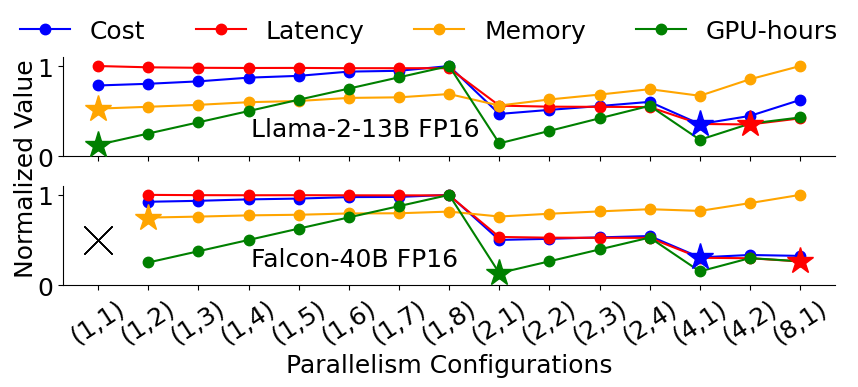

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

def get_stats(df, model_name, tp_deg, pp_deg, dtype, int8_kv, output_max_lenght=100):
  mem_stat = df[(df['Model'] == model_name) & (df['TP'] == tp_deg) & (df['PP'] == pp_deg) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Output_Lenght'] == output_max_lenght)]['Memory-After-Run'].iloc[0]
  lat_stat = df[(df['Model'] == model_name) & (df['TP'] == tp_deg) & (df['PP'] == pp_deg) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Output_Lenght'] == output_max_lenght)]['Latency'].iloc[0]
  return mem_stat, lat_stat

# Function to normalize the values in the dictionary by category
def normalize_data_by_category(data):
    normalized_data = {}
    for category, values in data.items():
      max_val = max([elem for elem in values.values() if not np.isnan(elem)])
      normalized_data[category] = {k: (v / max_val ) for k, v in values.items()}
    return normalized_data

# Calculate metrics for all parallel configs
df_GT = pd.read_csv('full_model_data_collection.csv')


model_names = ['llama-2-13b', 'falcon-40b']
title_names = {'llama-2-13b':'Llama-2-13B', 'falcon-40b':'Falcon-40B'}
parallel_config_list = [(1,1), (1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (1,8), (2,1), (2,2), (2,3), (2,4), (4,1), (4,2), (8,1)]
dtype = 'float16'
int8_kv = False

analysis = {}

# Create a 3x1 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8.3, 3.5), sharex=True)

for ax_id,model_name in enumerate(model_names):

  plotting_data = {'cost':{}, 'latency':{}, 'memory':{}, 'GPU-hours':{}}

  for tp_deg, pp_deg in parallel_config_list:
    if (model_name == 'falcon-40b' and (tp_deg == 1 and pp_deg == 1)):
      plotting_data['cost'][(tp_deg, pp_deg)] = np.nan
      plotting_data['latency'][(tp_deg, pp_deg)] = np.nan
      plotting_data['memory'][(tp_deg, pp_deg)] = np.nan
      plotting_data['GPU-hours'][(tp_deg, pp_deg)] = np.nan
    else:
      mem_stat, lat_stat = get_stats(df_GT, model_name, tp_deg, pp_deg, dtype, int8_kv, 100)
      plotting_data['cost'][(tp_deg, pp_deg)] = mem_stat*lat_stat
      plotting_data['latency'][(tp_deg, pp_deg)] = lat_stat
      plotting_data['memory'][(tp_deg, pp_deg)] = mem_stat
      plotting_data['GPU-hours'][(tp_deg, pp_deg)] = lat_stat*tp_deg*pp_deg/3600

  # Save Data for analysis
  analysis[model_name] = plotting_data

  # Applying the normalization function to the plotting_data
  normalized_plotting_data = normalize_data_by_category(plotting_data)

  # Convert tuple keys to string representations for plotting
  config_labels = [f'({config[0]},{config[1]})' for config in parallel_config_list]

  # Plot the normalized data
  colorpalette = {'cost':'blue', 'latency':'red', 'memory':'orange', 'GPU-hours':'green'}

  for policy in ['cost', 'latency', 'memory', 'GPU-hours']:
    values = list(normalized_plotting_data[policy].values())

    # Split data into two lists: one for plotting the line (ignoring None) and one for 'x' markers
    none_indices = np.where(np.isnan(values))[0]

    # Plot the valid values with the line
    axes[ax_id].plot(config_labels, values, marker='.', markersize=15, linestyle='-', color=colorpalette[policy], label=policy[0].upper()+policy[1:])

    # Mark 'None' values with an 'x'
    for idx in none_indices:
        axes[ax_id].plot(config_labels[idx], 0.5, marker='x', markersize=20, color='black', markeredgewidth=1, zorder=3)

    # Find the index of the minimum value
    min_index = values.index(min([elem for elem in values if not np.isnan(elem)]))

    # Highlight the best choice with a star
    axes[ax_id].plot(config_labels[min_index], values[min_index], marker='*', markersize=20, color=colorpalette[policy], markeredgecolor=colorpalette[policy], markeredgewidth=1, zorder=3)

  # Set title
  # axes[ax_id].set_title(f'{title_names[model_name]} FP16', fontsize=18)
  axes[ax_id].set_ylabel('', fontsize=18)
  axes[ax_id].set_ylim(0,1.1)
  axes[ax_id].set_xticklabels(config_labels, rotation=33)
  axes[ax_id].tick_params(axis='both', labelsize=18)
  axes[ax_id].spines['top'].set_visible(False)
  axes[ax_id].spines['right'].set_visible(False)

# Customize the plot
fig.text(-0.01, 0.64, 'Normalized Value', va='center', rotation='vertical', fontsize=18)
fig.text(0.275, 0.75, f'Llama-2-13B FP16', va='center', fontsize=18)
fig.text(0.275, 0.38, f'Falcon-40B FP16', va='center', fontsize=18)
axes[1].set_xlabel('Parallelism Configurations', fontsize=18)
#plt.grid(linestyle='--', linewidth=0.5)

plt.tight_layout()

# Show the plot
#plt.legend(loc='upper center', bbox_to_anchor=(0.67, 1), fontsize=11)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.49, 1.13), loc='upper center', ncol=4, fontsize = 18, frameon=False)

# plt.legend(fontsize=20, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4, handlelength=1, handletextpad=0.2, borderaxespad=0.1, frameon=False)

plt.savefig('Parallelism_Effect.pdf', format='pdf', bbox_inches='tight')

plt.show()

### Analysis

In [3]:
analysis

{'llama-2-13b': {'cost': {(1, 1): np.float64(111.80361531180097),
   (1, 2): np.float64(114.46600811546281),
   (1, 3): np.float64(118.29325170181983),
   (1, 4): np.float64(124.12667659710858),
   (1, 5): np.float64(126.9860801919276),
   (1, 6): np.float64(133.67031353743127),
   (1, 7): np.float64(134.94760596201135),
   (1, 8): np.float64(142.46591335034464),
   (2, 1): np.float64(66.87389970233198),
   (2, 2): np.float64(73.29523441855174),
   (2, 3): np.float64(79.35439732024679),
   (2, 4): np.float64(85.93840407626702),
   (4, 1): np.float64(50.87372398516163),
   (4, 2): np.float64(63.796339727938175),
   (8, 1): np.float64(88.96226050518453)},
  'latency': {(1, 1): np.float64(4.372200965881348),
   (1, 2): np.float64(4.310199896494548),
   (1, 3): np.float64(4.287328004837036),
   (1, 4): np.float64(4.277817328770955),
   (1, 5): np.float64(4.280814250310262),
   (1, 6): np.float64(4.268496195475261),
   (1, 7): np.float64(4.267340342203776),
   (1, 8): np.float64(4.266956090

In [4]:
# Latency vs PP
for model in ['llama-2-13b', 'falcon-40b']:
  dif, dif_real = [], []
  ref = 2 if model == 'llama-2-13b' else 3
  for x in range(ref,9):
    dif.append(float(round(100*np.abs(analysis[model]['latency'][(1,ref-1)] - analysis[model]['latency'][(1,x)])/analysis['llama-2-13b']['latency'][(1,ref-1)],2)))
    dif_real.append(float(round(np.abs(analysis[model]['latency'][(1,ref-1)] - analysis[model]['latency'][(1,x)]),2)))
  print(model)
  print(dif, '%')
  print(dif_real, 'sec')
  print('\n')

print(f'MIN: {min([0.06, 0.08, 0.09, 0.09, 0.1, 0.1, 0.11]+[0.04, 0.05, 0.04, 0.06, 0.07, 0.07])}')
print(f'MAX: {max([0.06, 0.08, 0.09, 0.09, 0.1, 0.1, 0.11]+[0.04, 0.05, 0.04, 0.06, 0.07, 0.07])}\n')


# Communication Overhead (mean)
x = []
for model in ['llama-2-13b', 'falcon-40b']:
  x.append(100*((analysis[model]['latency'][(1,7)] - analysis[model]['latency'][(1,8)]) / (analysis[model]['latency'][(1,8)])))
print(f'Model: {model} --> PP-Com = {float(round(np.mean(x),2))} %')

llama-2-13b
[1.42, 1.94, 2.16, 2.09, 2.37, 2.4, 2.41] %
[0.06, 0.08, 0.09, 0.09, 0.1, 0.1, 0.11] sec


falcon-40b
[0.94, 1.25, 1.04, 1.47, 1.6, 1.73] %
[0.04, 0.05, 0.04, 0.06, 0.07, 0.07] sec


MIN: 0.04
MAX: 0.11

Model: falcon-40b --> PP-Com = 0.03 %


In [5]:
# Memory vs PP
for model in ['llama-2-13b', 'falcon-40b']:
  dif = []
  ref = 2 if model == 'llama-2-13b' else 3
  for x in range(ref,9):
    dif.append(float(round(analysis[model]['memory'][(1,x)]/ analysis[model]['memory'][(1,ref-1)] ,2)))
  print(model, dif, 'x')

print('\n')

# per-GPU Memory vs PP
for model in ['llama-2-13b', 'falcon-40b']:
  dif = []
  ref = 2 if model == 'llama-2-13b' else 3
  for x in range(ref,9):
    dif.append(float(round( (analysis[model]['memory'][(1,ref-1)]/(ref-1)) / (analysis[model]['memory'][(1,x)]/x) ,2)))
  print(model, dif, 'x')

llama-2-13b [1.04, 1.08, 1.13, 1.16, 1.22, 1.24, 1.31] x
falcon-40b [1.01, 1.03, 1.04, 1.06, 1.06, 1.09] x


llama-2-13b [1.93, 2.78, 3.53, 4.31, 4.9, 5.66, 6.13] x
falcon-40b [1.48, 1.94, 2.4, 2.83, 3.29, 3.67] x


In [6]:
# Latency vs TP
dif = []
for x in [2,4,8]:
  dif.append(float(round(analysis['falcon-40b']['latency'][(2,1)] / analysis['falcon-40b']['latency'][(x,1)],2)))
print('Latency', dif, 'x')

# Memory vs TP
dif = []
for x in [2,4,8]:
  dif.append(float(round(analysis['falcon-40b']['memory'][(x,1)] / analysis['falcon-40b']['memory'][(2,1)],2)))
print('Memory', dif, 'x')

# GPU-hours vs TP
dif = []
for x in [2,4,8]:
  dif.append(float(round(analysis['falcon-40b']['GPU-hours'][(x,1)] / analysis['falcon-40b']['GPU-hours'][(2,1)],2)))
print('GPU-hours', dif, 'x')

Latency [1.0, 1.76, 2.03] x
Memory [1.0, 1.08, 1.32] x
GPU-hours [1.0, 1.14, 1.97] x


In [7]:
dif = round(analysis['llama-2-13b']['cost'][(8,1)] / analysis['llama-2-13b']['cost'][(4,1)],2)
print('llama-2-13b', dif, 'x')

dif = round(analysis['falcon-40b']['cost'][(8,1)] / analysis['falcon-40b']['cost'][(4,1)],2)
print('falcon-40b', dif, 'x')

llama-2-13b 1.75 x
falcon-40b 1.05 x


In [8]:
# Latency vs TP
t_2 = float(analysis['falcon-40b']['latency'][(2,1)])
t_4 = float(analysis['falcon-40b']['latency'][(4,1)])
t_8 = float(analysis['falcon-40b']['latency'][(8,1)])

dif_24 = 100*(t_2 - t_4)/t_2
dif_48 = 100*(t_4 - t_8)/t_4

print(f'Falcon-40B --> TP=2->TP=4: {dif_24:.2f} %')
print(f'Falcon-40B --> TP=4->TP=8: {dif_48:.2f} %')

Falcon-40B --> TP=2->TP=4: 43.16 %
Falcon-40B --> TP=4->TP=8: 13.46 %


## Unbalanced PP Effect

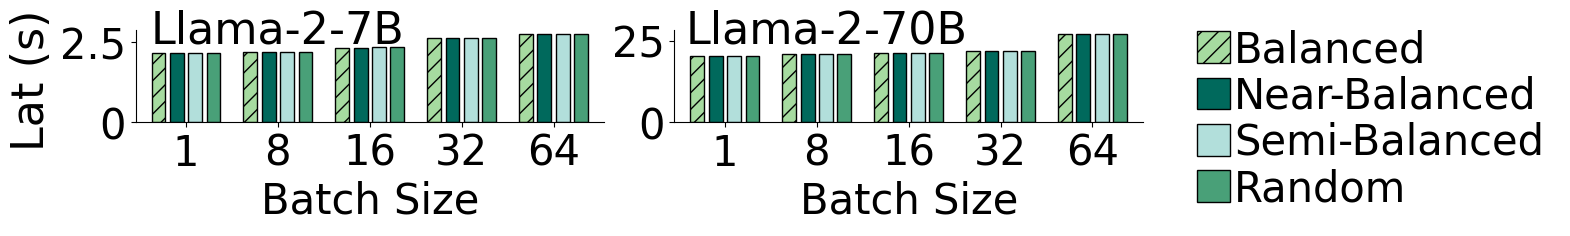

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# All data refer to config = (1, 8, 'float16', False)
df_lat = pd.read_csv('./unbalanced_PP_data_collection.csv')

models = ['llama-2-7b', 'llama-2-13b', 'llama-2-70b']
models_plot = ['llama-2-7b', 'llama-2-70b']
model_names = ['Llama-2-7B', 'Llama-2-70B']
batch_sizes = [1, 8, 16, 32, 64]
configs = ['C1', 'C2', 'C3', 'C4']
pp_mappings = {
    'llama-2-7b': {'C1': '4 4 4 4 4 4 4 4', 'C2': '3 3 3 3 5 5 5 5', 'C3':'2 2 3 3 5 5 6 6', 'C4':'1 2 3 4 4 5 6 7'},
    'llama-2-13b': {'C1': '5 5 5 5 5 5 5 5', 'C2': '3 3 3 3 7 7 7 7', 'C3':'2 2 4 4 6 6 8 8', 'C4':'1 2 3 4 6 7 8 9'},
    'llama-2-70b': {'C1': '10 10 10 10 10 10 10 10', 'C2': '5 5 5 5 15 15 15 15', 'C3':'3 3 7 7 13 13 17 17', 'C4':'2 4 6 8 12 14 16 18'},
}

data = {
    'llama-2-7b': {bs: {} for bs in batch_sizes},
    'llama-2-13b': {bs: {} for bs in batch_sizes},
    'llama-2-70b': {bs: {} for bs in batch_sizes},
}

# Orginize Data
for model in models:
  for bs in batch_sizes:
    for pp_map in pp_mappings[model].keys():
      data[model][bs][pp_map] = df_lat[(df_lat['Model'] == model) & (df_lat['PP_Map'] == pp_mappings[model][pp_map]) & (df_lat['Batch_Size'] == bs)]['Latency'].iloc[0]

# Plot setup
fig, axs = plt.subplots(1,2, figsize=(13, 1.2), gridspec_kw={'wspace': 0.15})
fontsize = 32
bar_width = 0.15

# colors = {'C1':'#a6dba0', 'C2':'#67a969', 'C3':'#2b8c42', 'C4':'#49a078'}
colors = {'C1':'#a6dba0', 'C2':'#00695c', 'C3':'#b2dfdb', 'C4':'#49a078'}

# hatches = {'C1':'//', 'C2':'xx', 'C3':'..', 'C4':'\\'}
hatches = {'C1':'//', 'C2':'', 'C3':'', 'C4':''}
linestyles = {'C1': '-', 'C2': '--', 'C3': '-.', 'C4': ':'}
markers = {'C1': 'o', 'C2': 's', 'C3': '^', 'C4': 'd'}
x = np.arange(len(batch_sizes))

for i, (model,model_name) in enumerate(zip(models_plot,model_names)):
  # print(model)
  ax = axs[i]

  # Grouped boxplots by batch size
  ax.bar(np.arange(5)-0.30, [data[model][bs]['C1'] for bs in batch_sizes], width=bar_width, color=[colors['C1']]*5, hatch=[hatches['C1']]*5, edgecolor='black', label='Balanced')
  ax.bar(np.arange(5)-0.10, [data[model][bs]['C2'] for bs in batch_sizes], width=bar_width, color=[colors['C2']]*5, hatch=[hatches['C2']]*5, edgecolor='black', label='Near-Balanced')
  ax.bar(np.arange(5)+0.10, [data[model][bs]['C3'] for bs in batch_sizes], width=bar_width, color=[colors['C3']]*5, hatch=[hatches['C3']]*5, edgecolor='black', label='Semi-Balanced')
  ax.bar(np.arange(5)+0.30, [data[model][bs]['C4'] for bs in batch_sizes], width=bar_width, color=[colors['C4']]*5, hatch=[hatches['C4']]*5, edgecolor='black', label='Random')


  # # Plot lines for each configuration
  # ax.plot(x, [data[model][bs]['C1'] for bs in batch_sizes], color=colors['C1'], linestyle=linestyles['C1'], marker=markers['C1'], label='Balanced')
  # ax.plot(x, [data[model][bs]['C2'] for bs in batch_sizes], color=colors['C2'], linestyle=linestyles['C2'], marker=markers['C2'], label='Near-Balanced')
  # ax.plot(x, [data[model][bs]['C3'] for bs in batch_sizes], color=colors['C3'], linestyle=linestyles['C3'], marker=markers['C3'], label='Semi-Balanced')
  # ax.plot(x, [data[model][bs]['C4'] for bs in batch_sizes], color=colors['C4'], linestyle=linestyles['C4'], marker=markers['C4'], label='Random')


  ax.set_xticks(range(len(batch_sizes)))
  ax.set_xticklabels(batch_sizes)
  # ax.grid(axis='y', linestyle='--', alpha=0.6)
  # ax.set_ylabel("Lat (s)", fontsize=fontsize)
  ax.tick_params(axis='both', labelsize = fontsize-2)
  ax.set_xlim(-0.55, 4.55)
  y_min, y_max = ax.get_ylim()
  # ax.set_ylim(0, 1.25*y_max)
  # Add text inside a box
  # ax.text(-0.50, 1.15*y_max, model_name, fontsize=fontsize, ha='left', va='top',
  #         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1'), clip_on=True)
  # ax.text(-0.45, 1.3*y_max, model_name, fontsize=fontsize-1, ha='left', va='top', clip_on=True)
  axs[i].set_xlabel("Batch Size", fontsize=fontsize-2)

  # Remove borders (spines)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  # ax.spines['left'].set_visible(False)
  # ax.spines['bottom'].set_visible(False)

axs[0].set_yticks([0, 2.5])
axs[0].set_yticklabels(['0', '2.5'])

# axs[0].set_ylabel("Latency (s)", fontsize=fontsize)
fig.text(0.045, 1.05, "Lat (s)", fontsize=fontsize, ha='center', va='top', rotation=90)
# model_names = ['Llama-2-7B', 'Llama-2-70B']

fig.text(0.234, 1.05, "Llama-2-7B", fontsize=fontsize, ha='center', va='top')
fig.text(0.657, 1.05, "Llama-2-70B", fontsize=fontsize, ha='center', va='top')



for ax in axs:
    ax.yaxis.set_label_coords(-0.12, 0.5)  # Move label to align across subplots


handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.075, 1.2), loc='upper center', ncol=1, fontsize=fontsize-2, title_fontsize=fontsize, frameon=False, labelspacing=0.1, handletextpad=0.1, columnspacing=0.75, handlelength=0.8, handleheight=0.8)


plt.tight_layout()

plt.savefig('Unbalanced_PP_Effect.pdf', format='pdf', bbox_inches='tight')

plt.show()

### Analysis

In [10]:
for model in ['llama-2-7b', 'llama-2-13b', 'llama-2-70b']:
  lat_model = []
  for bs in [1, 8, 16, 32]:
    lat_bs = []
    for c in ['C1', 'C2', 'C3', 'C4']:
      lat_bs.append(100*np.abs(data[model][bs][c]-data[model][bs]['C1'])/data[model][bs]['C1'])
    lat_model.append(max(lat_bs))
  print(f'Model: {model} --> MAX OVRHD = {float(max(lat_model))} %')


Model: llama-2-7b --> MAX OVRHD = 0.402165621719167 %
Model: llama-2-13b --> MAX OVRHD = 0.5025921770881662 %
Model: llama-2-70b --> MAX OVRHD = 0.19202505207286832 %


In [11]:
def get_stats(df, model_name, tp_deg, pp_deg, pp_map, dtype, int8_kv, output_max_lenght=100):
  mem_stat = df[(df['Model'] == model_name) & (df['TP'] == tp_deg) & (df['PP'] == pp_deg) & (df['PP_Map'] == pp_map) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Output_Lenght'] == output_max_lenght)]['Memory-After-Run'].iloc[0]
  lat_stat = df[(df['Model'] == model_name) & (df['TP'] == tp_deg) & (df['PP'] == pp_deg) & (df['PP_Map'] == pp_map) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Output_Lenght'] == output_max_lenght)]['Latency'].iloc[0]
  return mem_stat, lat_stat

mem_GT, lat_GT = get_stats(pd.read_csv('full_model_data_collection.csv'), 'llama-2-7b', 1, 2, '16 16', 'float16', False, 10)
mem_10 = 10*mem_GT/32
mem_22 = mem_GT - mem_10
print(f'Llama-2-7b w/ 10 layers partition --> {mem_10}')
print(f'Llama-2-7b w/ 10 layers partition --> {mem_22}')

Llama-2-7b w/ 10 layers partition --> 4.530754089355469
Llama-2-7b w/ 10 layers partition --> 9.967658996582031


## Qunatization Effect

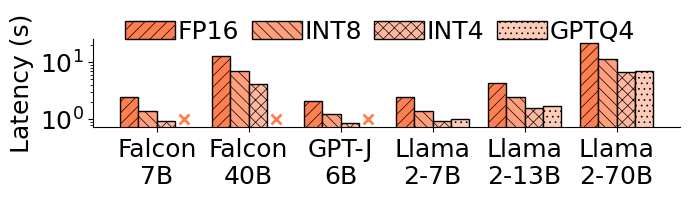

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.patches as mpatches
mpl.rcParams['hatch.linewidth'] = 0.5


def get_stats(df, model_name, tp_deg, pp_deg, dtype, int8_kv, output_max_lenght=100):
  try:
    mem_stat = df[(df['Model'] == model_name) & (df['TP'] == tp_deg) & (df['PP'] == pp_deg) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Output_Lenght'] == output_max_lenght)]['Memory-After-Run'].iloc[0]
    lat_stat = df[(df['Model'] == model_name) & (df['TP'] == tp_deg) & (df['PP'] == pp_deg) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Output_Lenght'] == output_max_lenght)]['Latency'].iloc[0]
  except:
    mem_stat = 0
    lat_stat = 0
  return mem_stat, lat_stat

df_GT = pd.read_csv('full_model_data_collection.csv')
quant_types = ['float16', 'int8', 'int4', 'int4_gptq']
tp_pp_config = {"Falcon-7B":[1,1], "Falcon-40B":[1,2], "GPTJ-6B":[1,1], "Llama-2-7B":[1,1], "Llama-2-13B":[1,1], "Llama-2-70B":[1,3]}

# Plotting configuration
models = ["Falcon-7B", "Falcon-40B", "GPTJ-6B", "Llama-2-7B", "Llama-2-13B", "Llama-2-70B"]
models_labels = ["Falcon\n7B", "Falcon\n40B", "GPT-J\n6B", "Llama\n2-7B", "Llama\n2-13B", "Llama\n2-70B"]
quant_labels = {'float16':"FP16", 'int8':"INT8", 'int4':"INT4", 'int4_gptq':"GPTQ4"}
colors = ['#FF7F50', '#ff9f7c','#ffb89f' ,'#ffcbb9']
alphas = [1,1,1,1]
hatches = ['///', '\\\\\\', 'XXX', '...']
width = 0.2  # Width of the bars
opacity = 0.8


# Set up subplots
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 2))
fig, ax1 = plt.subplots(1, 1, figsize=(7, 1.8))


# Loop over models and plot latency and memory for each quantization type
x = np.arange(len(models))

# Plot latency (first subplot)
for i, quant in enumerate(quant_types):
    label = quant_labels[quant]
    latencies = [get_stats(df_GT, model.lower(), tp_pp_config[model][0], tp_pp_config[model][1], quant, False, 100)[1] for model in models]
    ax1.bar(x + i * width, latencies, width, label=label, color=colors[i], alpha=alphas[i], hatch=hatches[i], edgecolor=(0, 0, 0, 1), linewidth=1)
ax1.plot(3 * width, 1, marker='x', markersize=7.5, color='#FF7F50', markeredgewidth=2, zorder=3)
ax1.plot(1 + 3 * width, 1, marker='x', markersize=7.5, color='#FF7F50', markeredgewidth=2, zorder=3)
ax1.plot(2 + 3 * width, 1, marker='x', markersize=7.5, color='#FF7F50', markeredgewidth=2, zorder=3)
ax1.set_ylabel('Latency (s)', fontsize=18)
ax1.set_xticks(x + width * 1.5)
ax1.set_xticklabels(models_labels, fontsize=18)#, rotation=15, ha="right", rotation_mode='anchor')
ax1.set_yscale('log')
ax1.tick_params(axis='y', labelsize=18)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)


# # Plot memory (second subplot)
# for i, quant in enumerate(quant_types):
#     memory = [get_stats(df_GT, model.lower(), tp_pp_config[model][0], tp_pp_config[model][1], quant, False, 100)[0] for model in models]
#     ax2.bar(x + i * width, memory, width, label=quant, color=colors[i],alpha=alphas[i], hatch=hatches[i], edgecolor='black')
# ax2.plot(2 + 3 * width, 2.5, marker='x', markersize=5, color='#FF7F50', markeredgewidth=1, zorder=3)
# ax2.set_ylabel('Memory (GB)', fontsize=14)
# ax2.set_xticks(x + width * 1.5)
# ax2.set_xticklabels(models, fontsize=14, rotation=30, ha="right", rotation_mode='anchor')
# ax2.set_yscale('log')
# ax2.tick_params(axis='y', labelsize=16)

# Legend
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.55, 1.15), loc='upper center', ncol=4, fontsize = 18, frameon=False, labelspacing=0.1, handletextpad=0.1, columnspacing=0.5)

# Adjust layout
plt.tight_layout()

plt.savefig('Quantization_Effect.pdf', bbox_inches='tight')

# Save and display the plot
plt.show()

### Analysis

In [14]:
df_GT = pd.read_csv('full_model_data_collection.csv')
models = ["Falcon-7B", "Falcon-40B", "GPTJ-6B", "Llama-2-7B", "Llama-2-13B", "Llama-2-70B"]
quant_types = ['float16', 'int8', 'int4', 'int4_gptq']
tp_pp_config = {"Falcon-7B":[1,1], "Falcon-40B":[1,2], "GPTJ-6B":[1,1], "Llama-2-7B":[1,1], "Llama-2-13B":[1,1], "Llama-2-70B":[1,3]}

for model in models:
  latencies = [get_stats(df_GT, model.lower(), tp_pp_config[model][0], tp_pp_config[model][1], quant, False, 100)[1] for quant in quant_types]
  ref = latencies[0]
  latencies = [ref/x for x in latencies]
  print(f'Model: {model} --> (FP16)/[FP16, INT8, INT4, GPTQ4]: {[float(round(lat,2)) for lat in latencies]}')

Model: Falcon-7B --> (FP16)/[FP16, INT8, INT4, GPTQ4]: [1.0, 1.71, 2.55, inf]
Model: Falcon-40B --> (FP16)/[FP16, INT8, INT4, GPTQ4]: [1.0, 1.86, 3.13, inf]
Model: GPTJ-6B --> (FP16)/[FP16, INT8, INT4, GPTQ4]: [1.0, 1.69, 2.48, inf]
Model: Llama-2-7B --> (FP16)/[FP16, INT8, INT4, GPTQ4]: [1.0, 1.72, 2.57, 2.42]
Model: Llama-2-13B --> (FP16)/[FP16, INT8, INT4, GPTQ4]: [1.0, 1.76, 2.72, 2.56]
Model: Llama-2-70B --> (FP16)/[FP16, INT8, INT4, GPTQ4]: [1.0, 1.88, 3.25, 3.03]


## Prunning Effect

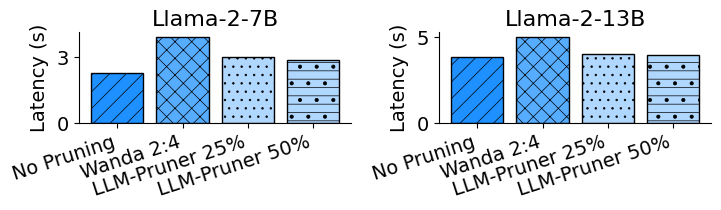

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Manually define memory and latency values
memory_values = [13278/1024, 7864/1024, 10770/1024, 8412/1024]  # Values for memory in GB
latency_values = [2.27, 3.93, 3.02, 2.86]  # Values for latency

memory_values_2 = [25394/1024, 14866/1024, 21692/1024, 17752/1024]  # Values for memory in GB
latency_values_2 = [3.81, 5.01, 4.00, 3.93]  # Values for latency
base_color = '#1E90FF'
#ppl llama-2-13 5.668747 # 9.46 24.046875
# Define the model names and colors for the bars
model_name_list = ['No Pruning', 'Wanda 2:4', 'LLM-Pruner 25%', 'LLM-Pruner 50%']
# Remove 'Wanda 50%', 'SparseGPT 50%' , 'Wanda 4:8'
colors = ['#1E90FF', '#56acff', '#b0d8ff', '#b0d8ff']
alphas = [1,1,1,1]

# Create a figure with two subplots, one for memory and one for latency
fig, axes = plt.subplots(1, 2, figsize=(7, 2.3))#, gridspec_kw={'wspace': 0.01})
# plt.subplots_adjust(wspace=0.01)

# Plot memory on the first subplot
label_x = -0.11
# Memory plot
# Latency plot

ax2 = axes[0]
bars2 = []

for i, (model, value, alpha) in enumerate(zip(model_name_list, latency_values, alphas)):
    bars2.append(ax2.bar(model, value, color=colors[i], alpha=alpha, hatch=['//', 'xx', '..', '-.-'][i], edgecolor='black'))
ax2.set_ylabel('Latency (s)', fontsize=14)
ax2.set_yticks([0,  3])
ax2.tick_params(axis='y', labelsize=14)
ax2.set_xticklabels(model_name_list, rotation=18, fontsize=14, ha='right')
ax2.yaxis.set_label_coords(label_x, 0.5)
# Memory plot 2

# ax3.yaxis.set_label_coords(label_x, 0.5)
# Latency plot 2
ax4 = axes[1]
bars4 = []
for i, (model, value, alpha) in enumerate(zip(model_name_list, latency_values_2, alphas)):
    bars4.append(ax4.bar(model, value, color=colors[i], alpha=alpha, hatch=['//', 'xx', '..', '-.-'][i], edgecolor='black'))
ax4.set_ylabel('Latency (s)', fontsize=14)
ax4.tick_params(axis='y', labelsize=14)

ax4.set_xticklabels(model_name_list, rotation=18, fontsize=14, ha='right')
ax4.yaxis.set_label_coords(label_x, 0.5)

# Add titles on top of each column

# ig.text(0.275, 0.75, f'Llama-2-13B FP16', va='center', fontsize=18)
ax2.set_title('Llama-2-7B', fontsize=16, y=0.98)
ax4.set_title('Llama-2-13B', fontsize=16, y=0.98)

model_name_label = ['Llama-2-7B', 'Llama-2-13B']
pad = [0.1,0]

for ii,ax in enumerate([ax2, ax4]):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  y_min, y_max = ax.get_ylim()
  # ax.text(1.5, y_max, model_name_label[ii], fontsize=15.5, ha='left', va='top', clip_on=True)


# # Add a legend outside on the top
# handles, labels = ax1.get_legend_handles_labels()
# fig.legend([bars2[0], bars2[1], bars2[2], bars2[3]], ['No Pruning', 'Wanda 2:4', 'LLM-Pruner 25%', 'LLM-Pruner 50%'], loc='upper center', bbox_to_anchor=(0.55, 1.15), ncol=2, fontsize=14, frameon=False, labelspacing=0.1, handletextpad=0.1, columnspacing=1)

# Optionally adjust layout
plt.tight_layout(rect=[0, 0, 1.05, 0.95])  # Adjust the rect to fit the legend on top

# plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect to fit the legend on top
plt.savefig('Prunning_Effect_HF.pdf', bbox_inches='tight')
plt.show()

### Analysis

In [16]:
# Llama-2-7b
print('Llama-2-7b -->')
memory_values = [13278/1024, 7864/1024, 10770/1024, 8412/1024]  # Values for memory in GB
latency_values = [2.27, 3.93, 3.02, 2.86]  # Values for latency
for i,method in enumerate(['Wanda 2:4', 'LLM-Pruner 25%', 'LLM-Pruner 50%'],1):
  print(f'Memory ({method}) --> {100*(memory_values[0]-memory_values[i])/memory_values[0]:.2f} %')
print('--')
for i,method in enumerate(['Wanda 2:4', 'LLM-Pruner 25%', 'LLM-Pruner 50%'],1):
  print(f'Latency ({method}) --> {100*(latency_values[i]-latency_values[0])/latency_values[i]:.2f} %')

# Llama-2-13B
print('\n\nLlama-2-13b -->')
memory_values_2 = [25394/1024, 14866/1024, 21692/1024, 17752/1024]  # Values for memory in GB
latency_values_2 = [3.81, 5.01, 4.00, 3.93]  # Values for latency
for i,method in enumerate(['Wanda 2:4', 'LLM-Pruner 25%', 'LLM-Pruner 50%'],1):
  print(f'Memory ({method}) --> {100*(memory_values_2[0]-memory_values_2[i])/memory_values_2[0]:.2f} %')
print('--')
for i,method in enumerate(['Wanda 2:4', 'LLM-Pruner 25%', 'LLM-Pruner 50%'],1):
  print(f'Latency ({method}) --> {100*(latency_values_2[i]-latency_values_2[0])/latency_values_2[i]:.2f} %')

Llama-2-7b -->
Memory (Wanda 2:4) --> 40.77 %
Memory (LLM-Pruner 25%) --> 18.89 %
Memory (LLM-Pruner 50%) --> 36.65 %
--
Latency (Wanda 2:4) --> 42.24 %
Latency (LLM-Pruner 25%) --> 24.83 %
Latency (LLM-Pruner 50%) --> 20.63 %


Llama-2-13b -->
Memory (Wanda 2:4) --> 41.46 %
Memory (LLM-Pruner 25%) --> 14.58 %
Memory (LLM-Pruner 50%) --> 30.09 %
--
Latency (Wanda 2:4) --> 23.95 %
Latency (LLM-Pruner 25%) --> 4.75 %
Latency (LLM-Pruner 50%) --> 3.05 %


## Configuration Selection

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

def get_stats(df, model_name, tp_deg, pp_deg, dtype, int8_kv, output_max_lenght=100):
  try:
    mem_stat = df[(df['Model'] == model_name) & (df['TP'] == tp_deg) & (df['PP'] == pp_deg) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Output_Lenght'] == output_max_lenght)]['Memory-After-Run'].iloc[0]
    lat_stat = df[(df['Model'] == model_name) & (df['TP'] == tp_deg) & (df['PP'] == pp_deg) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Output_Lenght'] == output_max_lenght)]['Latency'].iloc[0]
  except:
    mem_stat = 0
    lat_stat = 0
  return mem_stat, lat_stat

df_GT = pd.read_csv('full_model_data_collection.csv')
df_PR = pd.read_csv('full_model_data_collection_prunning.csv')

mem = []
lat = []
for model in ['llama-2-7b']:#, 'llama-2-7b-sparseGPT', 'llama-2-7b-wanda', 'llama-2-7b-wanda24', 'llama-2-7b-wanda48']:
  df = df_GT if model == 'llama-2-7b' else df_PR
  for (tp,pp) in [(1,1), (1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (1,8), (2,1), (2,2), (2,3), (2,4), (4,1), (4,2), (8,1)]:
    for dtype in ['float16', 'int8', 'int4', 'int4_gptq']:
      for int8_kv in [False, True]:
        mem_i, lat_i = get_stats(df, model, tp, pp, dtype, int8_kv, 100)
        if (mem_i != 0) and (lat_i != 0):
          mem.append(mem_i)
          lat.append(lat_i)

# for mem_i in [13278/1024, 7864/1024, 10770/1024, 8412/1024]: mem.append(mem_i)
# for lat_i in [2.27, 3.93, 3.02, 2.86]: lat.append(lat_i)

print('Llama-2-7b -->')
print(f'Latency Variation: {100*(max(lat) - min(lat)) / max(lat):.2f} %')
print(f'Memory Variation: {100*(max(mem) - min(mem)) / max(mem):.2f} %')

Llama-2-7b -->
Latency Variation: 75.07 %
Memory Variation: 87.91 %


# 4.Design


# 5.Profiler

## Fingerprint Scaling

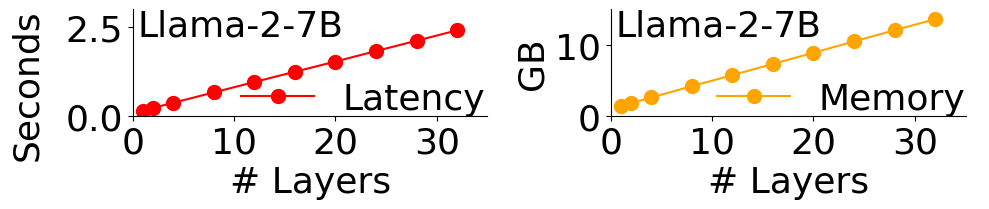

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the CSV file
csv_file = 'fingerprint_scaling_data.csv'
df = pd.read_csv(csv_file)

# Data for plotting
layers = [x for x in np.unique(df['Num_layers'])]
latency = [df[(df['TP'] == 1) & (df['PP'] == 1) &(df['Num_layers'] == x)]['Latency'].iloc[0] for x in layers]
gpu_memory = [df[(df['TP'] == 1) & (df['PP'] == 1) &(df['Num_layers'] == x)]['Memory-After-Run'].iloc[0] for x in layers]

x = np.arange(len(layers))  # the label locations
width = 0.8  # the width of the bars

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 2.2))
fontsize = 24

# Plotting latency
ax1.plot(layers, latency, color='red', label='Latency', marker='o', markersize=10)
ax1.set_xlabel('# Layers', fontsize = fontsize+2)
ax1.set_ylabel('Seconds', fontsize = fontsize+2)
ax1.yaxis.set_label_coords(-0.25, 0.3)
ax1.tick_params(axis='both', labelsize = fontsize+2)
ax1.set_xlim([0,35])
ax1.set_xticks(range(0, 36, 10))
ax1.set_ylim([0,3])
# ax1.set_title('Llama-2-7B', fontsize = fontsize+2)
ax1.legend(fontsize = fontsize+2, frameon=False, bbox_to_anchor=(0.65, 0.62), loc='upper center')
# ax1.grid(True, which='both', linestyle='--', color='grey')
# ax1.legend(fontsize = fontsize+2, frameon=False, bbox_to_anchor=(0.65, 0.5), loc='upper center')

# Plotting GPU Memory
ax2.plot(layers, gpu_memory, color='orange', label='Memory', marker='o', markersize=10)
ax2.set_xlabel('# Layers', fontsize = fontsize+2)
ax2.set_ylabel('GB', fontsize = fontsize+2)
ax2.tick_params(axis='both', labelsize = fontsize+2)
ax2.set_xlim([0,35])
ax2.set_xticks(range(0, 36, 10))
ax2.set_ylim([0,15])
# ax2.set_title('Llama-2-7B', fontsize = fontsize+2)
ax2.legend(fontsize = fontsize+2, frameon=False, bbox_to_anchor=(0.65, 0.62), loc='upper center')
# ax2.grid(True, which='both', linestyle='--', color='grey')
# ax2.legend(fontsize = fontsize+2, frameon=False, bbox_to_anchor=(0.65, 0.5), loc='upper center')

for ii,ax in enumerate([ax1, ax2]):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  y_min, y_max = ax.get_ylim()
  ax.text(0.5, y_max, 'Llama-2-7B', fontsize=fontsize+2, ha='left', va='top', clip_on=True)


plt.tight_layout()
plt.savefig('Fingerprint_Scaling.pdf', bbox_inches='tight')
plt.show()

## FIngerprint Generation

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def get_stats(df, model_name, tp_deg, pp_deg, pp_map, dtype, int8_kv, output_max_lenght=100):
  mem_stat = df[(df['Model'] == model_name) & (df['TP'] == tp_deg) & (df['PP'] == pp_deg) & (df['PP_Map'] == pp_map) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Output_Lenght'] == output_max_lenght)]['Memory-After-Run'].iloc[0]
  lat_stat = df[(df['Model'] == model_name) & (df['TP'] == tp_deg) & (df['PP'] == pp_deg) & (df['PP_Map'] == pp_map) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Output_Lenght'] == output_max_lenght)]['Latency'].iloc[0]
  return mem_stat, lat_stat

# Llama-2-70B-full-model (1,3,FP16,False,10)
mem_GT, lat_GT = get_stats(pd.read_csv('full_model_data_collection.csv'), 'llama-2-70b', 1, 3, '27 27 26', 'float16', False, 10)

# Llama-2-70B-fingerprint (1,1,FP16,False,10)
mem_FNG, lat_FNG = get_stats(pd.read_csv('fingerprint_data_collection.csv'), 'llama-2-70b', 1, 1, '1', 'float16', False, 10)

print(f'Memory Gain: {mem_GT/mem_FNG} x')
print(f'Latency Gain: {lat_GT/lat_FNG} x')

print(f'FNG Size: {100*mem_FNG/mem_GT:.2f}% ')


Memory Gain: 41.42200918330099 x
Latency Gain: 62.513633029479614 x
FNG Size: 2.41% 


In [20]:
import pandas as pd
import numpy as np

def get_stats(df, model_name, tp_deg, pp_deg, pp_map, dtype, int8_kv, output_max_lenght=100):
  mem_stat = df[(df['Model'] == model_name) & (df['TP'] == tp_deg) & (df['PP'] == pp_deg) & (df['PP_Map'] == pp_map) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Output_Lenght'] == output_max_lenght)]['Memory-After-Run'].iloc[0]
  lat_stat = df[(df['Model'] == model_name) & (df['TP'] == tp_deg) & (df['PP'] == pp_deg) & (df['PP_Map'] == pp_map) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Output_Lenght'] == output_max_lenght)]['Latency'].iloc[0]
  return mem_stat, lat_stat

# Llama-2-7B --> Opp_FNG(1,2)/L_FNG(1,2) vs Opp_FM(1,2)/L_FM(1,2)
latency_fng_1lr_1_1, _ = get_stats(pd.read_csv('fingerprint_data_collection.csv'), 'llama-2-7b', 1, 1, '1', 'float16', False, 10)
latency_fng_1lr_1_2, _ = get_stats(pd.read_csv('fingerprint_data_collection.csv'), 'llama-2-7b', 1, 2, '1 1', 'float16', False, 10)
Opp_1lr_fng = np.abs(latency_fng_1lr_1_2 - latency_fng_1lr_1_1)

latency_fm_1_1, _ = get_stats(pd.read_csv('full_model_data_collection.csv'), 'llama-2-7b', 1, 1, '32', 'float16', False, 10)
latency_fm_1_2, _ = get_stats(pd.read_csv('full_model_data_collection.csv'), 'llama-2-7b', 1, 2, '16 16', 'float16', False, 10)
Opp_fm = np.abs(latency_fm_1_2 - latency_fm_1_1)

print(f'Percentage of PP-Overhead of 1-layer-fingerprint (PP=2): {Opp_1lr_fng/latency_fng_1lr_1_2*100:.2f} %')
print(f'Percentage of PP-Overhead of 32-layer-full-model (PP=2): {Opp_fm/latency_fm_1_2*100:.2f} %\n')

Percentage of PP-Overhead of 1-layer-fingerprint (PP=2): 48.65 %
Percentage of PP-Overhead of 32-layer-full-model (PP=2): 6.38 %



## Profiling Exploration

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec
from matplotlib.patches import Patch
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


# Configuration List
configs_list_falcon_7b = [(1, 1, 'float16', False), (1, 1, 'int8', False), (1, 1, 'int4', False), (1, 2, 'float16', False), (1, 2, 'int8', False), (1, 2, 'int4', False), (1, 3, 'float16', False), (1, 3, 'int8', False), (1, 3, 'int4', False), (1, 4, 'float16', False), (1, 4, 'int8', False), (1, 4, 'int4', False), (1, 5, 'float16', False), (1, 5, 'int8', False), (1, 5, 'int4', False), (1, 6, 'float16', False), (1, 6, 'int8', False), (1, 6, 'int4', False), (1, 7, 'float16', False), (1, 7, 'int8', False), (1, 7, 'int4', False), (1, 8, 'float16', False), (1, 8, 'int8', False), (1, 8, 'int4', False)]
configs_list_falcon_40b = [(1, 1, 'int8', False), (1, 1, 'int4', False), (1, 2, 'float16', False), (1, 2, 'int8', False), (1, 2, 'int4', False), (1, 3, 'float16', False), (1, 3, 'int8', False), (1, 3, 'int4', False), (1, 4, 'float16', False), (1, 4, 'int8', False), (1, 4, 'int4', False), (1, 5, 'float16', False), (1, 5, 'int8', False), (1, 5, 'int4', False), (1, 6, 'float16', False), (1, 6, 'int8', False), (1, 6, 'int4', False), (1, 7, 'float16', False), (1, 7, 'int8', False), (1, 7, 'int4', False), (1, 8, 'float16', False), (1, 8, 'int8', False), (1, 8, 'int4', False), (2, 1, 'float16', False), (2, 1, 'int8', False), (2, 1, 'int4', False), (2, 2, 'float16', False), (2, 2, 'int8', False), (2, 2, 'int4', False), (2, 3, 'float16', False), (2, 3, 'int8', False), (2, 3, 'int4', False), (2, 4, 'float16', False), (2, 4, 'int8', False), (2, 4, 'int4', False), (4, 1, 'float16', False), (4, 1, 'int8', False), (4, 1, 'int4', False), (4, 2, 'float16', False), (4, 2, 'int8', False), (4, 2, 'int4', False), (8, 1, 'float16', False), (8, 1, 'int8', False), (8, 1, 'int4', False)]
configs_list_gptj_6b = [(1, 1, 'float16', False), (1, 1, 'int8', False), (1, 1, 'int4', False), (1, 2, 'float16', False), (1, 2, 'int8', False), (1, 2, 'int4', False), (1, 3, 'float16', False), (1, 3, 'int8', False), (1, 3, 'int4', False), (1, 4, 'float16', False), (1, 4, 'int8', False), (1, 4, 'int4', False), (1, 5, 'float16', False), (1, 5, 'int8', False), (1, 5, 'int4', False), (1, 6, 'float16', False), (1, 6, 'int8', False), (1, 6, 'int4', False), (1, 7, 'float16', False), (1, 7, 'int8', False), (1, 7, 'int4', False), (1, 8, 'float16', False), (1, 8, 'int8', False), (1, 8, 'int4', False), (2, 1, 'float16', False), (2, 1, 'int8', False), (2, 1, 'int4', False), (2, 2, 'float16', False), (2, 2, 'int8', False), (2, 2, 'int4', False), (2, 3, 'float16', False), (2, 3, 'int8', False), (2, 3, 'int4', False), (2, 4, 'float16', False), (2, 4, 'int8', False), (2, 4, 'int4', False), (4, 1, 'float16', False), (4, 1, 'int8', False), (4, 1, 'int4', False), (4, 2, 'float16', False), (4, 2, 'int8', False), (4, 2, 'int4', False), (8, 1, 'float16', False), (8, 1, 'int8', False), (8, 1, 'int4', False)]
configs_list_llama = [(1, 1, 'float16', False), (1, 1, 'float16', True), (1, 1, 'int8', False), (1, 1, 'int8', True), (1, 1, 'int4', False), (1, 1, 'int4', True), (1, 1, 'int4_gptq', False), (1, 2, 'float16', False), (1, 2, 'float16', True), (1, 2, 'int8', False), (1, 2, 'int8', True), (1, 2, 'int4', False), (1, 2, 'int4', True), (1, 2, 'int4_gptq', False), (1, 3, 'float16', False), (1, 3, 'float16', True), (1, 3, 'int8', False), (1, 3, 'int8', True), (1, 3, 'int4', False), (1, 3, 'int4', True), (1, 3, 'int4_gptq', False), (1, 4, 'float16', False), (1, 4, 'float16', True), (1, 4, 'int8', False), (1, 4, 'int8', True), (1, 4, 'int4', False), (1, 4, 'int4', True), (1, 4, 'int4_gptq', False), (1, 5, 'float16', False), (1, 5, 'float16', True), (1, 5, 'int8', False), (1, 5, 'int8', True), (1, 5, 'int4', False), (1, 5, 'int4', True), (1, 5, 'int4_gptq', False), (1, 6, 'float16', False), (1, 6, 'float16', True), (1, 6, 'int8', False), (1, 6, 'int8', True), (1, 6, 'int4', False), (1, 6, 'int4', True), (1, 6, 'int4_gptq', False), (1, 7, 'float16', False), (1, 7, 'float16', True), (1, 7, 'int8', False), (1, 7, 'int8', True), (1, 7, 'int4', False), (1, 7, 'int4', True), (1, 7, 'int4_gptq', False), (1, 8, 'float16', False), (1, 8, 'float16', True), (1, 8, 'int8', False), (1, 8, 'int8', True), (1, 8, 'int4', False), (1, 8, 'int4', True), (1, 8, 'int4_gptq', False), (2, 1, 'float16', False), (2, 1, 'float16', True), (2, 1, 'int8', False), (2, 1, 'int8', True), (2, 1, 'int4', False), (2, 1, 'int4', True), (2, 1, 'int4_gptq', False), (2, 2, 'float16', False), (2, 2, 'float16', True), (2, 2, 'int8', False), (2, 2, 'int8', True), (2, 2, 'int4', False), (2, 2, 'int4', True), (2, 2, 'int4_gptq', False), (2, 3, 'float16', False), (2, 3, 'float16', True), (2, 3, 'int8', False), (2, 3, 'int8', True), (2, 3, 'int4', False), (2, 3, 'int4', True), (2, 3, 'int4_gptq', False), (2, 4, 'float16', False), (2, 4, 'float16', True), (2, 4, 'int8', False), (2, 4, 'int8', True), (2, 4, 'int4', False), (2, 4, 'int4', True), (2, 4, 'int4_gptq', False), (4, 1, 'float16', False), (4, 1, 'float16', True), (4, 1, 'int8', False), (4, 1, 'int8', True), (4, 1, 'int4', False), (4, 1, 'int4', True), (4, 1, 'int4_gptq', False), (4, 2, 'float16', False), (4, 2, 'float16', True), (4, 2, 'int8', False), (4, 2, 'int8', True), (4, 2, 'int4', False), (4, 2, 'int4', True), (4, 2, 'int4_gptq', False), (8, 1, 'float16', False), (8, 1, 'float16', True), (8, 1, 'int8', False), (8, 1, 'int8', True), (8, 1, 'int4', False), (8, 1, 'int4', True), (8, 1, 'int4_gptq', False)]


configs_list = {'falcon-7b': configs_list_falcon_7b,
                'falcon-40b': configs_list_falcon_40b,
                'gptj-6b': configs_list_gptj_6b,
                'llama-2-7b': [item for item in configs_list_llama if item not in [(4, 1, 'int4_gptq', False), (4, 2, 'int4_gptq', False),(8, 1, 'int8', False), (8, 1, 'int8', True), (8, 1, 'int4', False), (8, 1, 'int4', True), (8, 1, 'int4_gptq', False)]],
                'llama-2-13b':[item for item in configs_list_llama if item not in [(8, 1, 'int4_gptq', False)]],
                'llama-2-70b':[item for item in configs_list_llama if item not in [(1, 1, 'float16', False), (1, 1, 'float16', True), (1, 1, 'int8', False), (1, 1, 'int8', True), (1, 2, 'float16', False), (1, 2, 'float16', True), (2, 1, 'float16', False), (2, 1, 'float16', True)]]
               }

# Number of full model's layers
max_layer_list = {'falcon-7b':32, 'falcon-40b':60, 'gptj-6b':28, 'llama-2-7b':32, 'llama-2-13b':40, 'llama-2-70b':80}


# Latency Estimation: L1 and L2 constants 40-each e-s=100 [alpha, beta, gamma, delta] (different init for full-model-(delta=1.2) & fingerprints-(delta=0.1))
latency_exponents = {'full-model': {'(float16, False)': [0.9214281439781189, 0.8020966649055481, 1.0621229410171509, 0.2586258053779602],
                                    '(float16, True)': [0.14999999105930328, 0.8499999642372131, 0.4000001847743988, 1.100000023841858],
                                    '(int8, False)': [0.9193627834320068, 0.8374356627464294, 1.0345373153686523, 0.258188396692276],
                                    '(int8, True)': [0.862210750579834, 0.5783026218414307, 1.0257755517959595, 0.24834044277668],
                                    '(int4, False)': [0.1499999761581421, 0.8499999642372131, 0.40000003576278687, 1.1000001430511475],
                                    '(int4, True)': [0.1499999463558197, 0.8499999642372131, 0.40000003576278687, 1.1000001430511475],
                                    '(int4_gptq, False)': [0.14999999105930328, 0.8499999046325684, 0.40000003576278687, 1.100000023841858]},
                     'fingerprint': {'(float16, False)': [0.04908526688814163, 0.6858410239219666, 0.18765105307102203, 0.568636953830719],
                                     '(float16, True)': [0.056719742715358734, 0.476995050907135, 0.6471682786941528, 0.30882391333580017],
                                     '(int8, False)': [0.07340002059936523, 0.6847909092903137, 0.9456496834754944, 0.4982350468635559],
                                     '(int8, True)': [9.999999974752427e-07, 0.38859668374061584, 0.5517905950546265, 0.7020023465156555],
                                     '(int4, False)': [0.15545696020126343, 0.8139811754226685, 0.5062165260314941, 0.32195258140563965],
                                     '(int4, True)': [0.07440026104450226, 0.4380153715610504, 0.8045902252197266, 0.4306272864341736],
                                     '(int4_gptq, False)': [0.05837882682681084, 0.5912114381790161, 0.6822206974029541, 0.4356187880039215]}}


# Profiled Datasets
df_fingerprint = pd.read_csv('./fingerprint_data_collection.csv')
df_ground_truth = pd.read_csv('./full_model_data_collection.csv')

### Latency Estimation

In [22]:
''' Function to select balanced/near-balanced PP mapping '''
def pick_pp_map_evenly(X, Y):
    # Base value for each element
    base_value = X // Y

    # Number of elements that need to be incremented by 1
    remainder = X % Y

    # Create the list with base values
    result = [base_value] * Y

    # Distribute the remainder by adding 1 to the first 'remainder' elements
    for i in range(remainder):
        result[i] += 1

    return result


''' Function to transform list of elements to string '''
def list_to_string(number_list):
    return ' '.join(str(elem) for elem in number_list)


''' Function to calculate TTFT & TPOT from the full-model for a specified config '''
def calc_TTFT_TPOT_full_model(lat_o1,lat_o2,o1,o2):
  TPOT = (lat_o2-lat_o1)/(o2-o1)
  TTFT = lat_o1 - o1*TPOT
  return TTFT, TPOT


''' Function to calculate TTFT & TPOT from the fingerprints for a specified config '''
def calc_TTFT_TPOT_fingerprint(lat_n1_o1,lat_n1_o2,lat_n2_o1,lat_n2_o2,n1,n2,o1,o2,num_layers):
  TPOT_layer = ((lat_n2_o2 - lat_n1_o2) - (lat_n2_o1 - lat_n1_o1))/((o2-o1)*(n2-n1))
  TPOT_other = (lat_n1_o2 - lat_n1_o1)/(o2-o1) - n1*TPOT_layer
  TTFT_layer = (lat_n2_o1 - lat_n1_o1)/(n2-n1) - o1*TPOT_layer
  TTFT_other = lat_n1_o1 - n1*TTFT_layer - o1*(n1*TPOT_layer + TPOT_other)
  return num_layers*TTFT_layer+TTFT_other, num_layers*TPOT_layer+TPOT_other


''' Function to calculate Latency for a specified config and output_lenght '''
def get_latency(df_lat, model, tp, pp, dtype, int8_kv, output_lenght, method='fingerprint', model_layer_list=max_layer_list):
  if (method == 'full-model'):
    pp_map = list_to_string(pick_pp_map_evenly(model_layer_list[model], pp))
    latency_10 = df_lat[(df_lat['Model'] == model) & (df_lat['TP'] == tp) & (df_lat['PP'] == pp) & (df_lat['PP_Map'] == pp_map) & (df_lat['DTYPE'] == dtype) & (df_lat['INT8_KV_Cache'] == int8_kv) & (df_lat['Output_Lenght'] == 10)]['Latency'].iloc[0]
    latency_20 = df_lat[(df_lat['Model'] == model) & (df_lat['TP'] == tp) & (df_lat['PP'] == pp) & (df_lat['PP_Map'] == pp_map) & (df_lat['DTYPE'] == dtype) & (df_lat['INT8_KV_Cache'] == int8_kv) & (df_lat['Output_Lenght'] == 20)]['Latency'].iloc[0]
    TTFT, TPOT = calc_TTFT_TPOT_full_model(latency_10, latency_20, 10, 20)
  elif (method == 'fingerprint'):
    pp = 1 # Always default to PP=1
    pp_map = [list_to_string(pick_pp_map_evenly(pp, pp)), list_to_string(pick_pp_map_evenly(pp+1, pp))]
    latency_1lyr_10 = df_lat[(df_lat['Model'] == model) & (df_lat['TP'] == tp) & (df_lat['PP'] == pp) & (df_lat['PP_Map'] == pp_map[0]) & (df_lat['DTYPE'] == dtype) & (df_lat['INT8_KV_Cache'] == int8_kv) & (df_lat['Output_Lenght'] == 10)]['Latency'].iloc[0]
    latency_1lyr_20 = df_lat[(df_lat['Model'] == model) & (df_lat['TP'] == tp) & (df_lat['PP'] == pp) & (df_lat['PP_Map'] == pp_map[0]) & (df_lat['DTYPE'] == dtype) & (df_lat['INT8_KV_Cache'] == int8_kv) & (df_lat['Output_Lenght'] == 20)]['Latency'].iloc[0]
    latency_2lyr_10 = df_lat[(df_lat['Model'] == model) & (df_lat['TP'] == tp) & (df_lat['PP'] == pp) & (df_lat['PP_Map'] == pp_map[1]) & (df_lat['DTYPE'] == dtype) & (df_lat['INT8_KV_Cache'] == int8_kv) & (df_lat['Output_Lenght'] == 10)]['Latency'].iloc[0]
    latency_2lyr_20 = df_lat[(df_lat['Model'] == model) & (df_lat['TP'] == tp) & (df_lat['PP'] == pp) & (df_lat['PP_Map'] == pp_map[1]) & (df_lat['DTYPE'] == dtype) & (df_lat['INT8_KV_Cache'] == int8_kv) & (df_lat['Output_Lenght'] == 20)]['Latency'].iloc[0]
    TTFT, TPOT = calc_TTFT_TPOT_fingerprint(latency_1lyr_10, latency_1lyr_20, latency_2lyr_10, latency_2lyr_20, pp, pp+1, 10, 20, model_layer_list[model])
  return TTFT + output_lenght*TPOT


''' Function to calculate Latency Constants for the equation '''
def get_latency_equation_constants(model, dtype, int8_kv, output_lenght, alpha, beta, gamma, delta, method='fingerprint', df_full_model=df_ground_truth, df_fingerprint=df_fingerprint):
  if (method == 'full-model'):
    if (model == 'falcon-7b'): # L1=L(1,1) | L2=L(1,2) | L3=0
      L1 = get_latency(df_full_model, model, 1, 1, dtype, int8_kv, output_lenght, 'full-model')
      L2 = get_latency(df_full_model, model, 1, 2, dtype, int8_kv, output_lenght, 'full-model')
      Lat_ref = L1 # L(1,1)
      PP_ovrhd = L2 - (Lat_ref / (2 ** alpha))
      TP_ovrhd = 0
    elif ((model == 'falcon-40b') and (dtype == 'float16')) or ((model == 'llama-2-70b') and (dtype == 'int8')): # L1=L(1,2) | L2=L(1,3) | L3=L(2,1)
      L1 = get_latency(df_full_model, model, 1, 2, dtype, int8_kv, output_lenght, 'full-model')
      L2 = get_latency(df_full_model, model, 1, 3, dtype, int8_kv, output_lenght, 'full-model')
      L3 = get_latency(df_full_model, model, 2, 1, dtype, int8_kv, output_lenght, 'full-model')
      Lat_ref = (L2 - ((2 ** delta) * L1)) / (((1/3) ** alpha) - (2 ** (delta - 1))) # L(1,1)
      PP_ovrhd = L1 - (Lat_ref / (2 ** alpha))
      TP_ovrhd = L3 - (Lat_ref / 2)
    elif ((model == 'llama-2-70b') and (dtype == 'float16')): # L1=L(1,3) | L2=L(1,4) | L3=L(2,2)
      L1 = get_latency(df_full_model, model, 1, 3, dtype, int8_kv, output_lenght, 'full-model')
      L2 = get_latency(df_full_model, model, 1, 4, dtype, int8_kv, output_lenght, 'full-model')
      L3 = get_latency(df_full_model, model, 2, 2, dtype, int8_kv, output_lenght, 'full-model')
      Lat_ref = (L2 - (((3/2) ** delta) * L1)) / (((1/4) ** alpha) - ((3 ** (delta -  alpha)) / (2 ** delta))) # L(1,1)
      PP_ovrhd = (L1 - (Lat_ref / (3 ** alpha))) / (2 ** delta)
      TP_ovrhd = (2 ** gamma) * (L3 - (Lat_ref / (2 ** (alpha + 1))) - PP_ovrhd)
    else: # L1=L(1,1) | L2=L(1,2) | L3=L(2,1)
      L1 = get_latency(df_full_model, model, 1, 1, dtype, int8_kv, output_lenght, 'full-model')
      L2 = get_latency(df_full_model, model, 1, 2, dtype, int8_kv, output_lenght, 'full-model')
      L3 = get_latency(df_full_model, model, 2, 1, dtype, int8_kv, output_lenght, 'full-model')
      Lat_ref = L1 # L(1,1)
      PP_ovrhd = L2 - (Lat_ref / (2 ** alpha))
      TP_ovrhd = L3 - (Lat_ref / 2)
  elif (method == 'fingerprint'): # L1=L(1,1) | L2=L(1,2) | L3=L(2,1)
    L1 = get_latency(df_fingerprint, model, 1, 1, dtype, int8_kv, output_lenght, 'fingerprint')
    L2 = get_latency(df_fingerprint, model, 1, 2, dtype, int8_kv, output_lenght, 'fingerprint')
    L3 = get_latency(df_fingerprint, model, 2, 1, dtype, int8_kv, output_lenght, 'fingerprint') if (model != 'falcon-7b') else 0 # L1=L(1,1) | L2=L(1,2) | L3=0
    Lat_ref = L1 # L(1,1)
    PP_ovrhd = L2 - (Lat_ref / (2 ** alpha))
    TP_ovrhd = L3 - (Lat_ref / 2) if (model != 'falcon-7b') else 0
  return Lat_ref, TP_ovrhd, PP_ovrhd


''' Function to estimate Latency using the equation '''
def estimate_latency(TP, PP, alpha, beta, gamma, delta, model, dtype, int8_kv, output_lenght, method='fingerprint'):
  Lat_ref, TP_ovrhd, PP_ovrhd = get_latency_equation_constants(model, dtype, int8_kv, output_lenght, alpha, beta, gamma, delta, method=method)
  # Clamp negative values to 0
  Lat_ref = max(0, Lat_ref)
  TP_ovrhd = max(0, TP_ovrhd)
  PP_ovrhd = max(0, PP_ovrhd)
  # print((Lat_ref / (TP * (PP ** alpha))), ((((TP -1) ** beta) / (PP ** gamma)) * TP_ovrhd), (((PP - 1) ** delta) * PP_ovrhd))
  return (Lat_ref / (TP * (PP ** alpha))) + ((((TP -1) ** beta) / (PP ** gamma)) * TP_ovrhd) + (((PP - 1) ** delta) * PP_ovrhd)


''' Function to get latencies based on the Method selected
    L0: Brute force approach (all configs)
    L1: Use full model (3 configs) + Equation
    L2: Use fingerprint (3 configs) --> Extrapolate for full model + Equation
    L3: Use fingerprint (all configs) --> Extrapolate for full model '''
def latency_exploaration(model, dtype, int8_kv, output_lenght, TP, PP, alpha=0, beta=0, gamma=0, delta=0, method='L2', df_full_model=df_ground_truth, df_fingerprint=df_fingerprint):
  if (method == 'L0'):
    return df_full_model[(df_full_model['Model'] == model) & (df_full_model['TP'] == TP) & (df_full_model['PP'] == PP) & (df_full_model['DTYPE'] == dtype) & (df_full_model['INT8_KV_Cache'] == int8_kv) & (df_full_model['Output_Lenght'] == output_lenght)]['Latency'].iloc[0]
  elif (method == 'L1'):
    return estimate_latency(TP, PP, alpha, beta, gamma, delta, model, dtype, int8_kv, output_lenght, method='full-model')
  elif (method == 'L2'):
    return estimate_latency(TP, PP, alpha, beta, gamma, delta, model, dtype, int8_kv, output_lenght, method='fingerprint')
  elif (method == 'L3'):
    return get_latency(df_fingerprint, model, TP, PP, dtype, int8_kv, output_lenght, 'fingerprint')

In [23]:
APE_latency = {'falcon-7b': {'L1':[], 'L2':[], 'L3':[]},
               'falcon-40b': {'L1':[], 'L2':[], 'L3':[]},
               'gptj-6b': {'L1':[], 'L2':[], 'L3':[]},
               'llama-2-7b': {'L1':[], 'L2':[], 'L3':[]},
               'llama-2-13b': {'L1':[], 'L2':[], 'L3':[]},
               'llama-2-70b': {'L1':[], 'L2':[], 'L3':[]}}

for model in ['falcon-7b', 'falcon-40b', 'gptj-6b', 'llama-2-7b', 'llama-2-13b', 'llama-2-70b']:
  for (tp, pp, dtype, int8_kv) in configs_list[model]:
    alpha_fm, beta_fm, gamma_fm, delta_fm = latency_exponents['full-model'][f"({dtype}, {int8_kv})"]
    alpha_fng, beta_fng, gamma_fng, delta_fng = latency_exponents['fingerprint'][f"({dtype}, {int8_kv})"]
    for output_lenght in [100]:
      lat_ref = latency_exploaration(model, dtype, int8_kv, output_lenght, tp, pp, method='L0')
      lat_l1 = latency_exploaration(model, dtype, int8_kv, output_lenght, tp, pp, alpha_fm, beta_fm, gamma_fm, delta_fm, method='L1')
      lat_l2 = latency_exploaration(model, dtype, int8_kv, output_lenght, tp, pp, alpha_fng, beta_fng, gamma_fng, delta_fng, method='L2')
      lat_l3 = latency_exploaration(model, dtype, int8_kv, output_lenght, tp, pp, method='L3')

      APE_latency[model]['L1'].append(100 * np.abs(lat_ref - lat_l1) / lat_ref)
      APE_latency[model]['L2'].append(100 * np.abs(lat_ref - lat_l2) / lat_ref)
      APE_latency[model]['L3'].append(100 * np.abs(lat_ref - lat_l3) / lat_ref)

#### Analysis

In [24]:
APE_L2 = []
for model in APE_latency.keys():
  APE_L2.extend(APE_latency[model]["L2"])
print(f'Median Latency APE (L2): {np.median(APE_L2):.2f} %')

Median Latency APE (L2): 4.39 %


In [25]:
REAL_latency = {'falcon-7b': {'L1':[], 'L2':[], 'L3':[]},
               'falcon-40b': {'L1':[], 'L2':[], 'L3':[]},
               'gptj-6b': {'L1':[], 'L2':[], 'L3':[]},
               'llama-2-7b': {'L1':[], 'L2':[], 'L3':[]},
               'llama-2-13b': {'L1':[], 'L2':[], 'L3':[]},
               'llama-2-70b': {'L1':[], 'L2':[], 'L3':[]}}

for model in ['falcon-7b', 'falcon-40b', 'gptj-6b', 'llama-2-7b', 'llama-2-13b', 'llama-2-70b']:
  for (tp, pp, dtype, int8_kv) in configs_list[model]:
    alpha_fm, beta_fm, gamma_fm, delta_fm = latency_exponents['full-model'][f"({dtype}, {int8_kv})"]
    alpha_fng, beta_fng, gamma_fng, delta_fng = latency_exponents['fingerprint'][f"({dtype}, {int8_kv})"]
    for output_lenght in [100]:
      lat_ref = latency_exploaration(model, dtype, int8_kv, output_lenght, tp, pp, method='L0')
      lat_l1 = latency_exploaration(model, dtype, int8_kv, output_lenght, tp, pp, alpha_fm, beta_fm, gamma_fm, delta_fm, method='L1')
      lat_l2 = latency_exploaration(model, dtype, int8_kv, output_lenght, tp, pp, alpha_fng, beta_fng, gamma_fng, delta_fng, method='L2')
      lat_l3 = latency_exploaration(model, dtype, int8_kv, output_lenght, tp, pp, method='L3')

      REAL_latency[model]['L1'].append(np.abs(lat_ref - lat_l1))
      REAL_latency[model]['L2'].append(np.abs(lat_ref - lat_l2))
      REAL_latency[model]['L3'].append(np.abs(lat_ref - lat_l3))

REAL_L2 = []
for model in REAL_latency.keys():
  REAL_L2.extend(REAL_latency[model]["L2"])
print(f'Median Latency (L2): {np.median(REAL_L2):.2f} sec')

Median Latency (L2): 0.11 sec


### Memory Estimation

In [26]:
''' Function to extrapolate memory for full model using 2 fingerprints '''
def solve_linear_eq(x, coords1, coords2):
  x1, y1 = coords1
  x2, y2 = coords2
  return ((y2-y1)/(x2-x1))*x + (y1*x2 - y2*x1)/(x2-x1)


''' Function to calculate Memory for a specified config '''
def get_memory(df_mem, model, tp, pp, dtype, int8_kv, method='fingerprint', model_layer_list=max_layer_list):
  if (method == 'full-model'):
    pp_map = list_to_string(pick_pp_map_evenly(model_layer_list[model], pp))
    mem = df_mem[(df_mem['Model'] == model) & (df_mem['TP'] == tp) & (df_mem['PP'] == pp) & (df_mem['PP_Map'] == pp_map) & (df_mem['DTYPE'] == dtype) & (df_mem['INT8_KV_Cache'] == int8_kv) & (df_mem['Output_Lenght'] == 10)]['Memory-After-Run'].iloc[0]
  elif (method == 'fingerprint'):
    pp_map = [list_to_string(pick_pp_map_evenly(pp, pp)), list_to_string(pick_pp_map_evenly(pp+1, pp))]
    mem_1lyr = df_mem[(df_mem['Model'] == model) & (df_mem['TP'] == tp) & (df_mem['PP'] == pp) & (df_mem['PP_Map'] == pp_map[0]) & (df_mem['DTYPE'] == dtype) & (df_mem['INT8_KV_Cache'] == int8_kv) & (df_mem['Output_Lenght'] == 10)]['Memory-After-Run'].iloc[0]
    mem_2lyr_10 = df_mem[(df_mem['Model'] == model) & (df_mem['TP'] == tp) & (df_mem['PP'] == pp) & (df_mem['PP_Map'] == pp_map[1]) & (df_mem['DTYPE'] == dtype) & (df_mem['INT8_KV_Cache'] == int8_kv) & (df_mem['Output_Lenght'] == 10)]['Memory-After-Run'].iloc[0]
    mem = solve_linear_eq(model_layer_list[model], (pp, mem_1lyr), (pp+1, mem_2lyr_10))
  return mem


''' Function to calculate Memory Constants for the equation '''
def get_memory_equation_constants(model, dtype, int8_kv, method='fingerprint', df_full_model=df_ground_truth, df_fingerprint=df_fingerprint):
  if (method == 'full-model'):
    if (model == 'falcon-7b'): # M1=M(1,1) | M2=M(1,2) | M3=0
      M1 = get_memory(df_full_model, model, 1, 1, dtype, int8_kv, 'full-model')
      M2 = get_memory(df_full_model, model, 1, 2, dtype, int8_kv, 'full-model')
      Mem_base = M1 # M(1,1)
      A = 0
      Ap = M2 - M1
    elif ((model == 'falcon-40b') and (dtype == 'float16')) or ((model == 'llama-2-70b') and (dtype == 'int8')): # M1=M(1,2) | M2=M(1,3) | M3=M(2,1)
      M1 = get_memory(df_full_model, model, 1, 2, dtype, int8_kv, 'full-model')
      M2 = get_memory(df_full_model, model, 1, 3, dtype, int8_kv, 'full-model')
      M3 = get_memory(df_full_model, model, 2, 1, dtype, int8_kv, 'full-model')
      Mem_base = 2*M1 - M2 # M(1,1)
      A = M2 + M3 - 2*M1
      Ap = M2 - M1
    elif ((model == 'llama-2-70b') and (dtype == 'float16')): # M1=M(1,3) | M2=M(1,4) | M3=M(2,2)
      M1 = get_memory(df_full_model, model, 1, 3, dtype, int8_kv, 'full-model')
      M2 = get_memory(df_full_model, model, 1, 4, dtype, int8_kv, 'full-model')
      M3 = get_memory(df_full_model, model, 2, 2, dtype, int8_kv, 'full-model')
      Mem_base = 3*M1 - 2*M2 # M(1,1)
      A = M3 - M1
      Ap = M2 - M1
    else: # M1=M(1,1) | M2=M(1,2) | M3=M(2,1)
      M1 = get_memory(df_full_model, model, 1, 1, dtype, int8_kv, 'full-model')
      M2 = get_memory(df_full_model, model, 1, 2, dtype, int8_kv, 'full-model')
      M3 = get_memory(df_full_model, model, 2, 1, dtype, int8_kv, 'full-model')
      Mem_base = M1 # M(1,1)
      A = M3 - M1
      Ap = M2 - M1
  elif (method == 'fingerprint'): # M1=L(1,1) | M2=L(1,2) | M3=L(2,1)
    M1 = get_memory(df_fingerprint, model, 1, 1, dtype, int8_kv, 'fingerprint')
    M2 = get_memory(df_fingerprint, model, 1, 2, dtype, int8_kv, 'fingerprint')
    M3 = get_memory(df_fingerprint, model, 2, 1, dtype, int8_kv, 'fingerprint') if (model != 'falcon-7b') else 0 # M1=M(1,1) | M2=M(1,2) | M3=0
    Mem_base = M1 # M(1,1)
    A = M3 - M1 if (model != 'falcon-7b') else 0
    Ap = M2 - M1
  return Mem_base, A, Ap


''' Function to estimate Memory using the equation '''
def estimate_memory(TP, PP, model, dtype, int8_kv, method='fingerprint'):
  Mem_base, A, Ap = get_memory_equation_constants(model, dtype, int8_kv, method=method)
  # Clamp negative values to 0
  Mem_base = max(0, Mem_base)
  A = max(0, A)
  Ap = max(0, Ap)
  return Mem_base + (TP-1)*A + TP*(PP-1)*Ap


''' Function to get memory based on the Method selected
    M0: Brute force approach (all configs)
    M1: Use full model (3 configs) + Equation
    M2: Use fingerprint (3 configs | 2 fingerprints per config) --> Extrapolate for full model + Equation
    M3: Use fingerprint (all configs | 2 fingerprints per config) --> Extrapolate for full model '''
def memory_exploaration(model, dtype, int8_kv, TP, PP, method='M2', df_full_model=df_ground_truth, df_fingerprint=df_fingerprint):
  if (method == 'M0'):
    return df_full_model[(df_full_model['Model'] == model) & (df_full_model['TP'] == TP) & (df_full_model['PP'] == PP) & (df_full_model['DTYPE'] == dtype) & (df_full_model['INT8_KV_Cache'] == int8_kv) & (df_full_model['Output_Lenght'] == 100)]['Memory-After-Run'].iloc[0]
  elif (method == 'M1'):
    return estimate_memory(TP, PP, model, dtype, int8_kv, method='full-model')
  elif (method == 'M2'):
    return estimate_memory(TP, PP, model, dtype, int8_kv, method='fingerprint')
  elif (method == 'M3'):
    return get_memory(df_fingerprint, model, TP, PP, dtype, int8_kv, 'fingerprint')

In [27]:
memory_components  = {'full-model':{},
                     'fingerprint':{}}

for model in ['falcon-7b', 'falcon-40b', 'gptj-6b', 'llama-2-7b', 'llama-2-13b', 'llama-2-70b']:
  for (dtype, int8_kv) in list(set([(configs_list[model][i][2], configs_list[model][i][3]) for i in range(len(configs_list[model]))])):
    for method in ['full-model', 'fingerprint']:
      Mem_base, A, Ap = get_memory_equation_constants(model, dtype, int8_kv, method=method)
      memory_components[method][f'{(model, dtype, int8_kv)}'] = [Mem_base, A, Ap]

# memory_components

In [28]:
APE_memory  = {'falcon-7b': {'M1':[], 'M2':[], 'M3':[]},
               'falcon-40b': {'M1':[], 'M2':[], 'M3':[]},
               'gptj-6b': {'M1':[], 'M2':[], 'M3':[]},
               'llama-2-7b': {'M1':[], 'M2':[], 'M3':[]},
               'llama-2-13b': {'M1':[], 'M2':[], 'M3':[]},
               'llama-2-70b': {'M1':[], 'M2':[], 'M3':[]}}

for model in ['falcon-7b', 'falcon-40b', 'gptj-6b', 'llama-2-7b', 'llama-2-13b', 'llama-2-70b']:
  for (tp, pp, dtype, int8_kv) in configs_list[model]:
    mem_ref = memory_exploaration(model, dtype, int8_kv, tp, pp, method='M0')
    mem_m1 = memory_exploaration(model, dtype, int8_kv, tp, pp, method='M1')
    mem_m2 = memory_exploaration(model, dtype, int8_kv, tp, pp, method='M2')
    mem_m3 = memory_exploaration(model, dtype, int8_kv, tp, pp, method='M3')

    APE_memory[model]['M1'].append(100 * np.abs(mem_ref - mem_m1) / mem_ref)
    APE_memory[model]['M2'].append(100 * np.abs(mem_ref - mem_m2) / mem_ref)
    APE_memory[model]['M3'].append(100 * np.abs(mem_ref - mem_m3) / mem_ref)

#### Analysis

In [29]:
APE_M2 = []
for model in APE_memory.keys():
  APE_M2.extend(APE_memory[model]["M2"])
print(f'Median Memory APE (M2): {np.median(APE_M2):.2f} %')

Median Memory APE (M2): 4.10 %


In [30]:
REAL_memory  = {'falcon-7b': {'M1':[], 'M2':[], 'M3':[]},
               'falcon-40b': {'M1':[], 'M2':[], 'M3':[]},
               'gptj-6b': {'M1':[], 'M2':[], 'M3':[]},
               'llama-2-7b': {'M1':[], 'M2':[], 'M3':[]},
               'llama-2-13b': {'M1':[], 'M2':[], 'M3':[]},
               'llama-2-70b': {'M1':[], 'M2':[], 'M3':[]}}

for model in ['falcon-7b', 'falcon-40b', 'gptj-6b', 'llama-2-7b', 'llama-2-13b', 'llama-2-70b']:
  for (tp, pp, dtype, int8_kv) in configs_list[model]:
    mem_ref = memory_exploaration(model, dtype, int8_kv, tp, pp, method='M0')
    mem_m1 = memory_exploaration(model, dtype, int8_kv, tp, pp, method='M1')
    mem_m2 = memory_exploaration(model, dtype, int8_kv, tp, pp, method='M2')
    mem_m3 = memory_exploaration(model, dtype, int8_kv, tp, pp, method='M3')

    REAL_memory[model]['M1'].append(np.abs(mem_ref - mem_m1))
    REAL_memory[model]['M2'].append(np.abs(mem_ref - mem_m2))
    REAL_memory[model]['M3'].append(np.abs(mem_ref - mem_m3))

REAL_M2 = []
for model in REAL_memory.keys():
  REAL_M2.extend(REAL_memory[model]["M2"])
print(f'Median Memory (M2): {np.median(REAL_M2):.2f} GB')

Median Memory (M2): 0.95 GB


### Profiling Costs

In [31]:
''' Function to calculate cost for a specified config'''
def get_profiling_data(df, model, tp, pp, dtype, int8_kv, metric, method='fingerprint', model_layer_list=max_layer_list):
  if (method == 'full-model'):
    pp_map = list_to_string(pick_pp_map_evenly(model_layer_list[model], pp))
    metric_10 = df[(df['Model'] == model) & (df['TP'] == tp) & (df['PP'] == pp) & (df['PP_Map'] == pp_map) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Output_Lenght'] == 10)][metric].iloc[0]
    metric_20 = df[(df['Model'] == model) & (df['TP'] == tp) & (df['PP'] == pp) & (df['PP_Map'] == pp_map) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Output_Lenght'] == 20)][metric].iloc[0]
    metric_list = [metric_10, metric_20]
  elif (method == 'fingerprint'):
    pp_map = [list_to_string(pick_pp_map_evenly(pp, pp)), list_to_string(pick_pp_map_evenly(pp+1, pp))]
    metric_1lyr_10 = df[(df['Model'] == model) & (df['TP'] == tp) & (df['PP'] == pp) & (df['PP_Map'] == pp_map[0]) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Output_Lenght'] == 10)][metric].iloc[0]
    metric_1lyr_20 = df[(df['Model'] == model) & (df['TP'] == tp) & (df['PP'] == pp) & (df['PP_Map'] == pp_map[0]) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Output_Lenght'] == 20)][metric].iloc[0]
    metric_2lyr_10 = df[(df['Model'] == model) & (df['TP'] == tp) & (df['PP'] == pp) & (df['PP_Map'] == pp_map[1]) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Output_Lenght'] == 10)][metric].iloc[0]
    metric_2lyr_20 = df[(df['Model'] == model) & (df['TP'] == tp) & (df['PP'] == pp) & (df['PP_Map'] == pp_map[1]) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Output_Lenght'] == 20)][metric].iloc[0]
    metric_list = [metric_1lyr_10, metric_1lyr_20, metric_2lyr_10, metric_2lyr_20]
  return metric_list


''' Function to calculate cost for profiling '''
def get_profiling_cost(model, dtype, int8_kv, metric, method='fingerprint', df_full_model=df_ground_truth, df_fingerprint=df_fingerprint):
  if (method == 'full-model'):
    if (model == 'falcon-7b'): # C1=(1,1) | C2=(1,2) | C3=0
      C1 = get_profiling_data(df_full_model, model, 1, 1, dtype, int8_kv, metric, 'full-model')
      C2 = get_profiling_data(df_full_model, model, 1, 2, dtype, int8_kv, metric, 'full-model')
      C3 = [0, 0]
      metric_list = [C1, C2, C3]
    elif ((model == 'falcon-40b') and (dtype == 'float16')) or ((model == 'llama-2-70b') and (dtype == 'int8')): # C1=(1,2) | C2=(1,3) | C3=(2,1)
      C1 = get_profiling_data(df_full_model, model, 1, 2, dtype, int8_kv, metric, 'full-model')
      C2 = get_profiling_data(df_full_model, model, 1, 3, dtype, int8_kv, metric, 'full-model')
      C3 = get_profiling_data(df_full_model, model, 2, 1, dtype, int8_kv, metric, 'full-model')
      metric_list = [C1, C2, C3]
    elif ((model == 'llama-2-70b') and (dtype == 'float16')): # C1=(1,3) | C2=(1,4) | C3=(2,2)
      C1 = get_profiling_data(df_full_model, model, 1, 3, dtype, int8_kv, metric, 'full-model')
      C2 = get_profiling_data(df_full_model, model, 1, 4, dtype, int8_kv, metric, 'full-model')
      C3 = get_profiling_data(df_full_model, model, 2, 2, dtype, int8_kv, metric, 'full-model')
      metric_list = [C1, C2, C3]
    else: # C1=(1,1) | C2=(1,2) | C3=(2,1)
      C1 = get_profiling_data(df_full_model, model, 1, 1, dtype, int8_kv, metric, 'full-model')
      C2 = get_profiling_data(df_full_model, model, 1, 2, dtype, int8_kv, metric, 'full-model')
      C3 = get_profiling_data(df_full_model, model, 2, 1, dtype, int8_kv, metric, 'full-model')
      metric_list = [C1, C2, C3]
  elif (method == 'fingerprint'): # C1=(1,1) | C2=(1,2) | C3=(2,1)
    C1 = get_profiling_data(df_fingerprint, model, 1, 1, dtype, int8_kv, metric, 'fingerprint')
    C2 = get_profiling_data(df_fingerprint, model, 1, 2, dtype, int8_kv, metric, 'fingerprint')
    C3 = get_profiling_data(df_fingerprint, model, 2, 1, dtype, int8_kv, metric, 'fingerprint') if (model != 'falcon-7b') else [0, 0, 0, 0] # C1=(1,1) | C2=(1,2) | C3=0
    metric_list = [C1, C2, C3]
  return metric_list


''' Function to get metrics based on the Method selected
    L0-M0: Brute force approach (all configs)
    L1-M1: Use full model (3 configs) + Equation
    L2-M2: Use fingerprint (3 configs) --> Extrapolate for full model + Equation
    L3-M3: Use fingerprint (all configs) --> Extrapolate for full model '''
def profiling_cost_exploaration(model, method='L2-M2', df_full_model=df_ground_truth, df_fingerprint=df_fingerprint):
  prof_mem_list = []
  prof_time_list = []
  prof_gpuhrs_list = []
  if (method == 'L0-M0'):
    for (tp, pp, dtype, int8_kv) in configs_list[model]:
      [mem_10, mem_20] = get_profiling_data(df_full_model, model, tp, pp, dtype, int8_kv, 'Memory-After-Run', method='full-model')
      [time_10, time_20] = get_profiling_data(df_full_model, model, tp, pp, dtype, int8_kv, 'Time-Prof', method='full-model')
      prof_mem_list.extend([mem_10, mem_20])
      prof_time_list.extend([time_10, time_20])
      prof_gpuhrs_list.extend([time_10*tp*pp/3600, time_20*tp*pp/3600])
  elif (method == 'L1-M1'):
    for (dtype, int8_kv) in list(set([(configs_list[model][i][2], configs_list[model][i][3]) for i in range(len(configs_list[model]))])):
      [[mem_1_10, mem_1_20], [mem_2_10, mem_2_20], [mem_3_10, mem_3_20]] = get_profiling_cost(model, dtype, int8_kv, 'Memory-After-Run', method='full-model')
      [[time_1_10, time_1_20], [time_2_10, time_2_20], [time_3_10, time_3_20]] = get_profiling_cost(model, dtype, int8_kv, 'Time-Prof', method='full-model')
      prof_mem_list.extend([mem_1_10, mem_1_20, mem_2_10, mem_2_20, mem_3_10, mem_3_20])
      prof_time_list.extend([time_1_10, time_1_20, time_2_10, time_2_20, time_3_10, time_3_20])
      if (model == 'falcon-7b'):
        prof_gpuhrs_list.extend([time_1_10*1*1/3600, time_1_20*1*1/3600, time_2_10*1*2/3600, time_2_20*1*2/3600, 0, 0])
      elif ((model == 'falcon-40b') and (dtype == 'float16')) or ((model == 'llama-2-70b') and (dtype == 'int8')):
        prof_gpuhrs_list.extend([time_1_10*1*2/3600, time_1_20*1*2/3600, time_2_10*1*3/3600, time_2_20*1*3/3600, time_3_10*2*1/3600, time_3_20*2*1/3600])
      elif ((model == 'llama-2-70b') and (dtype == 'float16')):
        prof_gpuhrs_list.extend([time_1_10*1*3/3600, time_1_20*1*3/3600, time_2_10*1*4/3600, time_2_20*1*4/3600, time_3_10*2*2/3600, time_3_20*2*2/3600])
      else:
        prof_gpuhrs_list.extend([time_1_10*1*1/3600, time_1_20*1*1/3600, time_2_10*1*2/3600, time_2_20*1*2/3600, time_3_10*2*1/3600, time_3_20*2*1/3600])
  elif (method == 'L2-M2'):
    for (dtype, int8_kv) in list(set([(configs_list[model][i][2], configs_list[model][i][3]) for i in range(len(configs_list[model]))])):
      [[mem_1_1l_10, mem_1_1l_20, mem_1_2l_10, mem_1_2l_20], [mem_2_1l_10, mem_2_1l_20, mem_2_2l_10, mem_2_2l_20], [mem_3_1l_10, mem_3_1l_20, mem_3_2l_10, mem_3_2l_20]] = get_profiling_cost(model, dtype, int8_kv, 'Memory-After-Run', method='fingerprint')
      [[time_1_1l_10, time_1_1l_20, time_1_2l_10, time_1_2l_20], [time_2_1l_10, time_2_1l_20, time_2_2l_10, time_2_2l_20], [time_3_1l_10, time_3_1l_20, time_3_2l_10, time_3_2l_20]] = get_profiling_cost(model, dtype, int8_kv, 'Time-Prof', method='fingerprint')
      prof_mem_list.extend([mem_1_1l_10, mem_1_1l_20, mem_1_2l_10, mem_1_2l_20, mem_2_1l_10, mem_2_1l_20, mem_2_2l_10, mem_2_2l_20, mem_3_1l_10, mem_3_1l_20, mem_3_2l_10, mem_3_2l_20])
      prof_time_list.extend([time_1_1l_10, time_1_1l_20, time_1_2l_10, time_1_2l_20, time_2_1l_10, time_2_1l_20, time_2_2l_10, time_2_2l_20, time_3_1l_10, time_3_1l_20, time_3_2l_10, time_3_2l_20])
      prof_gpuhrs_list.extend([time_1_1l_10*1*1/3600, time_1_1l_20*1*1/3600, time_1_2l_10*1*1/3600, time_1_2l_20*1*1/3600, time_2_1l_10*1*2/3600, time_2_1l_20*1*2/3600, time_2_2l_10*1*2/3600, time_2_2l_20*1*2/3600, time_3_1l_10*2*1/3600, time_3_1l_20*2*1/3600, time_3_2l_10*2*1/3600, time_3_2l_20*2*1/3600])
  elif (method == 'L3-M3'):
    for (tp, pp, dtype, int8_kv) in configs_list[model]:
      [mem_1l_10, mem_1l_20, mem_2l_10, mem_2l_20] = get_profiling_data(df_fingerprint, model, tp, pp, dtype, int8_kv, 'Memory-After-Run', method='fingerprint')
      [time_1l_10, time_1l_20, time_2l_10, time_2l_20] = get_profiling_data(df_fingerprint, model, tp, pp, dtype, int8_kv, 'Memory-After-Run', method='fingerprint')
      prof_mem_list.extend([mem_1l_10, mem_1l_20, mem_2l_10, mem_2l_20])
      prof_time_list.extend([time_1l_10, time_1l_20, time_2l_10, time_2l_20])
      prof_gpuhrs_list.extend([time_1l_10*tp*pp/3600, time_1l_20*tp*pp/3600, time_2l_10*tp*pp/3600, time_2l_20*tp*pp/3600])
  # print(prof_mem_list, '\n', prof_time_list, '\n', prof_gpuhrs_list)
  return max(prof_mem_list), sum(prof_time_list), sum(prof_gpuhrs_list)



# profiling_cost_exploaration('llama-2-70b', method='L2-M2')


prof_cost =   {'Prof_Mem':   {'falcon-7b':   {'L0-M0':None, 'L1-M1':None, 'L2-M2':None, 'L3-M3':None},
                              'falcon-40b':  {'L0-M0':None, 'L1-M1':None, 'L2-M2':None, 'L3-M3':None},
                              'gptj-6b':     {'L0-M0':None, 'L1-M1':None, 'L2-M2':None, 'L3-M3':None},
                              'llama-2-7b':  {'L0-M0':None, 'L1-M1':None, 'L2-M2':None, 'L3-M3':None},
                              'llama-2-13b': {'L0-M0':None, 'L1-M1':None, 'L2-M2':None, 'L3-M3':None},
                              'llama-2-70b': {'L0-M0':None, 'L1-M1':None, 'L2-M2':None, 'L3-M3':None}},
               'Prof_Time':  {'falcon-7b':   {'L0-M0':None, 'L1-M1':None, 'L2-M2':None, 'L3-M3':None},
                              'falcon-40b':  {'L0-M0':None, 'L1-M1':None, 'L2-M2':None, 'L3-M3':None},
                              'gptj-6b':     {'L0-M0':None, 'L1-M1':None, 'L2-M2':None, 'L3-M3':None},
                              'llama-2-7b':  {'L0-M0':None, 'L1-M1':None, 'L2-M2':None, 'L3-M3':None},
                              'llama-2-13b': {'L0-M0':None, 'L1-M1':None, 'L2-M2':None, 'L3-M3':None},
                              'llama-2-70b': {'L0-M0':None, 'L1-M1':None, 'L2-M2':None, 'L3-M3':None}},
               'Prof_GPUHr': {'falcon-7b':   {'L0-M0':None, 'L1-M1':None, 'L2-M2':None, 'L3-M3':None},
                              'falcon-40b':  {'L0-M0':None, 'L1-M1':None, 'L2-M2':None, 'L3-M3':None},
                              'gptj-6b':     {'L0-M0':None, 'L1-M1':None, 'L2-M2':None, 'L3-M3':None},
                              'llama-2-7b':  {'L0-M0':None, 'L1-M1':None, 'L2-M2':None, 'L3-M3':None},
                              'llama-2-13b': {'L0-M0':None, 'L1-M1':None, 'L2-M2':None, 'L3-M3':None},
                              'llama-2-70b': {'L0-M0':None, 'L1-M1':None, 'L2-M2':None, 'L3-M3':None}}}


for model in ['falcon-7b', 'falcon-40b', 'gptj-6b', 'llama-2-7b', 'llama-2-13b', 'llama-2-70b']:
  for method in ['L0-M0', 'L1-M1', 'L2-M2', 'L3-M3']:
    mem, time, gpu_hrs = profiling_cost_exploaration(model, method)
    prof_cost['Prof_Mem'][model][method]= mem
    prof_cost['Prof_Time'][model][method]= time
    prof_cost['Prof_GPUHr'][model][method]= gpu_hrs

prof_cost

{'Prof_Mem': {'falcon-7b': {'L0-M0': np.float64(21.17138671875),
   'L1-M1': np.float64(14.8499755859375),
   'L2-M2': np.float64(3.6331787109375),
   'L3-M3': np.float64(12.15966796875)},
  'falcon-40b': {'L0-M0': np.float64(106.447265625),
   'L1-M1': np.float64(80.905029296875),
   'L2-M2': np.float64(7.3773193359375),
   'L3-M3': np.float64(32.57421875)},
  'gptj-6b': {'L0-M0': np.float64(35.61328125),
   'L1-M1': np.float64(13.973388671875),
   'L2-M2': np.float64(3.719482421875),
   'L3-M3': np.float64(25.13671875)},
  'llama-2-7b': {'L0-M0': np.float64(35.87890625),
   'L1-M1': np.float64(15.211669921875),
   'L2-M2': np.float64(3.270263671875),
   'L3-M3': np.float64(23.82421875)},
  'llama-2-13b': {'L0-M0': np.float64(48.634765625),
   'L1-M1': np.float64(27.164794921875),
   'L2-M2': np.float64(3.905029296875),
   'L3-M3': np.float64(24.88671875)},
  'llama-2-70b': {'L0-M0': np.float64(153.845703125),
   'L1-M1': np.float64(134.44677734375),
   'L2-M2': np.float64(7.467163085

### Visualization

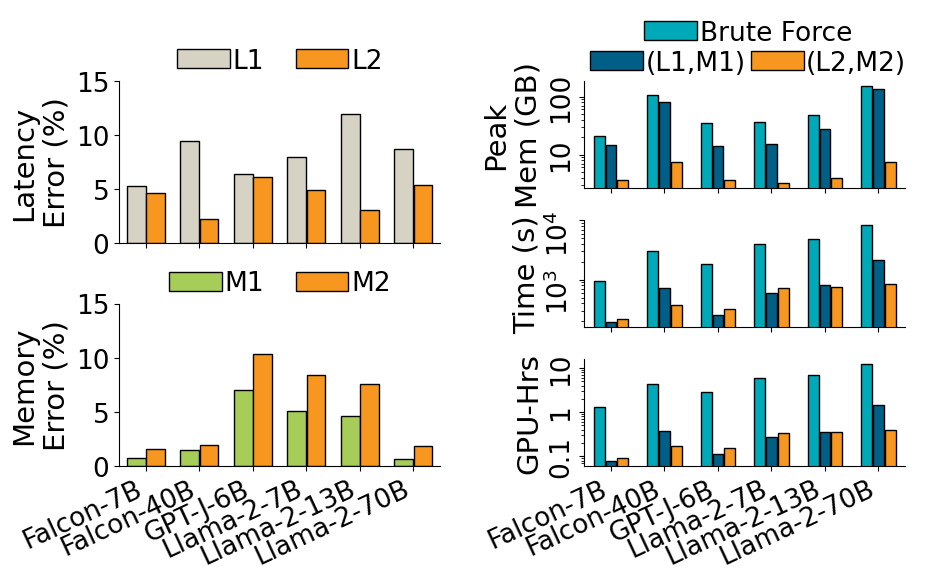

In [32]:
# Create the figure
fig = plt.figure(figsize=(17, 5))
gs = gridspec.GridSpec(14, 20, figure=fig)


# figure configs
fontsize = 21
colorpal = {'L1':'#d6d2c4', 'L2':'#f8971f', 'L3': '#8d5a97',
            'M1':'#a6cd57', 'M2':'#f8971f', 'M3':'#579d42',
            'L0,M0':'#00a9b7','L1,M1':'#005f86','L2,M2':'#f8971f','L3,M3':'#9cadb7'}

def foramt_tick(tick):
  tick_val = float(tick)
  if tick_val.is_integer(): return str(int(tick_val))
  else: return str(tick_val)


# Subplot 1: Median Latency Error
ax1 = fig.add_subplot(gs[0:6, 0:5])
bars1 = ax1.bar(np.arange(6)-0.18, [np.median(APE_latency[model]['L1']) for model in ['falcon-7b', 'falcon-40b', 'gptj-6b', 'llama-2-7b', 'llama-2-13b', 'llama-2-70b']], width=0.35, color=[colorpal['L1']]*6, edgecolor='black', label='L1')
bars1 = ax1.bar(np.arange(6)+0.18, [np.median(APE_latency[model]['L2']) for model in ['falcon-7b', 'falcon-40b', 'gptj-6b', 'llama-2-7b', 'llama-2-13b', 'llama-2-70b']], width=0.35, color=[colorpal['L2']]*6, edgecolor='black', label='L2')
ax1.set_ylim(0,15)
ax1.set_yticks([0, 5, 10, 15])
ax1.set_xlim(-0.5, 5.5)
ax1.set_xticks(np.arange(6))
ax1.set_xticklabels([])
ax1.set_ylabel('Latency\nError (%)', fontsize = fontsize)
# ax1.set_title('Latency', fontsize = fontsize)
ax1.tick_params(axis='both', labelsize = fontsize-2)

legend_patch1 = Patch(facecolor=colorpal['L1'], label='L1', edgecolor='black')
legend_patch2 = Patch(facecolor=colorpal['L2'], label='L2', edgecolor='black')
ax1.legend(handles=[legend_patch1, legend_patch2], loc='upper center', ncol=2, fontsize=fontsize-2, title_fontsize=fontsize, frameon=False, labelspacing=0.5, handletextpad=0.1, columnspacing=1.2, bbox_to_anchor=(0.5, 1.35))

# Subplot 2: Meidan Memory Error
ax2 = fig.add_subplot(gs[8:14, 0:5])

bars1 = ax2.bar(np.arange(6)-0.18, [np.median(APE_memory[model]['M1']) for model in ['falcon-7b', 'falcon-40b', 'gptj-6b', 'llama-2-7b', 'llama-2-13b', 'llama-2-70b']], width=0.35, color=[colorpal['M1']]*6, edgecolor='black', label='M1')
bars1 = ax2.bar(np.arange(6)+0.18, [np.median(APE_memory[model]['M2']) for model in ['falcon-7b', 'falcon-40b', 'gptj-6b', 'llama-2-7b', 'llama-2-13b', 'llama-2-70b']], width=0.35, color=[colorpal['M2']]*6, edgecolor='black', label='M2')
ax2.set_ylim(0,15)
ax2.set_yticks([0, 5, 10, 15])
ax2.set_xlim(-0.5, 5.5)
ax2.set_xticks(np.arange(6))
ax2.set_xticklabels(['Falcon-7B', 'Falcon-40B', 'GPT-J-6B', 'Llama-2-7B', 'Llama-2-13B', 'Llama-2-70B'], rotation=25, ha='right')
ax2.set_ylabel('Memory\nError (%)', fontsize = fontsize)
# ax2.set_title('Memory', fontsize = fontsize)
ax2.tick_params(axis='both', labelsize = fontsize-2)

legend_patch1 = Patch(facecolor=colorpal['M1'], label='M1', edgecolor='black')
legend_patch2 = Patch(facecolor=colorpal['M2'], label='M2', edgecolor='black')
ax2.legend(handles=[legend_patch1, legend_patch2], loc='upper center', ncol=2, fontsize=fontsize-2, title_fontsize=fontsize, frameon=False, labelspacing=0.5, handletextpad=0.1, columnspacing=1.2, bbox_to_anchor=(0.5, 1.35))


# Subplot 3: Peak Profiling Memory Consumption
ax3 = fig.add_subplot(gs[0:4, 7:12])
bars1 = ax3.bar(np.arange(6)-0.22, [prof_cost['Prof_Mem'][model]['L0-M0'] for model in ['falcon-7b', 'falcon-40b', 'gptj-6b', 'llama-2-7b', 'llama-2-13b', 'llama-2-70b']], width=0.2, color=[colorpal['L0,M0']]*6, edgecolor='black', label='Brute Force')
bars2 = ax3.bar(np.arange(6), [prof_cost['Prof_Mem'][model]['L1-M1'] for model in ['falcon-7b', 'falcon-40b', 'gptj-6b', 'llama-2-7b', 'llama-2-13b', 'llama-2-70b']], width=0.2, color=[colorpal['L1,M1']]*6, edgecolor='black', label='(L1,M1)')
bars3 = ax3.bar(np.arange(6)+0.22, [prof_cost['Prof_Mem'][model]['L2-M2'] for model in ['falcon-7b', 'falcon-40b', 'gptj-6b', 'llama-2-7b', 'llama-2-13b', 'llama-2-70b']], width=0.2, color=[colorpal['L2,M2']]*6, edgecolor='black', label='(L2,M2)')
ax3.set_ylabel('Peak\nMem (GB)', fontsize = fontsize)
ax3.set_yscale('log')
ax3.set_yticklabels([foramt_tick(tick) for tick in ax3.get_yticks()], rotation=90, va='center')
ax3.set_xlim(-0.5, 5.5)
ax3.set_xticks(np.arange(6))
ax3.set_xticklabels([])
ax3.tick_params(axis='both', labelsize = fontsize-2)

# Subplot 4: Profiling Time
ax4 = fig.add_subplot(gs[5:9, 7:12])
bars1 = ax4.bar(np.arange(6)-0.22, [prof_cost['Prof_Time'][model]['L0-M0'] for model in ['falcon-7b', 'falcon-40b', 'gptj-6b', 'llama-2-7b', 'llama-2-13b', 'llama-2-70b']], width=0.2, color=[colorpal['L0,M0']]*6, edgecolor='black', label='Brute Force')
bars2 = ax4.bar(np.arange(6), [prof_cost['Prof_Time'][model]['L1-M1'] for model in ['falcon-7b', 'falcon-40b', 'gptj-6b', 'llama-2-7b', 'llama-2-13b', 'llama-2-70b']], width=0.2, color=[colorpal['L1,M1']]*6, edgecolor='black', label='(L1,M1)')
bars3 = ax4.bar(np.arange(6)+0.22, [prof_cost['Prof_Time'][model]['L2-M2'] for model in ['falcon-7b', 'falcon-40b', 'gptj-6b', 'llama-2-7b', 'llama-2-13b', 'llama-2-70b']], width=0.2, color=[colorpal['L2,M2']]*6, edgecolor='black', label='(L2,M2)')
ax4.set_ylabel('Time (s)', fontsize = fontsize)
ax4.set_yscale('log')
ax4.tick_params(axis='y', labelrotation=90)
ax4.set_xlim(-0.5, 5.5)
ax4.set_xticks(np.arange(6))
ax4.set_xticklabels([])
ax4.tick_params(axis='both', labelsize = fontsize-2)

# Subplot 5: Profiling GPU-Time
ax5 = fig.add_subplot(gs[10:14, 7:12])
bars1 = ax5.bar(np.arange(6)-0.22, [prof_cost['Prof_GPUHr'][model]['L0-M0'] for model in ['falcon-7b', 'falcon-40b', 'gptj-6b', 'llama-2-7b', 'llama-2-13b', 'llama-2-70b']], width=0.2, color=[colorpal['L0,M0']]*6, edgecolor='black', label='Brute Force')
bars2 = ax5.bar(np.arange(6), [prof_cost['Prof_GPUHr'][model]['L1-M1'] for model in ['falcon-7b', 'falcon-40b', 'gptj-6b', 'llama-2-7b', 'llama-2-13b', 'llama-2-70b']], width=0.2, color=[colorpal['L1,M1']]*6, edgecolor='black', label='(L1,M1)')
bars3 = ax5.bar(np.arange(6)+0.22, [prof_cost['Prof_GPUHr'][model]['L2-M2'] for model in ['falcon-7b', 'falcon-40b', 'gptj-6b', 'llama-2-7b', 'llama-2-13b', 'llama-2-70b']], width=0.2, color=[colorpal['L2,M2']]*6, edgecolor='black', label='(L2,M2)')
ax5.set_ylabel('GPU-Hrs', fontsize = fontsize)
ax5.set_yscale('log')
ax5.set_yticklabels([foramt_tick(tick) for tick in ax5.get_yticks()], rotation=90, va='center')
ax5.set_xlim(-0.5, 5.5)
ax5.set_xticks(np.arange(6))
ax5.set_xticklabels(['Falcon-7B', 'Falcon-40B', 'GPT-J-6B', 'Llama-2-7B', 'Llama-2-13B', 'Llama-2-70B'], rotation=25, ha='right')
ax5.tick_params(axis='both', labelsize = fontsize-2)

handles, labels = ax3.get_legend_handles_labels()
handles_1, labels_1 = handles[:1], labels[:1]
fig.legend(handles_1, labels_1, bbox_to_anchor=(0.495, 1.05), loc='upper center', ncol=1, fontsize=fontsize-2, title_fontsize=fontsize, frameon=False, labelspacing=.01, handletextpad=0.1, columnspacing=0.2)
handles_2, labels_2 = handles[1:], labels[1:]
fig.legend(handles_2, labels_2, bbox_to_anchor=(0.495, 0.99), loc='upper center', ncol=2, fontsize=fontsize-2, title_fontsize=fontsize, frameon=False, labelspacing=.01, handletextpad=0.1, columnspacing=0.2)


for ii,ax in enumerate([ax1, ax2, ax3, ax4, ax5]):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.savefig('Profiling_Exploration.pdf', format='pdf', bbox_inches='tight')

plt.show()

### Analysis

In [33]:
# Memory
mem_fm = [prof_cost['Prof_Mem'][model]['L1-M1'] for model in ['falcon-7b', 'falcon-40b', 'gptj-6b', 'llama-2-7b', 'llama-2-13b', 'llama-2-70b']]
mem_fng = [prof_cost['Prof_Mem'][model]['L2-M2'] for model in ['falcon-7b', 'falcon-40b', 'gptj-6b', 'llama-2-7b', 'llama-2-13b', 'llama-2-70b']]

mem_info = [x/y for (x,y) in zip(mem_fm,mem_fng)]
print(f'Memory --> MIN={min(mem_info):.2f}x & MAX={max(mem_info):.2f}x')

Memory --> MIN=3.76x & MAX=18.01x


In [34]:
# Time & GPU-hrs
t = prof_cost['Prof_Time']['llama-2-70b']['L1-M1'] / prof_cost['Prof_Time']['llama-2-70b']['L2-M2']
g = prof_cost['Prof_GPUHr']['llama-2-70b']['L1-M1'] / prof_cost['Prof_GPUHr']['llama-2-70b']['L2-M2']
print(f'Llama-2-70b --> Time:{t:.2f}x & GPU-hrs:{g:.2f}x')

Llama-2-70b --> Time:2.51x & GPU-hrs:3.77x


## Batch Size Support

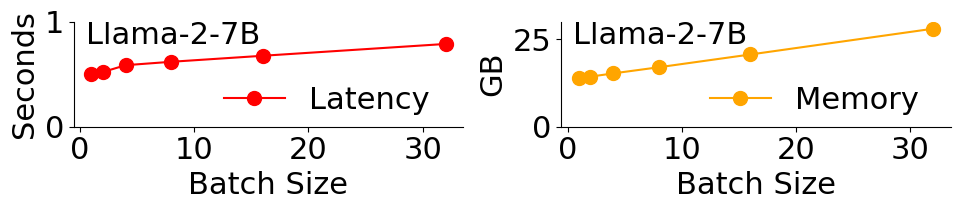

In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('./BS_scaling_data.csv')

# Config
model = 'llama-2-7b'
tp= 2
pp= 4
dtype = 'int4'
int8_kv = False

batch_size_list = []
latency_list = []
memory_list = []

for batch_size in [1, 2, 4, 8, 16, 32]:#, 64, 128, 256, 512]:
  latency = df[(df['Model'] == model) & (df['TP'] == tp) & (df['PP'] == pp) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Batch_Size'] == batch_size)]['Latency'].iloc[0]
  memory = df[(df['Model'] == model) & (df['TP'] == tp) & (df['PP'] == pp) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Batch_Size'] == batch_size)]['Memory-After-Run'].iloc[0]
  batch_size_list.append(batch_size)
  latency_list.append(latency)
  memory_list.append(memory)

# Create figure and axis objects
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 2.2))
fontsize = 20


# 1st Plot: Latency
ax1.plot(batch_size_list, latency_list, marker='o', linestyle='-', color='red', markersize=10, label='Latency')
ax1.set_xlabel('Batch Size', fontsize = fontsize+2)
ax1.set_ylabel('Seconds', fontsize = fontsize+2)
ax1.tick_params(axis='both', labelsize = fontsize+2)
ax1.legend(fontsize = fontsize+2, frameon=False, bbox_to_anchor=(0.65, 0.65), loc='upper center')
ax1.set_ylim(0,1)
# ax1.set_title('Llama-2-7B', fontsize = fontsize+2)

# 2nd Plot: Memory
ax2.plot(batch_size_list, memory_list, marker='o', linestyle='-', color='orange', markersize=10, label='Memory')
ax2.set_xlabel('Batch Size', fontsize = fontsize+2)
ax2.set_ylabel('GB', fontsize = fontsize+2)
ax2.tick_params(axis='both', labelsize = fontsize+2)
ax2.legend(fontsize = fontsize+2, frameon=False, bbox_to_anchor=(0.65, 0.65), loc='upper center')
ax2.set_ylim(0,30)
# ax2.set_title('Llama-2-7B', fontsize = fontsize+2)

for ax in [ax1, ax2]:
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  y_min, y_max = ax.get_ylim()
  ax.text(0.5, y_max, 'Llama-2-7B', fontsize=fontsize+2, ha='left', va='top', clip_on=True)

plt.tight_layout()

plt.savefig('Batch_Size_Effect.pdf', format='pdf', bbox_inches='tight')

plt.show()

# 6.Deployer

In [36]:
!unzip ./trace30min.zip

Archive:  ./trace30min.zip
replace 30min/trace_11_0.3_hybrid_0.5_min_cost_test.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [37]:
import numpy as np
import random

random_seed = 42
np.random.seed(random_seed)
random.seed(random_seed)

scale = 0.3

scale = scale / 0.2
N = 1800 * scale
lambda_ = 1 * scale # Poisson arrival rate

# Parameters
high_lambda = 2.5 * lambda_   # High workload Poisson arrival rate
low_lambda = 1 * lambda_    # Low workload Poisson arrival rate
mu = 0             # Log-normal mean
sigma = 2          # Log-normal standard deviation
minutes_per_stage = 2  # Duration of each stage in minutes
high_to_low_ratio = int(high_lambda /low_lambda)   # Ratio of high workload to low workload tasks

# Calculate the number of requests per stage based on the ratio
low_requests_per_stage = N // (30 // minutes_per_stage)  # Number of requests in low workload stages
high_requests_per_stage = high_to_low_ratio * low_requests_per_stage  # High workload stages

# Initialize arrays
arrival_times = []
execution_times = []

# Generate data for each stage
current_time = 0
total_stages = 30 // minutes_per_stage  # Total number of stages in 30 minutes

for stage in range(total_stages):
    if stage % 2 == 1:
        lambda_ = high_lambda
        num_requests = int(high_requests_per_stage)
    else:
        lambda_ = low_lambda
        num_requests = int(low_requests_per_stage)

    # Generate inter-arrival times for this stage
    inter_arrival_times = np.random.exponential(scale=1/lambda_, size=num_requests)
    stage_arrival_times = np.cumsum(inter_arrival_times) + current_time
    arrival_times.extend(stage_arrival_times)
    current_time = arrival_times[-1]

    # Generate execution times for this stage
    stage_execution_times = np.random.lognormal(mean=mu, sigma=sigma, size=num_requests)
    execution_times.extend(stage_execution_times)

# Combine into a trace
request_trace = list(zip(arrival_times, execution_times))

# Output sample
for i in range(5):
    print(f"Request {i+1}: Arrival Time = {arrival_times[i]:.4f}, Execution Time = {execution_times[i]:.4f}")

arrival_times = np.array(arrival_times)
bins = np.arange(np.floor(arrival_times.min()), np.ceil(arrival_times.max()) + 1)
requests_per_second, _ = np.histogram(arrival_times, bins=bins)
print(requests_per_second)

Request 1: Arrival Time = 0.3128, Execution Time = 0.4600
Request 2: Arrival Time = 2.3196, Execution Time = 0.1702
Request 3: Arrival Time = 3.1974, Execution Time = 0.4899
Request 4: Arrival Time = 3.8061, Execution Time = 3.0412
Request 5: Arrival Time = 3.9191, Execution Time = 8.0665
[1 0 1 ... 2 2 5]


In [38]:
#0.3
num_of_device = {
    'least-loaded':[0, 1, 2, 6, 8, 8, 8, 8, 8, 8],
    'packing':[0, 1, 1, 4, 4, 4, 4, 4, 4, 4],
    'hybrid':[0, 1, 1, 4, 4, 5, 5, 5, 5, 5],

}

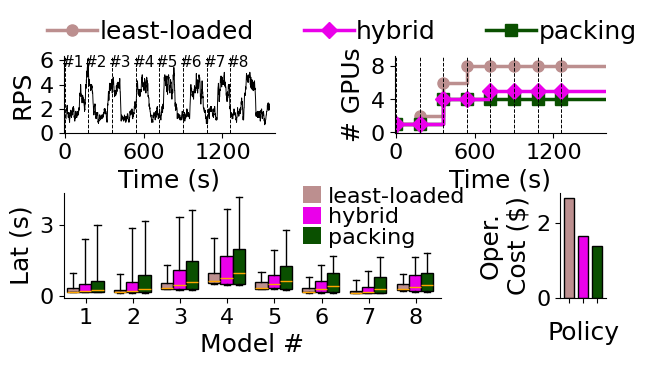

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Patch

fs = 18

plt.rcParams.update({'font.size': fs})
# Creating subplots in one column
#fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 5.7))
fig = plt.figure(figsize=(7, 3.5))
# fig = plt.figure(figsize=(9, 3.5))
gs = GridSpec(10, 10, figure=fig)

axes = [fig.add_subplot(gs[0:3, 0:4]), fig.add_subplot(gs[0:3, 6:10]), fig.add_subplot(gs[5:9, 0:7]), fig.add_subplot(gs[5:9, 9:10])]
# ---- First subplot: Smoothed requests per second ----
bins = np.arange(np.floor(arrival_times.min()), np.ceil(arrival_times.max()) + 1)
requests_per_second, _ = np.histogram(arrival_times, bins=bins)
window_size = 10
smoothed_requests = np.convolve(requests_per_second, np.ones(window_size) / window_size, mode='valid')
smoothed_time = bins[:-1][(window_size - 1):]
axes[0].plot(smoothed_time, smoothed_requests, linestyle='-', color='black',linewidth = 0.7)

x_values = [0, 180, 360, 540, 720, 900, 1080, 1260]
labels = ['#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8']
colors = ['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black']
for x, color, label in zip(x_values, colors, labels):
    axes[0].axvline(x=x, color=color, linestyle='--', linewidth=0.7)
    axes[0].text(x + 60, axes[0].get_ylim()[1] - 1.2, label, ha='center', va='bottom', fontsize=11, color=color)

axes[0].set_yticks([0, 2, 4, 6])
axes[0].set_yticklabels([0, 2, 4, 6],fontsize=fs-2)
axes[0].set_xlim(-10, 1600)
axes[0].set_xticks([0, 600, 1200])
axes[0].set_xticklabels(['0', '600', '1200'],fontsize=fs-2)
axes[0].set_xlabel('Time (s)', fontsize=fs)
axes[0].set_ylabel('RPS', fontsize=fs)

# ---- Second subplot: Number of GPUs used during the trace ----
offset = 0.01
markers = ['o', 's', 'D', '^', 'v', 'P', '*']
colors2 = ['#BC8F8F',  "#0A5000", "#EA00EA",]  # Blue, Orange, Red

for i, (label, n) in enumerate(num_of_device.items()):
    shifted_n = [val + i * offset for val in n]
    color = colors2[i % len(colors)]  # Cycle through blue, orange, and red
    axes[1].step([-100] + x_values + [1900], shifted_n, linestyle='-', marker=markers[i],
                 linewidth=2.5, markersize=8, label=label, where='post', alpha=1, color=color)

for x, color, label in zip(x_values, colors, labels):
    axes[1].axvline(x=x, color=color, linestyle='--', linewidth=0.7)

axes[1].set_xlim(-10, 1600)
axes[1].set_ylim(-0.1, 9.3)
axes[1].set_xticks([0, 600, 1200])
axes[1].set_xticklabels(['0', '600', '1200'],fontsize=fs-2)
axes[1].set_yticks([0, 4, 8])
axes[1].set_yticklabels([0, 4, 8],fontsize=fs-2)
axes[1].set_xlabel('Time (s)', fontsize=fs)
axes[1].set_ylabel('# GPUs', fontsize=fs)
handles, labels = axes[1].get_legend_handles_labels()

handles[1], handles[2] = handles[2], handles[1]
labels[1], labels[2] = labels[2], labels[1]
axes[1].legend(handles, ['least-loaded', 'hybrid', 'packing'], bbox_to_anchor=(-0.25, 1.75), loc='upper center', ncol=3, frameon=False,labelspacing=.1,handletextpad=0.1,fontsize=18)


# ---- Third subplot: Latency of each model with different loading strategies ----
for n, label in enumerate(['least-loaded', 'hybrid', 'packing']):
    bars = []
    for m in range(1, 9):
        if label == 'least-loaded':
          df = pd.read_csv(f'./30min/large_q_llf_0.7_0.3_min_cost_p_0_{m}_output_records.csv')
        elif label == 'hybrid':
          df = pd.read_csv(f'./30min/large_q_hybrid_0.7_0.3_min_cost_p_0_{m}_output_records.csv')
        elif label == 'packing':
          df = pd.read_csv(f'./30min/large_q_packing_0.7_0.3_min_cost_p_0_{m}_output_records.csv')

        bars.append(df['req_time'])

    #colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    colors = ['#BC8F8F', "#EA00EA", "#0A5000",]
    flierprops = dict(marker='.', color='black', markersize=1)

    # Corrected label spelling and other small adjustments
    boxes = axes[2].boxplot(bars,
                            positions=np.arange(8)/2 + (n+2.5)*0.13 - 2.5*0.13,
                            widths=0.13,
                            whis=[5, 95],
                            showfliers=False,
                            flierprops=flierprops,
                            patch_artist=True)
    plt.plot([], [], color=colors[n], label=label)

    for median in boxes['medians']:
        median.set_color('orange')
    for patch in boxes['boxes']:
        patch.set_facecolor(colors[n])

axes[2].set_xticks(np.arange(8)/2+0.1375)
axes[2].set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8'], fontsize=fs-2)
axes[2].set_xlim(-0.1, 3.9)
axes[2].set_xlabel('Model #', fontsize=fs)
axes[2].set_ylabel('Lat (s)', fontsize=fs)
axes[2].set_yticks([0, 3])
axes[2].set_yticklabels([0, 3], fontsize=fs-2)
handles, labels = axes[2].get_legend_handles_labels()

legend_patches = [Patch(facecolor=colors[i], label=label)
                  for i, label in enumerate(['least-loaded', 'hybrid', 'packing'])]
axes[2].legend(handles=legend_patches, bbox_to_anchor=(0.85, 1.25), loc='upper center', ncol=1, frameon=False, labelspacing=0.01, handletextpad=0.3, fontsize=16, handlelength=0.8, handleheight=0.8)


# ---- Forth subplot: Operational COst with different loading strategies ----
op_cost_list = [2.69, 1.65, 1.4] # all end at 1851
# for n, label in enumerate(['least-loaded', 'hybrid', 'packing']):
#     bars = []
#     for m in range(1, 9):
#         if label == 'least-loaded':
#           df = pd.read_csv(f'./30min/large_q_llf_0.7_0.3_min_cost_p_0_{m}_output_records.csv')
#         elif label == 'hybrid':
#           df = pd.read_csv(f'./30min/large_q_hybrid_0.7_0.3_min_cost_p_0_{m}_output_records.csv')
#         elif label == 'packing':
#           df = pd.read_csv(f'./30min/large_q_packing_0.7_0.3_min_cost_p_0_{m}_output_records.csv')

#         # bars.append(0.8*df['req_time'].sum()*num_of_device[label][m]/3600)
#         bars.append(df['req_time'].sum()*num_of_device[label][m]/60/8)

#     op_cost_list.append(sum(bars))

# print(op_cost_list)

boxes = axes[3].bar(np.arange(3), op_cost_list,width=0.7, color=['#BC8F8F', "#EA00EA", "#0A5000", ], edgecolor='black',)

axes[3].set_xticks(np.arange(3))
axes[3].set_xticklabels([], fontsize=fs-2)
axes[3].set_xlim(-0.65, 2.65)
axes[3].set_xlabel('Policy', fontsize=fs, labelpad=10)
axes[3].set_ylabel('Oper.\nCost ($)', fontsize=fs)
# axes[3].yaxis.set_label_coords(-0.6, 0.3)
axes[3].set_yticks([0, 2])
axes[3].set_yticklabels([0, 2], fontsize=fs-2)
handles, labels = axes[2].get_legend_handles_labels()

for axs in axes:
    axs.spines['top'].set_visible(False)
    axs.spines['right'].set_visible(False)



plt.savefig('Deployment_Exploration.pdf', format='pdf', bbox_inches='tight')
# Show the combined figure
plt.show()


### Analysis

In [40]:
num_of_device = {
    'least-loaded':[0, 1, 2, 6, 8, 8, 8, 8, 8, 8],
    'hybrid':[0, 1, 1, 4, 4, 5, 5, 5, 5, 5],
    'packing':[0, 1, 1, 4, 4, 4, 4, 4, 4, 4],
}

for n, label in enumerate(['least-loaded', 'hybrid', 'packing']):
    bars = []
    for m in range(1, 9):
        if label == 'least-loaded':
          df = pd.read_csv(f'./30min/large_q_llf_0.7_0.3_min_cost_p_0_{m}_output_records.csv')
        elif label == 'hybrid':
          df = pd.read_csv(f'./30min/large_q_hybrid_0.7_0.3_min_cost_p_0_{m}_output_records.csv')
        elif label == 'packing':
          df = pd.read_csv(f'./30min/large_q_packing_0.7_0.3_min_cost_p_0_{m}_output_records.csv')

        bars.append(df['req_time'])
        print(f"{label}, #Model_ID:{m} --> Median:{df['req_time'].median():.2f}, P95:{df['req_time'].quantile(0.95):.2f}")

print(op_cost_list)

least-loaded, #Model_ID:1 --> Median:0.18, P95:0.98
least-loaded, #Model_ID:2 --> Median:0.15, P95:0.97
least-loaded, #Model_ID:3 --> Median:0.33, P95:1.31
least-loaded, #Model_ID:4 --> Median:0.61, P95:2.53
least-loaded, #Model_ID:5 --> Median:0.35, P95:1.03
least-loaded, #Model_ID:6 --> Median:0.15, P95:0.81
least-loaded, #Model_ID:7 --> Median:0.14, P95:0.66
least-loaded, #Model_ID:8 --> Median:0.31, P95:0.92
hybrid, #Model_ID:1 --> Median:0.22, P95:2.41
hybrid, #Model_ID:2 --> Median:0.23, P95:2.98
hybrid, #Model_ID:3 --> Median:0.46, P95:3.35
hybrid, #Model_ID:4 --> Median:0.75, P95:3.68
hybrid, #Model_ID:5 --> Median:0.49, P95:1.95
hybrid, #Model_ID:6 --> Median:0.27, P95:1.32
hybrid, #Model_ID:7 --> Median:0.14, P95:1.07
hybrid, #Model_ID:8 --> Median:0.39, P95:1.74
packing, #Model_ID:1 --> Median:0.24, P95:2.99
packing, #Model_ID:2 --> Median:0.28, P95:3.16
packing, #Model_ID:3 --> Median:0.57, P95:3.63
packing, #Model_ID:4 --> Median:0.96, P95:4.17
packing, #Model_ID:5 --> Med

In [41]:
# Median
print('Mean (Packing/Hybrid)-->')
med = np.array([0.24, 0.28, 0.57, 0.96, 0.64, 0.40, 0.28, 0.47]) / np.array([0.22, 0.23, 0.46, 0.75, 0.49, 0.27, 0.14, 0.39])
print(np.mean(med))

#P95
print('P95 (Packing/Hybrid)-->')
p95 =np.array([2.99, 3.16, 3.63, 4.17, 2.79, 1.72, 1.67, 1.89]) / np.array([2.41, 2.98, 3.35, 3.68, 1.95, 1.32, 1.07, 1.74])
print(np.mean(p95))

Mean (Packing/Hybrid)-->
1.3525203707036004
P95 (Packing/Hybrid)-->
1.2373193677933298


# 8.Evaluation

In [77]:
!unzip ./evaluation.zip

Archive:  ./evaluation.zip
   creating: evaluation/
   creating: evaluation/e2e_results/
   creating: evaluation/e2e_results/large/
   creating: evaluation/e2e_results/large/MaverIQ-FP16/
  inflating: evaluation/e2e_results/large/MaverIQ-FP16/MaverIQ-FP16_large_hybrid_0.7_0.2_min_cost_code_0_1_output_records.csv  
  inflating: evaluation/e2e_results/large/MaverIQ-FP16/MaverIQ-FP16_large_hybrid_0.7_0.4_min_cost_conversation_0_1_output_records.csv  
  inflating: evaluation/e2e_results/large/MaverIQ-FP16/MaverIQ-FP16_large_hybrid_0.7_0.2_min_cost_code_0_3_output_records.csv  
  inflating: evaluation/e2e_results/large/MaverIQ-FP16/trace_MaverIQ-FP16_large_hybrid_0.7_0.2_min_cost_code_0.txt  
  inflating: evaluation/e2e_results/large/MaverIQ-FP16/MaverIQ-FP16_large_hybrid_0.7_0.4_min_cost_conversation_0_3_output_records.csv  
  inflating: evaluation/e2e_results/large/MaverIQ-FP16/MaverIQ-FP16_large_hybrid_0.7_0.2_min_cost_code_0_2_output_records.csv  
  inflating: evaluation/e2e_results/lar

## End-To-End Experiments

### SLO Calculation

In [42]:
import pandas as pd
import numpy as np

# Number of full model's layers
max_layer_list = {'falcon-7b':32, 'falcon-40b':60, 'gptj-6b':28, 'llama-2-7b':32, 'llama-2-13b':40, 'llama-2-70b':80}

df_ground_truth = pd.read_csv('./full_model_data_collection.csv') # Full Model Profiling Data

''' Function to select balanced/near-balanced PP mapping '''
def pick_pp_map_evenly(X, Y):
    # Base value for each element
    base_value = X // Y

    # Number of elements that need to be incremented by 1
    remainder = X % Y

    # Create the list with base values
    result = [base_value] * Y

    # Distribute the remainder by adding 1 to the first 'remainder' elements
    for i in range(remainder):
        result[i] += 1

    return result


''' Function to transform list of elements to string '''
def list_to_string(number_list):
    return ' '.join(str(elem) for elem in number_list)


''' Function to calculate TTFT & TPOT from the full-model for a specified config '''
def calc_TTFT_TPOT_full_model(lat_o1,lat_o2,o1,o2):
  TPOT = (lat_o2-lat_o1)/(o2-o1)
  TTFT = lat_o1 - o1*TPOT
  return TTFT, TPOT

''' Function to calculate TTFT and TPOT of model for specific config using full model data '''
def get_TTFT_TPOT_full_model(df_lat, model, tp, pp, dtype, int8_kv, model_layer_list=max_layer_list):
  pp_map = list_to_string(pick_pp_map_evenly(model_layer_list[model], pp))
  latency_10 = df_lat[(df_lat['Model'] == model) & (df_lat['TP'] == tp) & (df_lat['PP'] == pp) & (df_lat['PP_Map'] == pp_map) & (df_lat['DTYPE'] == dtype) & (df_lat['INT8_KV_Cache'] == int8_kv) & (df_lat['Output_Lenght'] == 10)]['Latency'].iloc[0]
  latency_20 = df_lat[(df_lat['Model'] == model) & (df_lat['TP'] == tp) & (df_lat['PP'] == pp) & (df_lat['PP_Map'] == pp_map) & (df_lat['DTYPE'] == dtype) & (df_lat['INT8_KV_Cache'] == int8_kv) & (df_lat['Output_Lenght'] == 20)]['Latency'].iloc[0]
  TTFT, TPOT = calc_TTFT_TPOT_full_model(latency_10, latency_20, 10, 20)
  return TTFT, TPOT


SLO = {}

for model in ['falcon-7b', 'falcon-40b', 'gptj-6b', 'llama-2-7b', 'llama-2-13b', 'llama-2-70b']:
  if (model == 'falcon-40b'): pp = 2
  elif (model == 'llama-2-70b'): pp = 3
  else: pp = 1
  TTFT, TPOT = get_TTFT_TPOT_full_model(df_ground_truth, model, 1, pp, 'float16', False, model_layer_list=max_layer_list)
  SLO[model] = {'TTFT':float(TTFT), 'TPOT':float(TPOT)}

SLO

{'falcon-7b': {'TTFT': 0.12082219123840321, 'TPOT': 0.022863030433654792},
 'falcon-40b': {'TTFT': 0.624104261398315, 'TPOT': 0.12415540218353274},
 'gptj-6b': {'TTFT': 0.09602769215901702, 'TPOT': 0.02005875905354817},
 'llama-2-7b': {'TTFT': 0.1180638472239176, 'TPOT': 0.022632678349812828},
 'llama-2-13b': {'TTFT': 0.20675762494405125, 'TPOT': 0.041599225997924795},
 'llama-2-70b': {'TTFT': 1.0318046410878505, 'TPOT': 0.2043164253234863}}

## NO SLO Experiment

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import ast
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch
import copy
import random
import warnings

warnings.filterwarnings("ignore")

### Model Set: [Large] - Trace: [Code, Conversation] - Rate_Scale: [0.4, 0.3, 0.2, 0.1] - SLO: [0 | 5 for AlpaServe]

In [44]:
Memory_Dataset_large = {
    'MaverIQ_min_lat_code_0.1': [{0: 5.8453369140625, 1: 5.8218994140625, 2: 5.8609619140625, 3: 5.8609619140625, 4: 5.8609619140625, 5: 5.8609619140625, 6: 5.8609619140625, 7: 5.8218994140625}, # Model load on GPU 0,1,2,3,4,5,6,7
                                {0: 5.8511962890625, 1: 12.48907470703125, 2: 5.8668212890625, 3: 12.53790283203125, 4: 12.49884033203125, 5: 5.8668212890625, 6: 12.53790283203125, 7: 5.8277587890625}, #Model load on GPU 1,6,3,4
                                {0: 7.10235595703125, 1: 13.92578125, 2: 7.20196533203125, 3: 13.8125, 4: 13.943359375, 5: 7.20196533203125, 6: 13.796875, 7: 7.06329345703125}, # Model load on GPU 1,4,6,3,7,0,2,5
                                {0: 7.11016845703125, 1: 20.56170654296875, 2: 7.21173095703125, 3: 20.49139404296875, 4: 20.61639404296875, 5: 7.21173095703125, 6: 20.46600341796875, 7: 7.07110595703125}], # Model load on GPU 6,4,3,1

    'MaverIQ_min_lat_code_0.2': [{0: 5.8453369140625, 1: 5.8218994140625, 2: 5.8609619140625, 3: 5.8609619140625, 4: 5.8609619140625, 5: 5.8609619140625, 6: 5.8609619140625, 7: 5.8218994140625}, # Model load on GPU 0,1,2,3,4,5,6,7
                                {0: 12.54180908203125, 1: 12.52032470703125, 2: 12.51837158203125, 3: 5.8648681640625, 4: 5.8648681640625, 5: 12.55157470703125, 6: 5.8648681640625, 7: 5.8258056640625}, # Model load on GPU 5,0,1,2
                                {0: 13.96484375, 1: 13.9296875, 2: 13.779296875, 3: 7.12188720703125, 4: 7.20196533203125, 5: 13.828125, 6: 7.18634033203125, 7: 7.06134033203125}, # Model load on GPU 0,1,2,5,3,7,4,6
                                {0: 20.66326904296875, 1: 20.63006591796875, 2: 20.46990966796875, 3: 7.12384033203125, 4: 7.20587158203125, 5: 20.48748779296875, 6: 7.19024658203125, 7: 7.06524658203125}], # Model load on GPU 2,0,1,5

    'MaverIQ_min_lat_code_0.3': [{0: 5.8453369140625, 1: 5.8218994140625, 2: 5.8609619140625, 3: 5.8609619140625, 4: 5.8609619140625, 5: 5.8609619140625, 6: 5.8609619140625, 7: 5.8218994140625}, # Model load on GPU 0,1,2,3,4,5,6,7
                                {0: 12.64532470703125, 1: 12.61993408203125, 2: 5.8648681640625, 3: 5.8648681640625, 4: 12.66094970703125, 5: 12.66094970703125, 6: 5.8648681640625, 7: 5.8258056640625}, # Model load on GPU 1,0,4,5
                                {0: 14.03125, 1: 14.005859375, 2: 7.31134033203125, 3: 7.27227783203125, 4: 14.201171875, 5: 14.177734375, 6: 7.24688720703125, 7: 7.20782470703125}, # Model load on GPU 4,5,1,0,6,7,2,3
                                {0: 20.83319091796875, 1: 20.80389404296875, 2: 7.31524658203125, 3: 7.27618408203125, 4: 21.00115966796875, 5: 20.97967529296875, 6: 7.25274658203125, 7: 7.21173095703125}], # Model load on GPU 0,1,4,5

    'MaverIQ_min_lat_code_0.4': [{0: 5.8453369140625, 1: 5.8218994140625, 2: 5.8609619140625, 3: 5.8609619140625, 4: 5.8609619140625, 5: 5.8609619140625, 6: 5.8609619140625, 7: 5.8218994140625}, # Model load on GPU 0,1,2,3,4,5,6,7
                                {0: 12.64532470703125, 1: 12.62188720703125, 2: 5.8668212890625, 3: 5.8668212890625, 4: 5.8668212890625, 5: 5.8668212890625, 6: 12.66290283203125, 7: 12.62384033203125}, # Model load on GPU 1,6,7,0
                                {0: 14.19921875, 1: 14.005859375, 2: 7.27227783203125, 3: 7.24688720703125, 4: 7.24688720703125, 5: 7.31134033203125, 6: 14.0078125, 7: 14.162109375}, # Model load on GPU 7,0,6,1,3,4,2,5
                                {0: 14.205078125, 1: 14.0078125, 2: 14.072265625, 3: 14.044921875, 4: 14.044921875, 5: 14.111328125, 6: 14.009765625, 7: 14.16796875}], # Model load on GPU 3,4,2,5

    'MaverIQ_min_lat_conversation_0.1': [{0: 5.8453369140625, 1: 5.8218994140625, 2: 5.8609619140625, 3: 5.8609619140625, 4: 5.8609619140625, 5: 5.8609619140625, 6: 5.8609619140625, 7: 5.8218994140625}, # Model load on GPU 0,1,2,3,4,5,6,7
                                        {0: 12.54376220703125, 1: 5.8258056640625, 2: 5.8648681640625, 3: 5.8648681640625, 4: 12.59649658203125, 5: 12.56719970703125, 6: 12.55938720703125, 7: 5.8258056640625}, # Model load on GPU 4,5,6,0
                                        {0: 13.9296875, 1: 7.20782470703125, 2: 7.28790283203125, 3: 7.26251220703125, 4: 14.11328125, 5: 14.107421875, 6: 13.9609375, 7: 7.28790283203125}, # Model load on GPU 5,4,0,6,1,3,2,7
                                        {0: 20.62615966796875, 1: 7.20977783203125, 2: 7.29180908203125, 3: 7.26446533203125, 4: 20.85076904296875, 5: 20.81170654296875, 6: 20.65545654296875, 7: 7.29180908203125}], # Model load on GPU 4,5,6,0

    'MaverIQ_min_lat_conversation_0.2': [{0: 5.8453369140625, 1: 5.8218994140625, 2: 5.8609619140625, 3: 5.8609619140625, 4: 5.8609619140625, 5: 5.8609619140625, 6: 5.8609619140625, 7: 5.8218994140625}, # Model load on GPU 0,1,2,3,4,5,6,7
                                        {0: 12.54180908203125, 1: 12.52032470703125, 2: 5.8648681640625, 3: 12.51837158203125, 4: 5.8648681640625, 5: 12.54962158203125, 6: 5.8648681640625, 7: 5.8258056640625}, # Model load on GPU 0,3,1,5
                                        {0: 13.7890625, 1: 13.787109375, 2: 7.13946533203125, 3: 13.970703125, 4: 7.18438720703125, 5: 13.994140625, 6: 7.20391845703125, 7: 7.10040283203125}, # Model load on GPU 5,3,1,0,7,2,4,6
                                        {0: 20.48944091796875, 1: 20.48553466796875, 2: 7.14532470703125, 3: 20.63201904296875, 4: 7.19024658203125, 5: 20.68670654296875, 6: 7.20977783203125, 7: 7.10626220703125}], # Model load on GPU 1,3,0,5

    'MaverIQ_min_lat_conversation_0.3': [{0: 5.8453369140625, 1: 5.8218994140625, 2: 5.8609619140625, 3: 5.8609619140625, 4: 5.8609619140625, 5: 5.8609619140625, 6: 5.8609619140625, 7: 5.8218994140625}, # Model load on GPU 0,1,2,3,4,5,6,7
                                        {0: 12.54571533203125, 1: 12.52032470703125, 2: 12.52227783203125, 3: 5.8668212890625, 4: 12.55352783203125, 5: 5.8668212890625, 6: 5.8668212890625, 7: 5.8277587890625}, # Model load on GPU 4,0,1,2
                                        {0: 13.806640625, 1: 13.78125, 2: 13.84375, 3: 7.29962158203125, 4: 13.89453125, 5: 7.11798095703125, 6: 7.12188720703125, 7: 7.25274658203125}, # Model load on GPU 3,7,5,6,0,1,2,4
                                        {0: 13.80859375, 1: 13.78125, 2: 13.845703125, 3: 13.998046875, 4: 13.896484375, 5: 13.814453125, 6: 13.859375, 7: 13.958984375}], # Model load on GPU 3,5,6,7

    'MaverIQ_min_lat_conversation_0.4': [{0: 5.8453369140625, 1: 5.8218994140625, 2: 5.8609619140625, 3: 5.8609619140625, 4: 5.8609619140625, 5: 5.8609619140625, 6: 5.8609619140625, 7: 5.8218994140625}, # Model load on GPU 0,1,2,3,4,5,6,7
                                        {0: 12.54376220703125, 1: 12.51837158203125, 2: 5.8648681640625, 3: 12.51837158203125, 4: 12.55157470703125, 5: 5.8648681640625, 6: 5.8648681640625, 7: 5.8277587890625}, # Model load on GPU 0,3,4,1
                                        {0: 13.833984375, 1: 13.80859375, 2: 7.14337158203125, 3: 13.884765625, 4: 13.91796875, 5: 7.31329345703125, 6: 7.14727783203125, 7: 7.27813720703125}, # Model load on GPU 5,7,2,6,1,0,4,3
                                        {0: 13.833984375, 1: 13.80859375, 2: 13.802734375, 3: 13.88671875, 4: 13.919921875, 5: 14.00390625, 6: 13.84375, 7: 13.978515625}], # Model load on GPU 5,7,2,6

    'MaverIQ_min_cost_code_0.4': [{0: 9.8941650390625, 1: 9.8941650390625, 2: 9.8941650390625, 3: 9.8941650390625, 4: 0.46527099609375, 5: 0.46527099609375, 6: 0.46527099609375, 7: 0.46527099609375}, # Model load on GPU 0,1,2,3
                                 {0: 9.9039306640625, 1: 9.9039306640625, 2: 9.9039306640625, 3: 9.9039306640625, 4: 7.2613525390625, 5: 7.2593994140625, 6: 7.2593994140625, 7: 7.2613525390625}, # Model load on GPU 4,5,6,7
                                 {0: 9.9000244140625, 1: 9.8980712890625, 2: 9.8980712890625, 3: 9.8980712890625, 4: 7.2652587890625, 5: 7.2633056640625, 6: 11.30743408203125, 7: 7.2652587890625}, # Model load on GPU 6
                                 {0: 16.55157470703125, 1: 9.8980712890625, 2: 16.59063720703125, 3: 16.59063720703125, 4: 7.2652587890625, 5: 7.2633056640625, 6: 17.994140625, 7: 7.2652587890625}], # Model load on GPU 6,2,3,0

    'MaverIQ_min_gpu_cost_code_0.4': [{0: 34.0152587890625, 1: 0.46527099609375, 2: 0.46527099609375, 3: 0.46527099609375, 4: 0.46527099609375, 5: 0.46527099609375, 6: 0.46527099609375, 7: 0.46527099609375}, # Model load on GPU 0
                                     {0: 34.0230712890625, 1: 22.0582275390625, 2: 0.46527099609375, 3: 0.46527099609375, 4: 0.46527099609375, 5: 0.46527099609375, 6: 0.46527099609375, 7: 0.46527099609375}, # Model load on GPU 1
                                     {0: 34.0426025390625, 1: 26.11993408203125, 2: 0.46527099609375, 3: 0.46527099609375, 4: 0.46527099609375, 5: 0.46527099609375, 6: 0.46527099609375, 7: 0.46527099609375}, # Model load on GPU 1
                                     {0: 34.0230712890625, 1: 26.18243408203125, 2: 22.0582275390625, 3: 0.46527099609375, 4: 0.46527099609375, 5: 0.46527099609375, 6: 0.46527099609375, 7: 0.46527099609375}], # Model load on GPU 2

    'MaverIQ_min_mem_code_0.4': [{0: 33.9957275390625, 1: 0.46527099609375, 2: 0.46527099609375, 3: 0.46527099609375, 4: 0.46527099609375, 5: 0.46527099609375, 6: 0.46527099609375, 7: 0.46527099609375}, # Model load on GPU 0
                                {0: 34.0152587890625, 1: 22.0582275390625, 2: 0.46527099609375, 3: 0.46527099609375, 4: 0.46527099609375, 5: 0.46527099609375, 6: 0.46527099609375, 7: 0.46527099609375}, # Model load on GPU 1
                                {0: 34.0152587890625, 1: 26.11798095703125, 2: 0.46527099609375, 3: 0.46527099609375, 4: 0.46527099609375, 5: 0.46527099609375, 6: 0.46527099609375, 7: 0.46527099609375}, # Model load on GPU 1
                                {0: 34.0152587890625, 1: 26.12188720703125, 2: 22.0582275390625, 3: 0.46527099609375, 4: 0.46527099609375, 5: 0.46527099609375, 6: 0.46527099609375, 7: 0.46527099609375}], # Model load on GPU 2

    'MaverIQ-FP16_min_cost_code_0.2': [{0: 17.8023681640625, 1: 17.7769775390625, 2: 17.8179931640625, 3: 17.8160400390625, 4: 17.8160400390625, 5: 17.8179931640625, 6: 17.8179931640625, 7: 17.7769775390625}, # Model load on GPU 0,1,2,3,4,5,6,7
                                      {0: 29.15313720703125, 1: 29.10821533203125, 2: 29.18243408203125, 3: 29.16485595703125, 4: 29.18243408203125, 5: 29.14532470703125, 6: 29.16680908203125, 7: 29.13751220703125}, # Model load on GPU 2,6,7,0,1,3,4,5
                                      {0: 29.15509033203125, 1: 33.076171875, 2: 33.203125, 3: 33.1796875, 4: 33.1953125, 5: 29.14727783203125, 6: 29.16876220703125, 7: 29.13751220703125}, # Model load on GPU 2,1,3,4
                                      {0: 40.533203125, 1: 44.40936279296875, 2: 44.54022216796875, 3: 44.52264404296875, 4: 44.56365966796875, 5: 40.51171875, 6: 40.515625, 7: 40.46875}], # Model load on GPU 5,6,0,7,1,2,3,4

    'MaverIQ-FP16_min_cost_code_0.4': [{0: 17.8023681640625, 1: 17.7789306640625, 2: 17.8179931640625, 3: 17.8179931640625, 4: 17.8160400390625, 5: 17.8179931640625, 6: 17.8179931640625, 7: 17.7789306640625}, # Model load on GPU 0,1,2,3,4,5,6,7
                                      {0: 29.17071533203125, 1: 29.09649658203125, 2: 29.20587158203125, 3: 29.17462158203125, 4: 29.19610595703125, 5: 29.15118408203125, 6: 29.15509033203125, 7: 29.14337158203125}, # Model load on GPU 0,1,2,3,4,5,6,7
                                      {0: 33.291015625, 1: 33.20703125, 2: 33.3203125, 3: 33.296875, 4: 29.19610595703125, 5: 29.15118408203125, 6: 29.15509033203125, 7: 29.14337158203125}, # Model load on GPU 0,1,2,3
                                      {0: 44.77459716796875, 1: 44.68475341796875, 2: 44.83123779296875, 3: 44.75701904296875, 4: 40.6796875, 5: 40.60546875, 6: 40.625, 7: 40.55859375}], # Model load on GPU 6,7,4,5,0,1,2,3

    'MaverIQ-FP16_min_cost_conversation_0.4': [{0: 17.8004150390625, 1: 17.7769775390625, 2: 17.8179931640625, 3: 17.8179931640625, 4: 17.8160400390625, 5: 17.8179931640625, 6: 17.8179931640625, 7: 17.7769775390625}, # Model load on GPU 0,1,2,3,4,5,6,7
                                              {0: 29.27032470703125, 1: 29.19415283203125, 2: 29.30548095703125, 3: 29.27227783203125, 4: 29.27227783203125, 5: 29.27423095703125, 6: 29.30352783203125, 7: 29.20977783203125}, # Model load on GPU 4,1,2,3,5,6,7,0
                                              {0: 33.390625, 1: 33.3046875, 2: 33.41796875, 3: 33.39453125, 4: 29.27227783203125, 5: 29.27423095703125, 6: 29.30352783203125, 7: 29.20977783203125}, # Model load on GPU 0,1,2,3
                                              {0: 44.85858154296875, 1: 44.71990966796875, 2: 44.90155029296875, 3: 44.84686279296875, 4: 40.724609375, 5: 40.7265625, 6: 40.7890625, 7: 40.640625}], # Model load on GPU 0,1,2,3,4,5,6,7

    'AlpaServe_code_0.1': [{0: 21.5269775390625, 1: 21.5113525390625, 2: 21.5250244140625, 3: 21.5269775390625, 4: 0.46527099609375, 5: 0.46527099609375, 6: 0.46527099609375, 7: 0.46527099609375}, # Model load on GPU 0,1,2,3 (DP_Replica A)
                           {0: 25.65313720703125, 1: 25.62774658203125, 2: 25.64337158203125, 3: 25.65509033203125, 4: 0.46527099609375, 5: 0.46527099609375, 6: 0.46527099609375, 7: 0.46527099609375}, # Model load on GPU 0,1,2,3 (DP_Replica B1)
                           {0: 25.65313720703125, 1: 25.62774658203125, 2: 25.64337158203125, 3: 25.65509033203125, 4: 4.5855712890625, 5: 4.5758056640625, 6: 4.5797119140625, 7: 4.5855712890625}, # Model load on GPU 4,5,6,7 (DP_Replica B2)
                           {0: 25.65704345703125, 1: 25.63165283203125, 2: 25.64727783203125, 3: 25.65899658203125, 4: 25.64923095703125, 5: 25.62579345703125, 6: 25.64337158203125, 7: 25.65118408203125}], # Model load on GPU 4,5,6,7 (DP_Replica C)

    'AlpaServe_code_0.2': [{0: 18.0894775390625, 1: 18.0543212890625, 2: 18.1051025390625, 3: 18.0914306640625, 4: 17.7457275390625, 5: 17.7320556640625, 6: 17.7320556640625, 7: 17.7066650390625}, # Model load on GPU 0,1,2,3,4,5,6,7 (DP_Replica A)
                           {0: 29.74102783203125, 1: 29.68243408203125, 2: 29.77227783203125, 3: 29.75860595703125, 4: 28.65899658203125, 5: 28.64532470703125, 6: 28.67657470703125, 7: 28.58087158203125}, # Model load on GPU 0,1,2,3,4,5,6,7 (DP_Replica B)
                           {0: 32.603515625, 1: 32.521484375, 2: 32.662109375, 3: 32.63671875, 4: 31.361328125, 5: 31.34375, 6: 31.37890625, 7: 31.244140625}, # Model load on GPU 0,1,2,3,4,5,6,7 (DP_Replica C)
                           {0: 44.25897216796875, 1: 44.15350341796875, 2: 44.33319091796875, 3: 44.30780029296875, 4: 42.28045654296875, 5: 42.26287841796875, 6: 42.32928466796875, 7: 42.12420654296875}], # Model load on GPU 0,1,2,3,4,5,6,7 (DP_Replica D)

    'AlpaServe_code_0.3': [{0: 18.0894775390625, 1: 18.0543212890625, 2: 18.1051025390625, 3: 18.0914306640625, 4: 17.7457275390625, 5: 17.7320556640625, 6: 17.7320556640625, 7: 17.7066650390625}, # Model load on GPU 0,1,2,3,4,5,6,7 (DP_Replica A)
                           {0: 29.73907470703125, 1: 29.68048095703125, 2: 29.77032470703125, 3: 29.75665283203125, 4: 28.65899658203125, 5: 28.64532470703125, 6: 28.67657470703125, 7: 28.58087158203125}, # Model load on GPU 0,1,2,3,4,5,6,7 (DP_Replica B)
                           {0: 32.603515625, 1: 32.521484375, 2: 32.662109375, 3: 32.63671875, 4: 31.357421875, 5: 31.33984375, 6: 31.375, 7: 31.240234375}, # Model load on GPU 0,1,2,3,4,5,6,7 (DP_Replica C)
                           {0: 44.25506591796875, 1: 44.14959716796875, 2: 44.32928466796875, 3: 44.30389404296875, 4: 42.27850341796875, 5: 42.26092529296875, 6: 42.32733154296875, 7: 42.12225341796875}],# Model load on GPU 0,1,2,3,4,5,6,7 (DP_Replica D)

    'AlpaServe_code_0.4': [{0: 18.0894775390625, 1: 18.0543212890625, 2: 18.1051025390625, 3: 18.0914306640625, 4: 17.7457275390625, 5: 17.7320556640625, 6: 17.7320556640625, 7: 17.7066650390625}, # Model load on GPU 0,1,2,3,4,5,6,7 (DP_Replica A)
                           {0: 29.73907470703125, 1: 29.68048095703125, 2: 29.77032470703125, 3: 29.75665283203125, 4: 28.65899658203125, 5: 28.64532470703125, 6: 28.67657470703125, 7: 28.58087158203125}, # Model load on GPU 0,1,2,3,4,5,6,7 (DP_Replica B)
                           {0: 32.599609375, 1: 32.517578125, 2: 32.658203125, 3: 32.6328125, 4: 31.357421875, 5: 31.33984375, 6: 31.375, 7: 31.240234375}, # Model load on GPU 0,1,2,3,4,5,6,7 (DP_Replica C)
                           {0: 44.25311279296875, 1: 44.14764404296875, 2: 44.32733154296875, 3: 44.30194091796875, 4: 42.27069091796875, 5: 42.25311279296875, 6: 42.31951904296875, 7: 42.11444091796875}], # Model load on GPU 0,1,2,3,4,5,6,7 (DP_Replica D)

    'AlpaServe_conversation_0.1': [{0: 21.5250244140625, 1: 21.5113525390625, 2: 21.5269775390625, 3: 21.5269775390625, 4: 0.46527099609375, 5: 0.46527099609375, 6: 0.46527099609375, 7: 0.46527099609375}, # Model load on GPU 0,1,2,3 (DP_Replica A)
                                   {0: 25.64923095703125, 1: 25.62579345703125, 2: 25.64337158203125, 3: 25.65313720703125, 4: 0.46527099609375, 5: 0.46527099609375, 6: 0.46527099609375, 7: 0.46527099609375}, # Model load on GPU 0,1,2,3 (DP_Replica B1)
                                   {0: 25.64923095703125, 1: 25.62579345703125, 2: 25.64337158203125, 3: 25.65313720703125, 4: 4.5855712890625, 5: 4.5758056640625, 6: 4.5797119140625, 7: 4.5855712890625}, # Model load on GPU 4,5,6,7 (DP_Replica B2)
                                   {0: 25.65509033203125, 1: 25.63165283203125, 2: 25.64923095703125, 3: 25.65899658203125, 4: 25.65118408203125, 5: 25.62579345703125, 6: 25.64532470703125, 7: 25.65118408203125}], # Model load on GPU 4,5,6,7 (DP_Replica C)

    'AlpaServe_conversation_0.2': [{0: 18.0894775390625, 1: 18.0543212890625, 2: 18.1051025390625, 3: 18.0914306640625, 4: 17.7457275390625, 5: 17.7320556640625, 6: 17.7320556640625, 7: 17.7066650390625}, # Model load on GPU 0,1,2,3,4,5,6,7 (DP_Replica A)
                                   {0: 29.73907470703125, 1: 29.68048095703125, 2: 29.77032470703125, 3: 29.75665283203125, 4: 28.65899658203125, 5: 28.64532470703125, 6: 28.67657470703125, 7: 28.58087158203125}, # Model load on GPU 0,1,2,3,4,5,6,7 (DP_Replica B)
                                   {0: 32.6015625, 1: 32.51953125, 2: 32.66015625, 3: 32.634765625, 4: 31.357421875, 5: 31.33984375, 6: 31.375, 7: 31.240234375}, # Model load on GPU 0,1,2,3,4,5,6,7 (DP_Replica C)
                                   {0: 44.25897216796875, 1: 44.15350341796875, 2: 44.33319091796875, 3: 44.30780029296875, 4: 42.27459716796875, 5: 42.25701904296875, 6: 42.32342529296875, 7: 42.11834716796875}], # Model load on GPU 0,1,2,3,4,5,6,7 (DP_Replica D)

    'AlpaServe_conversation_0.3': [{0: 18.0894775390625, 1: 18.0543212890625, 2: 18.1051025390625, 3: 18.0914306640625, 4: 17.7457275390625, 5: 17.7320556640625, 6: 17.7320556640625, 7: 17.7066650390625}, # Model load on GPU 0,1,2,3,4,5,6,7 (DP_Replica A)
                                   {0: 29.74493408203125, 1: 29.68634033203125, 2: 29.77618408203125, 3: 29.76251220703125, 4: 28.66290283203125, 5: 28.64923095703125, 6: 28.68048095703125, 7: 28.58477783203125}, # Model load on GPU 0,1,2,3,4,5,6,7 (DP_Replica B)
                                   {0: 32.599609375, 1: 32.517578125, 2: 32.658203125, 3: 32.6328125, 4: 31.35546875, 5: 31.337890625, 6: 31.373046875, 7: 31.23828125}, # Model load on GPU 0,1,2,3,4,5,6,7 (DP_Replica C)
                                   {0: 44.25115966796875, 1: 44.14569091796875, 2: 44.32537841796875, 3: 44.29998779296875, 4: 42.27264404296875, 5: 42.25506591796875, 6: 42.32147216796875, 7: 42.11639404296875}], # Model load on GPU 0,1,2,3,4,5,6,7 (DP_Replica D)

    'AlpaServe_conversation_0.4': [{0: 18.0894775390625, 1: 18.0543212890625, 2: 18.1051025390625, 3: 18.0914306640625, 4: 17.7457275390625, 5: 17.7320556640625, 6: 17.7320556640625, 7: 17.7066650390625}, # Model load on GPU 0,1,2,3,4,5,6,7 (DP_Replica A)
                                   {0: 29.74493408203125, 1: 29.68634033203125, 2: 29.77618408203125, 3: 29.76251220703125, 4: 28.66290283203125, 5: 28.64923095703125, 6: 28.68048095703125, 7: 28.58477783203125}, # Model load on GPU 0,1,2,3,4,5,6,7 (DP_Replica B)
                                   {0: 32.599609375, 1: 32.517578125, 2: 32.658203125, 3: 32.6328125, 4: 31.35546875, 5: 31.337890625, 6: 31.373046875, 7: 31.23828125}, # Model load on GPU 0,1,2,3,4,5,6,7 (DP_Replica C)
                                   {0: 44.25115966796875, 1: 44.14569091796875, 2: 44.32537841796875, 3: 44.29998779296875, 4: 42.26678466796875, 5: 42.24920654296875, 6: 42.31561279296875, 7: 42.11053466796875}], # Model load on GPU 0,1,2,3,4,5,6,7 (DP_Replica D)

    'AlpaServe*_code_0.1': [{0: 18.0894775390625, 1: 18.0543212890625, 2: 18.1051025390625, 3: 18.0914306640625, 4: 17.7457275390625, 5: 17.7320556640625, 6: 17.7320556640625, 7: 17.7066650390625}, # Model load on GPU 0,1,2,3,4,5,6,7
                            {0: 29.74493408203125, 1: 29.68634033203125, 2: 29.77618408203125, 3: 29.76251220703125, 4: 28.66290283203125, 5: 28.64923095703125, 6: 28.68048095703125, 7: 28.58477783203125}, # Model load on GPU 0,1,2,3,4,5,6,7
                            {0: 32.6015625, 1: 32.51953125, 2: 32.66015625, 3: 32.634765625, 4: 31.359375, 5: 31.341796875, 6: 31.376953125, 7: 31.2421875}, # Model load on GPU 0,1,2,3,4,5,6,7
                            {0: 44.25897216796875, 1: 44.15350341796875, 2: 44.33319091796875, 3: 44.30780029296875, 4: 42.27655029296875, 5: 42.25897216796875, 6: 42.32537841796875, 7: 42.12030029296875}], # Model load on GPU 0,1,2,3,4,5,6,7

    'AlpaServe*_code_0.2': [{0: 18.0894775390625, 1: 18.0543212890625, 2: 18.1051025390625, 3: 18.0914306640625, 4: 17.7457275390625, 5: 17.7320556640625, 6: 17.7320556640625, 7: 17.7066650390625}, # Model load on GPU 0,1,2,3,4,5,6,7
                            {0: 29.74298095703125, 1: 29.68438720703125, 2: 29.77423095703125, 3: 29.76055908203125, 4: 28.65899658203125, 5: 28.64532470703125, 6: 28.67657470703125, 7: 28.58087158203125}, # Model load on GPU 0,1,2,3,4,5,6,7
                            {0: 32.603515625, 1: 32.521484375, 2: 32.662109375, 3: 32.63671875, 4: 31.361328125, 5: 31.34375, 6: 31.37890625, 7: 31.244140625}, # Model load on GPU 0,1,2,3,4,5,6,7
                            {0: 44.25897216796875, 1: 44.15350341796875, 2: 44.33319091796875, 3: 44.30780029296875, 4: 42.28045654296875, 5: 42.26287841796875, 6: 42.32928466796875, 7: 42.12420654296875}], # Model load on GPU 0,1,2,3,4,5,6,7

    'AlpaServe*_code_0.3': [{0: 18.0894775390625, 1: 18.0543212890625, 2: 18.1051025390625, 3: 18.0914306640625, 4: 17.7457275390625, 5: 17.7320556640625, 6: 17.7320556640625, 7: 17.7066650390625}, # Model load on GPU 0,1,2,3,4,5,6,7
                            {0: 29.73907470703125, 1: 29.68048095703125, 2: 29.77032470703125, 3: 29.75665283203125, 4: 28.65899658203125, 5: 28.64532470703125, 6: 28.67657470703125, 7: 28.58087158203125}, # Model load on GPU 0,1,2,3,4,5,6,7
                            {0: 32.603515625, 1: 32.521484375, 2: 32.662109375, 3: 32.63671875, 4: 31.357421875, 5: 31.33984375, 6: 31.375, 7: 31.240234375}, # Model load on GPU 0,1,2,3,4,5,6,7
                            {0: 44.25701904296875, 1: 44.15155029296875, 2: 44.33123779296875, 3: 44.30584716796875, 4: 42.27655029296875, 5: 42.25897216796875, 6: 42.32537841796875, 7: 42.12030029296875}], # Model load on GPU 0,1,2,3,4,5,6,7

    'AlpaServe*_code_0.4': [{0: 18.0894775390625, 1: 18.0543212890625, 2: 18.1051025390625, 3: 18.0914306640625, 4: 17.7457275390625, 5: 17.7320556640625, 6: 17.7320556640625, 7: 17.7066650390625}, # Model load on GPU 0,1,2,3,4,5,6,7
                            {0: 29.74102783203125, 1: 29.68243408203125, 2: 29.77227783203125, 3: 29.75860595703125, 4: 28.65899658203125, 5: 28.64532470703125, 6: 28.67657470703125, 7: 28.58087158203125}, # Model load on GPU 0,1,2,3,4,5,6,7
                            {0: 32.599609375, 1: 32.517578125, 2: 32.658203125, 3: 32.6328125, 4: 31.357421875, 5: 31.33984375, 6: 31.375, 7: 31.240234375}, # Model load on GPU 0,1,2,3,4,5,6,7
                            {0: 44.25311279296875, 1: 44.14764404296875, 2: 44.32733154296875, 3: 44.30194091796875, 4: 42.27069091796875, 5: 42.25311279296875, 6: 42.31951904296875, 7: 42.11444091796875}], # Model load on GPU 0,1,2,3,4,5,6,7

    'AlpaServe*_conversation_0.1': [{0: 18.0894775390625, 1: 18.0543212890625, 2: 18.1051025390625, 3: 18.0914306640625, 4: 17.7457275390625, 5: 17.7320556640625, 6: 17.7320556640625, 7: 17.7066650390625}, # Model load on GPU 0,1,2,3,4,5,6,7
                                    {0: 29.74102783203125, 1: 29.68243408203125, 2: 29.77227783203125, 3: 29.75860595703125, 4: 28.65899658203125, 5: 28.64532470703125, 6: 28.67657470703125, 7: 28.58087158203125}, # Model load on GPU 0,1,2,3,4,5,6,7
                                    {0: 32.599609375, 1: 32.517578125, 2: 32.658203125, 3: 32.6328125, 4: 31.357421875, 5: 31.33984375, 6: 31.375, 7: 31.240234375}, # Model load on GPU 0,1,2,3,4,5,6,7
                                    {0: 44.25506591796875, 1: 44.14959716796875, 2: 44.32928466796875, 3: 44.30389404296875, 4: 42.27655029296875, 5: 42.25897216796875, 6: 42.32537841796875, 7: 42.12030029296875}], # Model load on GPU 0,1,2,3,4,5,6,7

    'AlpaServe*_conversation_0.2': [{0: 18.0894775390625, 1: 18.0543212890625, 2: 18.1051025390625, 3: 18.0914306640625, 4: 17.7457275390625, 5: 17.7320556640625, 6: 17.7320556640625, 7: 17.7066650390625}, # Model load on GPU 0,1,2,3,4,5,6,7
                                    {0: 29.74102783203125, 1: 29.68243408203125, 2: 29.77227783203125, 3: 29.75860595703125, 4: 28.65899658203125, 5: 28.64532470703125, 6: 28.67657470703125, 7: 28.58087158203125}, # Model load on GPU 0,1,2,3,4,5,6,7
                                    {0: 32.6015625, 1: 32.51953125, 2: 32.66015625, 3: 32.634765625, 4: 31.357421875, 5: 31.33984375, 6: 31.375, 7: 31.240234375}, # Model load on GPU 0,1,2,3,4,5,6,7
                                    {0: 44.25701904296875, 1: 44.15155029296875, 2: 44.33123779296875, 3: 44.30584716796875, 4: 42.27459716796875, 5: 42.25701904296875, 6: 42.32342529296875, 7: 42.11834716796875}], # Model load on GPU 0,1,2,3,4,5,6,7

    'AlpaServe*_conversation_0.3': [{0: 18.0894775390625, 1: 18.0543212890625, 2: 18.1051025390625, 3: 18.0914306640625, 4: 17.7457275390625, 5: 17.7320556640625, 6: 17.7320556640625, 7: 17.7066650390625}, # Model load on GPU 0,1,2,3,4,5,6,7
                                    {0: 29.74102783203125, 1: 29.68243408203125, 2: 29.77227783203125, 3: 29.75860595703125, 4: 28.65899658203125, 5: 28.64532470703125, 6: 28.67657470703125, 7: 28.58087158203125}, # Model load on GPU 0,1,2,3,4,5,6,7
                                    {0: 32.59765625, 1: 32.515625, 2: 32.65625, 3: 32.630859375, 4: 31.35546875, 5: 31.337890625, 6: 31.373046875, 7: 31.23828125}, # Model load on GPU 0,1,2,3,4,5,6,7
                                    {0: 44.25506591796875, 1: 44.14959716796875, 2: 44.32928466796875, 3: 44.30389404296875, 4: 42.27459716796875, 5: 42.25701904296875, 6: 42.32342529296875, 7: 42.11834716796875}], # Model load on GPU 0,1,2,3,4,5,6,7

    'AlpaServe*_conversation_0.4': [{0: 18.0894775390625, 1: 18.0543212890625, 2: 18.1051025390625, 3: 18.0914306640625, 4: 17.7457275390625, 5: 17.7320556640625, 6: 17.7320556640625, 7: 17.7066650390625}, # Model load on GPU 0,1,2,3,4,5,6,7
                                    {0: 29.74102783203125, 1: 29.68243408203125, 2: 29.77227783203125, 3: 29.75860595703125, 4: 28.65899658203125, 5: 28.64532470703125, 6: 28.67657470703125, 7: 28.58087158203125}, # Model load on GPU 0,1,2,3,4,5,6,7
                                    {0: 32.599609375, 1: 32.517578125, 2: 32.658203125, 3: 32.6328125, 4: 31.35546875, 5: 31.337890625, 6: 31.373046875, 7: 31.23828125}, # Model load on GPU 0,1,2,3,4,5,6,7
                                    {0: 44.25115966796875, 1: 44.14569091796875, 2: 44.32537841796875, 3: 44.29998779296875, 4: 42.26678466796875, 5: 42.24920654296875, 6: 42.31561279296875, 7: 42.11053466796875}], # Model load on GPU 0,1,2,3,4,5,6,7

    'Accelerate': [
        [{'id': 0, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 30.8284912109375, 'used': 17.1597900390625}, {'id': 1, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 29.7230224609375, 'used': 18.2652587890625}, {'id': 2, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 29.7230224609375, 'used': 18.2652587890625}, {'id': 3, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 29.7230224609375, 'used': 18.2652587890625}, {'id': 4, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 29.7230224609375, 'used': 18.2652587890625}, {'id': 5, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 29.7230224609375, 'used': 18.2652587890625}, {'id': 6, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 29.7230224609375, 'used': 18.2652587890625}, {'id': 7, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 40.3968505859375, 'used': 7.5914306640625}],
        [{'id': 0, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 20.8929443359375, 'used': 27.0953369140625}, {'id': 1, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 19.5159912109375, 'used': 28.4722900390625}, {'id': 2, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 19.5159912109375, 'used': 28.4722900390625}, {'id': 3, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 19.5159912109375, 'used': 28.4722900390625}, {'id': 4, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 19.5159912109375, 'used': 28.4722900390625}, {'id': 5, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 19.5159912109375, 'used': 28.4722900390625}, {'id': 6, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 19.5159912109375, 'used': 28.4722900390625}, {'id': 7, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 33.9886474609375, 'used': 13.9996337890625}],
        [{'id': 0, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 19.5159912109375, 'used': 28.4722900390625}, {'id': 1, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 17.6253662109375, 'used': 30.3629150390625}, {'id': 2, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 17.6253662109375, 'used': 30.3629150390625}, {'id': 3, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 17.6253662109375, 'used': 30.3629150390625}, {'id': 4, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 17.6253662109375, 'used': 30.3629150390625}, {'id': 5, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 17.6253662109375, 'used': 30.3629150390625}, {'id': 6, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 17.7601318359375, 'used': 30.2281494140625}, {'id': 7, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 33.9886474609375, 'used': 13.9996337890625}],
        [{'id': 0, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 9.6605224609375, 'used': 38.3277587890625}, {'id': 1, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 7.4964599609375, 'used': 40.4918212890625}, {'id': 2, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 7.4964599609375, 'used': 40.4918212890625}, {'id': 3, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 7.4964599609375, 'used': 40.4918212890625}, {'id': 4, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 7.4964599609375, 'used': 40.4918212890625}, {'id': 5, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 7.4964599609375, 'used': 40.4918212890625}, {'id': 6, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 7.6292724609375, 'used': 40.3590087890625}, {'id': 7, 'name': 'NVIDIA RTX A6000', 'total': 47.98828125, 'free': 27.6585693359375, 'used': 20.3297119140625}]
    ]
}


GPUs_usage_large = {
    'MaverIQ_min_lat_code_0.1': [8, 4, 8, 4],
    'MaverIQ_min_lat_code_0.2': [8, 4, 8, 4],
    'MaverIQ_min_lat_code_0.3': [8, 4, 8, 4],
    'MaverIQ_min_lat_code_0.4': [8, 4, 8, 4],
    'MaverIQ_min_lat_conversation_0.1': [8, 4, 8, 4],
    'MaverIQ_min_lat_conversation_0.2': [8, 4, 8, 4],
    'MaverIQ_min_lat_conversation_0.3': [8, 4, 8, 4],
    'MaverIQ_min_lat_conversation_0.4': [8, 4, 8, 4],
    'MaverIQ_min_cost_code_0.4': [4, 4, 1, 4],
    'MaverIQ_min_gpu_cost_code_0.4': [1, 1, 1, 1],
    'MaverIQ_min_mem_code_0.4': [1, 1, 1, 1],
    'MaverIQ-FP16_min_cost_code_0.2': [8, 8, 4, 8],
    'MaverIQ-FP16_min_cost_code_0.4': [8, 8, 4, 8],
    'MaverIQ-FP16_min_cost_conversation_0.4': [8, 8, 4, 8],
    'AlpaServe_code_0.1': [4, 4, 4, 4],
    'AlpaServe_code_0.2': [8, 8, 8, 8],
    'AlpaServe_code_0.3': [8, 8, 8, 8],
    'AlpaServe_code_0.4': [8, 8, 8, 8],
    'AlpaServe_conversation_0.1': [4, 4, 4, 4],
    'AlpaServe_conversation_0.2': [8, 8, 8, 8],
    'AlpaServe_conversation_0.3': [8, 8, 8, 8],
    'AlpaServe_conversation_0.4': [8, 8, 8, 8],
    'AlpaServe*_code_0.1': [8, 8, 8, 8],
    'AlpaServe*_code_0.2': [8, 8, 8, 8],
    'AlpaServe*_code_0.3': [8, 8, 8, 8],
    'AlpaServe*_code_0.4': [8, 8, 8, 8],
    'AlpaServe*_conversation_0.1': [8, 8, 8, 8],
    'AlpaServe*_conversation_0.2': [8, 8, 8, 8],
    'AlpaServe*_conversation_0.3': [8, 8, 8, 8],
    'AlpaServe*_conversation_0.4': [8, 8, 8, 8],
    'Accelerate': [8, 8, 8, 8]
}

total_GPUs_usage_large = {
    'MaverIQ_min_lat_code_0.1': 8,
    'MaverIQ_min_lat_code_0.2': 8,
    'MaverIQ_min_lat_code_0.3': 8,
    'MaverIQ_min_lat_code_0.4': 8,
    'MaverIQ_min_lat_conversation_0.1': 8,
    'MaverIQ_min_lat_conversation_0.2': 8,
    'MaverIQ_min_lat_conversation_0.3': 8,
    'MaverIQ_min_lat_conversation_0.4': 8,
    'MaverIQ_min_cost_code_0.4': 8,
    'MaverIQ_min_gpu_cost_code_0.4': 3,
    'MaverIQ_min_mem_code_0.4': 3,
    'MaverIQ-FP16_min_cost_code_0.2': 8,
    'MaverIQ-FP16_min_cost_code_0.4': 8,
    'MaverIQ-FP16_min_cost_conversation_0.4': 8,
    'AlpaServe_code_0.1': 8,
    'AlpaServe_code_0.2': 8,
    'AlpaServe_code_0.3': 8,
    'AlpaServe_code_0.4': 8,
    'AlpaServe_conversation_0.1': 8,
    'AlpaServe_conversation_0.2': 8,
    'AlpaServe_conversation_0.3': 8,
    'AlpaServe_conversation_0.4': 8,
    'AlpaServe*_code_0.1': 8,
    'AlpaServe*_code_0.2': 8,
    'AlpaServe*_code_0.3': 8,
    'AlpaServe*_code_0.4': 8,
    'AlpaServe*_conversation_0.1': 8,
    'AlpaServe*_conversation_0.2': 8,
    'AlpaServe*_conversation_0.3': 8,
    'AlpaServe*_conversation_0.4': 8,
    'Accelerate': 8,
}

### Model Set: [Regular] - Trace: [Code] - Rate_Scale: [0.4]

In [45]:
Memory_Dataset_regular = {}

GPUs_usage_regular = {}

total_GPUs_usage_regular = {}

### Processing Functions

In [46]:
def get_trace_data_trtllm(file_path):
  # Initialize a list to store the results
  results = []
  # Open and read the file line by line
  with open(file_path, 'r') as file:
    for line in file:
      # Use regular expression to match the pattern and extract 'Timestamp' and 'Command'
      match = re.match(r'{["\']Timestamp["\']: ([\d\.]+), ["\']Command["\']: ["\'](\d+)\s*inference(.*?)["\']}', line.strip())
      if match:
        timestamp = float(match.group(1))
        command = match.group(2)
        results.append({'Timestamp': timestamp, 'Command': command})
  return results

In [47]:
len(get_trace_data_trtllm('./evaluation/e2e_results/large/AlpaServe/trace_AlpaServe_large_None_0.2_None_conversation_2.5.txt'))

3849

In [48]:
def gather_trtllm_data(baseline, policy, trace_type, rate_scale, model_set, latency_only=False):
  """
    baseline = ['MaverIQ', 'MaverIQ-FP16', 'AlpaServe', 'AlpaServe*']
    policy = [min_lat, min_cost, min_mem, min_gpu_cost] if baseline == 'MaverIQ' | 'MaverIQ-FP16' else ['None']
    trace_type = ['code', 'conversation']
    rate_scale = ['0.1', '0.2', '0.3', '0.4'] if model_set == 'large' else ['0.4']
    model_set = ['large', 'regular']
  """

  data_path = f"./evaluation/e2e_results/{model_set}/{baseline}"

  dfs = []

  slo = '5.0' if ((baseline == 'AlpaServe') or (baseline == 'AlpaServe*')) else '0'
  placement = 'hybrid_0.7' if 'MaverIQ' in baseline else 'None_0'
  placement_cmd = 'hybrid_0.7' if 'MaverIQ' in baseline else 'None'

  if model_set == 'large':
    if (baseline == 'AlpaServe') and (rate_scale == '0.1'): model_id_list = [2,3,4,5]
    else: model_id_list = [1,2,3,4]

  elif model_set == 'regular':
    if (baseline == 'AlpaServe'): model_id_list = [2,3,4,5,6,7,8,9,10,11]
    else: model_id_list = [1,2,3,4,5,6,7,8]

  for model_id in model_id_list:
    dfs.append(pd.read_csv(f"{data_path}/{baseline}_{model_set}_{placement}_{rate_scale}_{policy}_{trace_type}_{slo}_{model_id}_output_records.csv" ,usecols=['client_id','req_id','req_time','complete_time']))
    cmd_trace = get_trace_data_trtllm(file_path=f"{data_path}/trace_{baseline}_{model_set}_{placement_cmd}_{rate_scale}_{policy}_{trace_type}_{slo}.txt")

  # Concatenate all dataframes into one
  combined_df = pd.concat(dfs)

  # Sort the dataframe by 'req_id'
  combined_df_sorted = combined_df.sort_values(by='req_id')
  combined_df_sorted['req_id'] = combined_df_sorted['req_id'].astype(int)

  # Calculate latencies
  combined_df_sorted['e2e'] = combined_df_sorted['req_time']

  # Duration for Tput calculation
  t_start = cmd_trace[int(combined_df_sorted['req_id'].iloc[0]-1)]['Timestamp']
  t_finish = cmd_trace[int(combined_df_sorted['req_id'].iloc[-1]-1)]['Timestamp'] + float(combined_df_sorted['e2e'].iloc[-1])

  # Set the converted column as the index
  combined_df_sorted.set_index('req_id', inplace=True)

  if latency_only == False:
    Memory_Dataset = Memory_Dataset_large if model_set == 'large' else Memory_Dataset_regular
    GPUs_usage = GPUs_usage_large if model_set == 'large' else GPUs_usage_regular
    total_GPUs_usage = total_GPUs_usage_large if model_set == 'large' else total_GPUs_usage_regular

    if policy != 'None': policy_ext = f'{baseline}_{policy}'
    else: policy_ext = baseline

    # Calculate memory
    memory_dict = {}
    gpu_dict = {}
    for gpu_id,c_id in enumerate(model_id_list):
      memory_dict[c_id] = sum(Memory_Dataset[f'{policy_ext}_{trace_type}_{rate_scale}'][gpu_id].values())
      gpu_dict[c_id] = GPUs_usage[f'{policy_ext}_{trace_type}_{rate_scale}'][gpu_id]

    # Calculate gpus
    gpu_total = total_GPUs_usage[f'{policy_ext}_{trace_type}_{rate_scale}']

    # Create a new dictionary to store the results
    diff_memory_dict = {}
    # Initialize previous value as None (or you can handle the first element differently)
    prev_value = None
    # Iterate through the dictionary in order
    for key in sorted(memory_dict.keys()):
        current_value = memory_dict[key]
        # If it's the first element, keep it the same
        if prev_value is None:
            diff_memory_dict[key] = current_value
        else:
            # Subtract the current value from the previous one
            diff_memory_dict[key] = current_value - prev_value
        # Update prev_value to the current value
        prev_value = current_value

    combined_df_sorted['mem'] = combined_df_sorted['client_id'].map(diff_memory_dict)
    combined_df_sorted['gpu'] = combined_df_sorted['client_id'].map(gpu_dict)

    combined_df_sorted['cost'] = combined_df_sorted['e2e'] * combined_df_sorted['mem']
    combined_df_sorted['gpu_hour'] = combined_df_sorted['complete_time'] * combined_df_sorted['gpu'] / 3600

    # print(combined_df_sorted)

    tput = (len(combined_df_sorted['complete_time']) / (t_finish - t_start)) #/ gpu_total
    avg_cost = combined_df_sorted['cost'].tolist()#np.mean(combined_df_sorted['cost'])
    avg_lat = combined_df_sorted['e2e'].tolist()#np.mean(combined_df_sorted['e2e'])
    avg_mem = combined_df_sorted['mem'].tolist()#np.mean(combined_df_sorted['mem'])
    avg_gpu_hour = combined_df_sorted['gpu_hour'].tolist()#np.mean(combined_df_sorted['gpu_hour'])


    return tput, avg_cost, avg_lat, avg_mem, avg_gpu_hour

  elif latency_only == True:
    tput = (len(combined_df_sorted['complete_time']) / (t_finish - t_start)) #/ gpu_total
    avg_lat = combined_df_sorted['e2e'].tolist()#np.mean(combined_df_sorted['e2e'])
    return tput, avg_lat

In [49]:
gather_trtllm_data(baseline='MaverIQ-FP16', policy='min_cost', trace_type='conversation', rate_scale='0.4', model_set='large')[0]

1.6649887218121096

In [50]:
from datetime import datetime

def gather_HF_data(trace_type, rate_scale, model_set, latency_only=False):
  """
    trace_type = ['code', 'conversation']
    rate_scale = ['0.1', '0.2', '0.3', '0.4'] if model_set == 'large' else ['0.4']
    model_set = ['large', 'regular']
  """
  # Latency Data
  path_lat = f"./evaluation/e2e_results/{model_set}/Accelerate/output_HF_balanced_16bit_{trace_type}_{rate_scale}_{model_set}.log"

  with open(path_lat, 'r') as f:
    lines = f.readlines()

  num_of_models = 4 if model_set == 'large' else 8
  num_of_reqs = int(lines[0].split()[-1]) - num_of_models

  model_ids = []
  full_serving_latencies = []
  req_serving_latencies = []
  total_slo_violations_on_trace = 0
  total_served_requests = 0
  total_deployed_models = 0
  total_deployment_violations = 0
  timestamps_list = []

  # Regular expression to match the timestamp
  timestamp_pattern = r"^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}"

  for log_line in lines:
    if ('INFO' in log_line) and ('Deployed model' in log_line):
      total_deployed_models += 1
    elif ('ERROR' in log_line) and ('An error occurred in deployment' in log_line):
      total_deployment_violations += 1
    elif ('INFO' in log_line) and ('Full_Latency' in log_line):
      match = re.match(timestamp_pattern, log_line)
      if match:
        timestamp_str = match.group(0)
        timestamp = datetime.strptime(timestamp_str, "%Y-%m-%d %H:%M:%S,%f")
        timestamps_list.append(timestamp)
      full_serving_latencies.append(float(re.search(r"Full_Latency: ([\d\.]+)", log_line).group(1)))
      req_serving_latencies.append(float(re.search(r"Request_Latency: ([\d\.]+)", log_line).group(1)))
      model_ids.append(int(re.search(r"Model-ID: ([\d\.]+)", log_line).group(1)))
      total_served_requests += 1
    elif ('ERROR' in log_line) and ('An error occurred in inference' in log_line):
      total_slo_violations_on_trace += 1

  total_slo_violations = num_of_reqs - total_served_requests

  req_ids = list(range(1, len(full_serving_latencies)+1)) #list(range(1, num_of_reqs+1))
  client_ids = model_ids #+ [random.randint(1, 4) for _ in range(total_slo_violations)] #total_slo_violations*[1]
  req_time = full_serving_latencies #+ total_slo_violations*[full_serving_latencies[-1]]#[10000000000000.0]
  comp_time = req_serving_latencies

  # Create DataFrame
  df = pd.DataFrame({'req_id': req_ids, 'client_id': client_ids, 'req_time': req_time, 'comp_time': comp_time})
  # Set the converted column as the index
  df.set_index('req_id', inplace=True)


  # Check for OOM
  if (total_deployment_violations > 0): return 'OOM'

  path_mem = f"./evaluation/e2e_results/{model_set}/Accelerate/output_HF_balanced_16bit_{trace_type}_{model_set}_memory.log"

  with open(path_lat, 'r') as f_mem:
    lines_mem = f_mem.readlines()

  for log_line_mem in lines_mem:
    if ('ERROR' in log_line_mem) and ('An error occurred in deployment' in log_line_mem): return 'OOM'


  # Calculate latencies
  df['e2e'] = df['req_time']

  if latency_only == False:
    Memory_Dataset = Memory_Dataset_large if model_set == 'large' else Memory_Dataset_regular
    GPUs_usage = GPUs_usage_large if model_set == 'large' else GPUs_usage_regular
    total_GPUs_usage = total_GPUs_usage_large if model_set == 'large' else total_GPUs_usage_regular

    # Calculate memory
    memory_dict = {}
    gpu_dict = {}
    if model_set == 'large' :
      for c_id in range(4):
        memory_dict[c_id+1] = sum(device['used'] for device in Memory_Dataset['Accelerate'][c_id])
        gpu_dict[c_id+1] = GPUs_usage['Accelerate'][c_id]
    elif model_set == 'regular' :
      for c_id in range(8):
        memory_dict[c_id+1] = sum(device['used'] for device in Memory_Dataset['Accelerate'][c_id])
        gpu_dict[c_id+1] = GPUs_usage['Accelerate'][c_id]

    # Calculate gpus
    gpu_total = total_GPUs_usage['Accelerate']

    # Create a new dictionary to store the results
    diff_memory_dict = {}
    # Initialize previous value as None (or you can handle the first element differently)
    prev_value = None
    # Iterate through the dictionary in order
    for key in sorted(memory_dict.keys()):
        current_value = memory_dict[key]
        # If it's the first element, keep it the same
        if prev_value is None:
            diff_memory_dict[key] = current_value
        else:
            # Subtract the current value from the previous one
            diff_memory_dict[key] = current_value - prev_value
        # Update prev_value to the current value
        prev_value = current_value

    df['mem'] = df['client_id'].map(diff_memory_dict)
    df['gpu'] = df['client_id'].map(gpu_dict)

    df['cost'] = df['e2e'] * df['mem']
    df['gpu_hour'] = df['comp_time'] * df['gpu'] / 3600

    # print(df)
    duration = (timestamps_list[-1] - timestamps_list[0]).total_seconds() + float(df['e2e'].iloc[-1])
    # tput = (len(df['comp_time']) / sum(df['comp_time'])) / gpu_total
    tput = (len(df['comp_time']) / duration) #/ gpu_total
    avg_cost = df['cost'].tolist()#np.mean(df['cost'])
    avg_lat = df['e2e'].tolist()#np.mean(df['e2e'])
    avg_mem = df['mem'].tolist()#np.mean(df['mem'])
    avg_gpu_hour = df['gpu_hour'].tolist()#np.mean(df['gpu_hour'])

    # print(df)

    return tput, avg_cost, avg_lat, avg_mem, avg_gpu_hour

  elif latency_only == True:
    duration = (timestamps_list[-1] - timestamps_list[0]).total_seconds() + float(df['e2e'].iloc[-1])
    tput = (len(df['comp_time']) / duration) #/ gpu_total
    avg_lat = df['e2e'].tolist()#np.mean(df['e2e'])
    return tput, avg_lat

In [51]:
gather_HF_data(trace_type='conversation', rate_scale='0.4', model_set='large')[0]

0.1139629593769047

### Latency (All Rates, All Traces, Large Model Set)

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib.ticker import LogLocator, AutoMinorLocator
from matplotlib.patches import Patch

def plotting_data(dataset, metric):
  data_boxplots_policy = {}

  for k in ['MaverIQ', 'AlpaServe', 'AlpaServe*', 'Accelerate']:
    data_boxplots_policy[k] = dataset[k][metric] #data_boxplots['large_code'][k][metric] + data_boxplots['large_conv'][k][metric]

  return data_boxplots_policy


# def normalizer(data):
#   # Step 1: Find the maximum value across all dictionaries
#   max_value = max(max(values[0]) for values in data.values())
#   print(max_value)

#   # Step 2: Normalize all the values by dividing by the maximum value
#   normalized_data = {key: [x / max_value for x in values[0]] for key, values in data.items()}

#   return normalized_data

def find_pow10(x, y):
    nearest_min_power = 10 ** np.ceil(np.log10(x)) # Find the nearest minimum power of 10 greater than or equal to x
    nearest_max_power = 10 ** np.floor(np.log10(y)) # Find the nearest maximum power of 10 less than or equal to y
    middle_power = 10 ** np.floor((np.log10(nearest_min_power) + np.log10(nearest_max_power)) / 2) # Find a value in the middle (power of 10) within the range
    if middle_power == nearest_min_power or middle_power == nearest_max_power: # If the middle power is the same as the min or max, return only two values
        return [nearest_min_power, nearest_max_power]
    else:
        return [nearest_min_power, middle_power, nearest_max_power]


def metrics_per_request_single_boxplot(fig, gs, row, col, data_metrics, colorpal, fontsize, metric='min_lat', title=None, show_y_label=False, ylim_low=5*10**(-2), ylim_max=10**4, use_enter=True):
  ax = fig.add_subplot(gs[row, col])
  bp = ax.boxplot([data_metrics[x] for x in ['Accelerate','AlpaServe','AlpaServe*', 'MaverIQ']], positions=[1, 2, 3, 4], widths=0.9, medianprops=dict(color='orange'), patch_artist=True)
  for patch, color in zip(bp['boxes'], [colorpal[x] for x in ['Accelerate','AlpaServe','AlpaServe*', 'MaverIQ']]): patch.set_facecolor(color)
  for i, box in enumerate(bp['boxes']):
    if i == len(bp['boxes']) - 1:  # This is the last box
        box.set_hatch('\\\\')

  # axes settings
  ax.set_yscale('log')
  ax.set_ylim(ylim_low, ylim_max)
  ax.yaxis.set_major_locator(LogLocator(base=10.0))  # Set major ticks at powers of 10
  ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=10))  # Set minor ticks
  ax.set_yticks(find_pow10(ylim_low, ylim_max))
  ax.set_xlim(0, 5)
  ax.set_xticklabels([]) # Remove x-axis labels
  ax.tick_params(axis='both', labelsize = fontsize)

  # title
  if title != None: ax.set_title(f'{title}', fontsize=fontsize+2)
  else: ax.set_ylabel('', fontsize = fontsize)
  # y-axis label
  y_axis_label_title = {'min_lat':'Latency\n(sec)', 'min_cost':'Cost', 'min_mem':'Memory', 'min_gpu_cost':'GPU-hrs'} if use_enter==True else {'min_lat':'Latency (s)', 'min_cost':'Cost', 'min_mem':'Memory', 'min_gpu_cost':'GPU-hrs'}
  if col == 0 or show_y_label==True: ax.set_ylabel(f'{y_axis_label_title[metric]}', fontsize = fontsize+2)
  else: ax.set_yticklabels([]) # Remove y-axis labels
  # print(gs,row, ax.get_ylim())

  return ax


def tput_single(fig, gs, row, col, data_tput, colorpal, fontsize, metric='min_lat', title=None, show_y_label=False, ylim=0.5):
  # Subplot 1 (1x1 with 1 categories, 4 boxplots each)
  ax = fig.add_subplot(gs[row, col])
  bar_width = 0.9
  ax.bar(np.array([1,2,3,4]), [data_tput[x] for x in ['Accelerate','AlpaServe','AlpaServe*', 'MaverIQ']],
         width=bar_width, color=[colorpal[x] for x in ['Accelerate','AlpaServe','AlpaServe*', 'MaverIQ']], hatch = ['','','','\\\\'], edgecolor='black')

  # axes settings
  ax.set_ylim(0, ylim)
  ax.set_yticks([0, ylim/2, ylim])
  ax.set_xlim(0, 5)
  ax.set_xticks([1,2,3,4])
  ax.set_xticklabels([]) # Remove x-axis labels
  ax.tick_params(axis='both', labelsize = fontsize)

  #title
  if title != None: ax.set_title(title, fontsize=fontsize+2)
  else: ax.set_ylabel('', fontsize = fontsize)
  # y-axis label
  if col == 0 or show_y_label==True: ax.set_ylabel('Cluster\nTput'+'\n'+r'(RPM)', fontsize = fontsize+2)
  else: ax.set_yticklabels([])  # Remove y-axis labels

  return ax

In [53]:
# Data Collection

plotting_data_large = {}

for baseline in ['MaverIQ', 'AlpaServe', 'AlpaServe*', 'Accelerate']:
  policy = 'min_lat' if baseline=='MaverIQ' else 'None'
  for trace_type in ['code', 'conversation']:
    for rate_scale in ['0.1', '0.2', '0.3', '0.4']:

      key = f'large_{trace_type}_{rate_scale}'
      if key not in plotting_data_large: plotting_data_large[key] = {}

      if baseline == 'Accelerate':
        tput, avg_cost, avg_lat, avg_mem, avg_gpu_hour = gather_HF_data(trace_type, rate_scale, model_set='large')
      else:
        tput, avg_cost, avg_lat, avg_mem, avg_gpu_hour = gather_trtllm_data(baseline, policy, trace_type, rate_scale, 'large')

      plotting_data_large[key][baseline]= {'tput': 60*tput, 'latency': avg_lat}

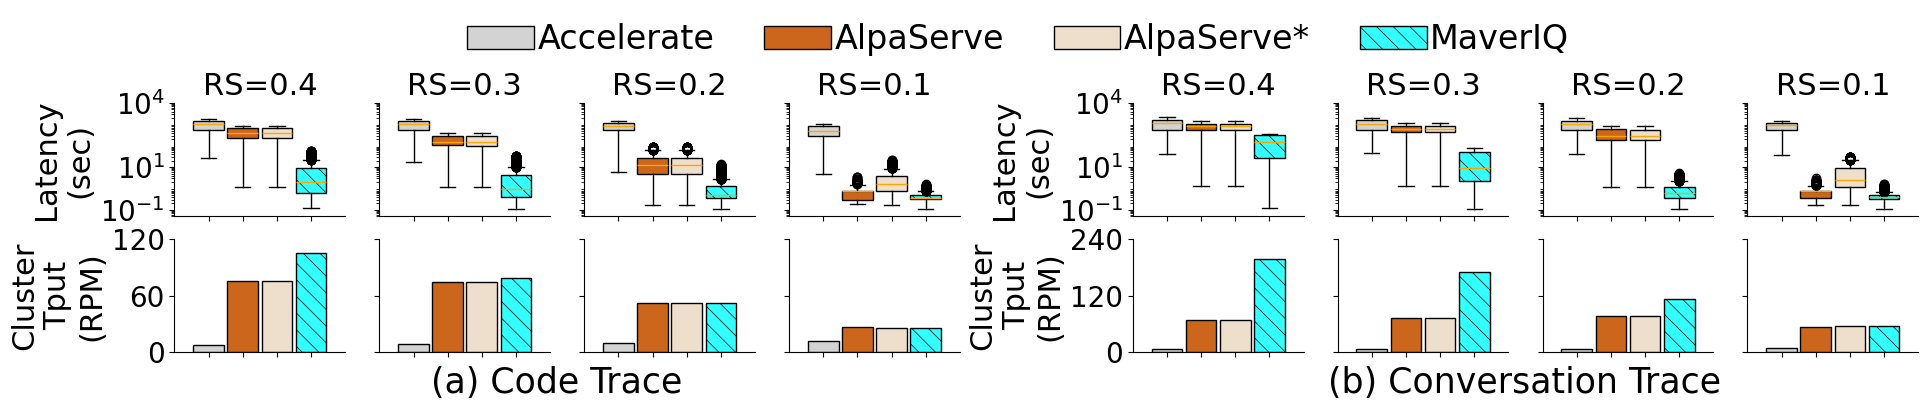

In [54]:
# Create the figure
fig = plt.figure(figsize=(22.5, 5))
gs = gridspec.GridSpec(1, 2, figure=fig)
gs.update(wspace=0.22)
# gs.update(wspace=0.15, hspace=0.4) # Adjust the spacing between the subfigures using wspace and hspace

gs1 = gridspec.GridSpecFromSubplotSpec(3, 4, subplot_spec=gs[0, 0])  # Nested grid in the first main subplot
gs2 = gridspec.GridSpecFromSubplotSpec(3, 4, subplot_spec=gs[0, 1])  # Nested grid in the second main subplot


# figure configs
fontsize = 20
colorpal = {'MaverIQ': '#33FFFF', 'AlpaServe*': '#EEDFCC', 'AlpaServe': '#CD661D', 'Accelerate': 'LightGray'}


# Latency Per Request BoxPlot
data_metrics = plotting_data(plotting_data_large['large_code_0.4'], 'latency')
ax00 = metrics_per_request_single_boxplot(fig=fig, gs=gs1, row=0, col=0, data_metrics=data_metrics, colorpal=colorpal, fontsize=fontsize, title='RS=0.4')

data_metrics = plotting_data(plotting_data_large['large_code_0.3'], 'latency')
ax01 = metrics_per_request_single_boxplot(fig=fig, gs=gs1, row=0, col=1, data_metrics=data_metrics, colorpal=colorpal, fontsize=fontsize, title='RS=0.3')

data_metrics = plotting_data(plotting_data_large['large_code_0.2'], 'latency')
ax02 = metrics_per_request_single_boxplot(fig=fig, gs=gs1, row=0, col=2, data_metrics=data_metrics, colorpal=colorpal, fontsize=fontsize, title='RS=0.2')

data_metrics = plotting_data(plotting_data_large['large_code_0.1'], 'latency')
ax03 = metrics_per_request_single_boxplot(fig=fig, gs=gs1, row=0, col=3, data_metrics=data_metrics, colorpal=colorpal, fontsize=fontsize, title='RS=0.1')

data_metrics = plotting_data(plotting_data_large['large_conversation_0.4'], 'latency')
ax04 = metrics_per_request_single_boxplot(fig=fig, gs=gs2, row=0, col=0, data_metrics=data_metrics, colorpal=colorpal, fontsize=fontsize, title='RS=0.4')

data_metrics = plotting_data(plotting_data_large['large_conversation_0.3'], 'latency')
ax05 = metrics_per_request_single_boxplot(fig=fig, gs=gs2, row=0, col=1, data_metrics=data_metrics, colorpal=colorpal, fontsize=fontsize, title='RS=0.3')

data_metrics = plotting_data(plotting_data_large['large_conversation_0.2'], 'latency')
ax06 = metrics_per_request_single_boxplot(fig=fig, gs=gs2, row=0, col=2, data_metrics=data_metrics, colorpal=colorpal, fontsize=fontsize, title='RS=0.2')

data_metrics = plotting_data(plotting_data_large['large_conversation_0.1'], 'latency')
ax07 = metrics_per_request_single_boxplot(fig=fig, gs=gs2, row=0, col=3, data_metrics=data_metrics, colorpal=colorpal, fontsize=fontsize, title='RS=0.1')


# Cluster
ax10 = tput_single(fig=fig, gs=gs1, row=1, col=0, data_tput=plotting_data(plotting_data_large['large_code_0.4'], 'tput'), colorpal=colorpal, fontsize=fontsize, ylim=120)
ax11 = tput_single(fig=fig, gs=gs1, row=1, col=1, data_tput=plotting_data(plotting_data_large['large_code_0.3'], 'tput',), colorpal=colorpal, fontsize=fontsize, ylim=120)
ax12 = tput_single(fig=fig, gs=gs1, row=1, col=2, data_tput=plotting_data(plotting_data_large['large_code_0.2'], 'tput',), colorpal=colorpal, fontsize=fontsize, ylim=120)
ax13 = tput_single(fig=fig, gs=gs1, row=1, col=3, data_tput=plotting_data(plotting_data_large['large_code_0.1'], 'tput',), colorpal=colorpal, fontsize=fontsize, ylim=120)

ax14 = tput_single(fig=fig, gs=gs2, row=1, col=0, data_tput=plotting_data(plotting_data_large['large_conversation_0.4'], 'tput'), colorpal=colorpal, fontsize=fontsize, ylim=240)
ax15 = tput_single(fig=fig, gs=gs2, row=1, col=1, data_tput=plotting_data(plotting_data_large['large_conversation_0.3'], 'tput'), colorpal=colorpal, fontsize=fontsize, ylim=240)
ax16 = tput_single(fig=fig, gs=gs2, row=1, col=2, data_tput=plotting_data(plotting_data_large['large_conversation_0.2'], 'tput'), colorpal=colorpal, fontsize=fontsize, ylim=240)
ax17 = tput_single(fig=fig, gs=gs2, row=1, col=3, data_tput=plotting_data(plotting_data_large['large_conversation_0.1'], 'tput'), colorpal=colorpal, fontsize=fontsize, ylim=240)


for ax in [ax00, ax01, ax02, ax03, ax04, ax05, ax06, ax07, ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17]:
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)


# Add legend
custom_handles = [
    Patch(facecolor=colorpal['Accelerate'], edgecolor='black', label='Accelerate'),
    Patch(facecolor=colorpal['AlpaServe'], edgecolor='black', label='AlpaServe'),
    Patch(facecolor=colorpal['AlpaServe*'], edgecolor='black', label='AlpaServe*'),
    Patch(facecolor=colorpal['MaverIQ'], edgecolor='black', label='MaverIQ', hatch = '\\\\')
]
fig.legend(handles=custom_handles, bbox_to_anchor=(0.5, 1.1), loc='upper center', ncol=4, fontsize=fontsize+4, title_fontsize=fontsize, frameon=False, labelspacing=0.5, handletextpad=0.1, columnspacing=1.5)

# Align y-axis titles
# fig.align_ylabels([ax00, ax10])
# fig.align_ylabels([ax05, ax14])

# Add titles for for traces
fig.text(0.295, 0.3, '(a) Code Trace', ha='center', fontsize=fontsize+5)
fig.text(0.725, 0.3, '(b) Conversation Trace', ha='center', fontsize=fontsize+5)

# Adjust layout
plt.tight_layout()

# Save figure to pdf
plt.savefig(f'E2E_NO_SLO_latency_S1.pdf', bbox_inches='tight')

# Show the plot
plt.show()

#### Analysis

In [55]:
# 8.1.1 --> MODEL_SET=LARGE, TRACE=CODE, RS=0.4, METRIC=LATENCY


def per_req_metrics_analysis(baseline, metric, model_set='large', trace_type='code', rate_scale='0.1'):
  data_metrics = plotting_data(plotting_data_large[f'{model_set}_{trace_type}_{rate_scale}'], metric)
  if metric == 'latency':
    res = 100 * (np.median(data_metrics[baseline]) - np.median(data_metrics['MaverIQ'])) / np.median(data_metrics[baseline])
  if metric == 'tput':
    res = 100 * (data_metrics['MaverIQ'] - data_metrics[baseline]) / data_metrics['MaverIQ']
  return res


print('Latency-->')
for baseline in ['AlpaServe', 'AlpaServe*', 'Accelerate']:
  res = per_req_metrics_analysis(baseline=baseline, metric='latency', model_set='large', trace_type='code', rate_scale='0.4')
  print(f'{baseline} vs MaverIQ --> {res:.2f} %')
print('\n')

print('Cluster Tput-->')
for baseline in ['AlpaServe', 'AlpaServe*', 'Accelerate']:
  res = per_req_metrics_analysis(baseline=baseline, metric='tput', model_set='large', trace_type='code', rate_scale='0.4')
  print(f'{baseline} vs MaverIQ --> {res:.2f} %')
print('\n')

Latency-->
AlpaServe vs MaverIQ --> 99.49 %
AlpaServe* vs MaverIQ --> 99.49 %
Accelerate vs MaverIQ --> 99.81 %


Cluster Tput-->
AlpaServe vs MaverIQ --> 28.67 %
AlpaServe* vs MaverIQ --> 28.71 %
Accelerate vs MaverIQ --> 92.52 %




In [56]:
# 8.1.1 --> MODEL_SET=LARGE, TRACE=CODE, RS=0.4, METRIC=LATENCY


def per_req_metrics_analysis(baseline, metric, model_set='large', trace_type='code', rate_scale='0.1'):
  data_metrics = plotting_data(plotting_data_large[f'{model_set}_{trace_type}_{rate_scale}'], metric)
  if metric == 'latency':
    res = 100 * (np.median(data_metrics[baseline]) - np.median(data_metrics['MaverIQ'])) / np.median(data_metrics[baseline])
  if metric == 'tput':
    res = 100 * (data_metrics['MaverIQ'] - data_metrics[baseline]) / data_metrics['MaverIQ']
  return res


print('Latency w/ Code-->')
res_list = []
for baseline in ['AlpaServe', 'AlpaServe*','Accelerate']:
  for rate_scale in ['0.1', '0.2', '0.3', '0.4']:
    res = per_req_metrics_analysis(baseline=baseline, metric='latency', model_set='large', trace_type='code', rate_scale=rate_scale)
    print(f'{rate_scale} w/ {baseline} vs MaverIQ --> {res:.2f} %')
    res_list.append(res)
print(f'Latency Range across all RS: {min(res_list):.2f} % - {max(res_list):.2f} %\n')


print('Latency w/ Conversation-->')
res_list = []
for baseline in ['AlpaServe', 'AlpaServe*','Accelerate']:
  for rate_scale in ['0.1', '0.2', '0.3', '0.4']:
    res = per_req_metrics_analysis(baseline=baseline, metric='latency', model_set='large', trace_type='conversation', rate_scale=rate_scale)
    print(f'{rate_scale} w/ {baseline} vs MaverIQ --> {res:.2f} %')
    res_list.append(res)
print(f'Latency Range across all RS: {min(res_list):.2f} % - {max(res_list):.2f} %\n')

print('Cluster Tput w/ Conversation-->')
res_list = []
for baseline in ['AlpaServe', 'AlpaServe*','Accelerate']:
  for rate_scale in ['0.1', '0.2', '0.3', '0.4']:
    res = per_req_metrics_analysis(baseline=baseline, metric='tput', model_set='large', trace_type='conversation', rate_scale=rate_scale)
    print(f'{rate_scale} w/ {baseline} vs MaverIQ --> {res:.2f} %')
    res_list.append(res)
print(f'Tput Range across all RS: {min(res_list):.2f} % - {max(res_list):.2f} %\n')

Latency w/ Code-->
0.1 w/ AlpaServe vs MaverIQ --> 48.93 %
0.2 w/ AlpaServe vs MaverIQ --> 96.12 %
0.3 w/ AlpaServe vs MaverIQ --> 99.38 %
0.4 w/ AlpaServe vs MaverIQ --> 99.49 %
0.1 w/ AlpaServe* vs MaverIQ --> 75.53 %
0.2 w/ AlpaServe* vs MaverIQ --> 96.13 %
0.3 w/ AlpaServe* vs MaverIQ --> 99.37 %
0.4 w/ AlpaServe* vs MaverIQ --> 99.49 %
0.1 w/ Accelerate vs MaverIQ --> 99.92 %
0.2 w/ Accelerate vs MaverIQ --> 99.94 %
0.3 w/ Accelerate vs MaverIQ --> 99.91 %
0.4 w/ Accelerate vs MaverIQ --> 99.81 %
Latency Range across all RS: 48.93 % - 99.94 %

Latency w/ Conversation-->
0.1 w/ AlpaServe vs MaverIQ --> 48.69 %
0.2 w/ AlpaServe vs MaverIQ --> 99.79 %
0.3 w/ AlpaServe vs MaverIQ --> 98.55 %
0.4 w/ AlpaServe vs MaverIQ --> 82.60 %
0.1 w/ AlpaServe* vs MaverIQ --> 85.18 %
0.2 w/ AlpaServe* vs MaverIQ --> 99.79 %
0.3 w/ AlpaServe* vs MaverIQ --> 98.55 %
0.4 w/ AlpaServe* vs MaverIQ --> 82.57 %
0.1 w/ Accelerate vs MaverIQ --> 99.96 %
0.2 w/ Accelerate vs MaverIQ --> 99.94 %
0.3 w/ Accel

In [57]:
# 8.1.1 --> MODEL_SET=LARGE, TRACE=CODE, RS=0.4, METRIC=LATENCY

# Falcon-40b --> lat MaverIQ (TP=4,PP=1) @ [Large, Code, 0.4]
df_falcon_40b_2_MaverIQ = pd.read_csv('./evaluation/e2e_results/large/MaverIQ/MaverIQ_large_hybrid_0.7_0.4_min_lat_code_0_2_output_records.csv',usecols=['client_id','req_id','req_time','complete_time'])
df_falcon_40b_4_MaverIQ = pd.read_csv('./evaluation/e2e_results/large/MaverIQ/MaverIQ_large_hybrid_0.7_0.4_min_lat_code_0_4_output_records.csv',usecols=['client_id','req_id','req_time','complete_time'])
combined_df_MaverIQ = pd.concat([df_falcon_40b_2_MaverIQ, df_falcon_40b_4_MaverIQ])
lat_falcon_40b_MaverIQ = np.mean(combined_df_MaverIQ['complete_time'])
# Falcon-40b --> lat AlpaServe @ [Large, Code, 0.4]
df_falcon_40b_2_AS = pd.read_csv('./evaluation/e2e_results/large/AlpaServe/AlpaServe_large_None_0_0.4_None_code_5.0_2_output_records.csv',usecols=['client_id','req_id','req_time','complete_time'])
df_falcon_40b_4_AS = pd.read_csv('./evaluation/e2e_results/large/AlpaServe/AlpaServe_large_None_0_0.4_None_code_5.0_4_output_records.csv',usecols=['client_id','req_id','req_time','complete_time'])
combined_df_AS = pd.concat([df_falcon_40b_2_AS, df_falcon_40b_4_AS])
lat_falcon_40b_AS = np.mean(combined_df_AS['complete_time'])
# Falcon-40b --> lat AlpaServe* @ [Large, Code, 0.4]
df_falcon_40b_2_ASMOD = pd.read_csv('./evaluation/e2e_results/large/AlpaServe*/AlpaServe*_large_None_0_0.4_None_code_5.0_2_output_records.csv',usecols=['client_id','req_id','req_time','complete_time'])
df_falcon_40b_4_ASMOD = pd.read_csv('./evaluation/e2e_results/large/AlpaServe*/AlpaServe*_large_None_0_0.4_None_code_5.0_4_output_records.csv',usecols=['client_id','req_id','req_time','complete_time'])
combined_df_ASMOD = pd.concat([df_falcon_40b_2_ASMOD, df_falcon_40b_4_ASMOD])
lat_falcon_40b_ASMOD = np.mean(combined_df_ASMOD['complete_time'])
print(f'Falcon-40b (AlpaServe/MaverIQ) @ [Large, Code, 0.4]: {(lat_falcon_40b_AS/lat_falcon_40b_MaverIQ):.2f} x')
print(f'Falcon-40b (AlpaServe*/MaverIQ) @ [Large, Code, 0.4]: {(lat_falcon_40b_ASMOD/lat_falcon_40b_MaverIQ):.2f} x')
print('\n')


# Llama-7b --> lat MaverIQ (TP=2,PP=4) @ [Large, Code, 0.4]
df_llama_7b_MaverIQ = pd.read_csv('./evaluation/e2e_results/large/MaverIQ/MaverIQ_large_hybrid_0.7_0.4_min_lat_code_0_3_output_records.csv',usecols=['client_id','req_id','req_time','complete_time'])
lat_llama_7b_MaverIQ = np.mean(df_llama_7b_MaverIQ['complete_time'])
# Llama-7b --> lat Accelerate (Balanced) @ [Large, Code, 0.4]
path_lat = f"./evaluation/e2e_results/large/Accelerate/output_HF_balanced_16bit_code_0.4_large.log"
full_serving_latencies = []
req_serving_latencies = []
with open(path_lat, 'r') as f:
    lines = f.readlines()
for log_line in lines:
  if ('INFO' in log_line) and ('Model-ID: 3, Full_Latency:' in log_line):
    full_serving_latencies.append(float(re.search(r"Full_Latency: ([\d\.]+)", log_line).group(1)))
    req_serving_latencies.append(float(re.search(r"Request_Latency: ([\d\.]+)", log_line).group(1)))
lat_llama_7b_Accelerate = np.mean(req_serving_latencies)

print(f'Llama-2-7b (Accelerate/MaverIQ) @ [Large, Code, 0.4]: {100*(lat_llama_7b_Accelerate-lat_llama_7b_MaverIQ)/lat_llama_7b_Accelerate} %')


# Falcon-40B --> lat MaverIQ (TP=4,PP=1) @ [Large, Code, 0.4]
df_falcon_40b_MaverIQ_2 = pd.read_csv('./evaluation/e2e_results/large/MaverIQ/MaverIQ_large_hybrid_0.7_0.4_min_lat_code_0_2_output_records.csv',usecols=['client_id','req_id','req_time','complete_time'])
df_falcon_40b_MaverIQ_4 = pd.read_csv('./evaluation/e2e_results/large/MaverIQ/MaverIQ_large_hybrid_0.7_0.4_min_lat_code_0_4_output_records.csv',usecols=['client_id','req_id','req_time','complete_time'])
combined_df_MaverIQ = pd.concat([df_falcon_40b_MaverIQ_2, df_falcon_40b_MaverIQ_4])
lat_falcon_40b_MaverIQ = np.mean(combined_df_MaverIQ['complete_time'])
# Llama-7b --> lat Accelerate (Balanced) @ [Large, Code, 0.4]
path_lat = f"./evaluation/e2e_results/large/Accelerate/output_HF_balanced_16bit_code_0.4_large.log"
full_serving_latencies = []
req_serving_latencies = []
with open(path_lat, 'r') as f:
    lines = f.readlines()
for log_line in lines:
  if ('INFO' in log_line) and (('Model-ID: 2, Full_Latency:' in log_line) or ('Model-ID: 4, Full_Latency:' in log_line)):
    full_serving_latencies.append(float(re.search(r"Full_Latency: ([\d\.]+)", log_line).group(1)))
    req_serving_latencies.append(float(re.search(r"Request_Latency: ([\d\.]+)", log_line).group(1)))
lat_falcon_40b_Accelerate = np.mean(req_serving_latencies)

print(f'Falcon_40B (Accelerate/MaverIQ) @ [Large, Code, 0.4]: {lat_falcon_40b_Accelerate/lat_falcon_40b_MaverIQ:.2f} x')

Falcon-40b (AlpaServe/MaverIQ) @ [Large, Code, 0.4]: 2.26 x
Falcon-40b (AlpaServe*/MaverIQ) @ [Large, Code, 0.4]: 2.26 x


Llama-2-7b (Accelerate/MaverIQ) @ [Large, Code, 0.4]: 76.45479676119085 %
Falcon_40B (Accelerate/MaverIQ) @ [Large, Code, 0.4]: 11.54 x


In [58]:
# 8.1.2 --> MODEL_SET=LARGE, TRACE=CODE, RS=[0.4, 0.3, 0.2, 0.1], METRIC=LATENCY

print('Latency-->')
res_list = []
for baseline in ['AlpaServe', 'AlpaServe*', 'Accelerate']:
  for rate_scale in ['0.4', '0.3', '0.2', '0.1']:
    res = per_req_metrics_analysis(baseline=baseline, metric='latency', model_set='large', trace_type='code', rate_scale=rate_scale )
    res_list.append(res)
    print(f'{rate_scale} w/ {baseline} vs MaverIQ --> {res:.2f} %')
  print('\n')

# Tput
data_metrics = plotting_data(plotting_data_large[f'large_code_0.1'], 'tput')
res = 100 * (data_metrics['AlpaServe'] - data_metrics['MaverIQ']) / data_metrics['AlpaServe']
print(f'Tput (MaverIQ/AlpaServe) --> {res:.2f} %')

Latency-->
0.4 w/ AlpaServe vs MaverIQ --> 99.49 %
0.3 w/ AlpaServe vs MaverIQ --> 99.38 %
0.2 w/ AlpaServe vs MaverIQ --> 96.12 %
0.1 w/ AlpaServe vs MaverIQ --> 48.93 %


0.4 w/ AlpaServe* vs MaverIQ --> 99.49 %
0.3 w/ AlpaServe* vs MaverIQ --> 99.37 %
0.2 w/ AlpaServe* vs MaverIQ --> 96.13 %
0.1 w/ AlpaServe* vs MaverIQ --> 75.53 %


0.4 w/ Accelerate vs MaverIQ --> 99.81 %
0.3 w/ Accelerate vs MaverIQ --> 99.91 %
0.2 w/ Accelerate vs MaverIQ --> 99.94 %
0.1 w/ Accelerate vs MaverIQ --> 99.92 %


Tput (MaverIQ/AlpaServe) --> 3.30 %


In [59]:
# Queueing Delays

# lat MaverIQ (TP=4,PP=1) @ [Large, Code, 0.4]
df_MaverIQ_queue_delay = []
for m_id in [1,2,3,4]:
  df_MaverIQ_queue_delay.append(pd.read_csv(f'./evaluation/e2e_results/large/MaverIQ/MaverIQ_large_hybrid_0.7_0.4_min_lat_code_0_{m_id}_output_records.csv',usecols=['client_id','req_id','req_time','complete_time']))
combined_df_MaverIQ = pd.concat(df_MaverIQ_queue_delay)
q_delay_MaverIQ_individual = [np.mean(df['req_time'] - df['complete_time']) for df in df_MaverIQ_queue_delay]
q_delay_MaverIQ = np.mean(combined_df_MaverIQ['req_time'] - combined_df_MaverIQ['complete_time'])

# AlpaServe (TP=8,PP=1) @ [Large, Code, 0.4]
df_AlpaServe_queue_delay = []
for m_id in [1,2,3,4]:
  df_AlpaServe_queue_delay.append(pd.read_csv(f'./evaluation/e2e_results/large/AlpaServe/AlpaServe_large_None_0_0.4_None_code_5.0_{m_id}_output_records.csv',usecols=['client_id','req_id','req_time','complete_time']))
combined_df_AlpaServe = pd.concat(df_MaverIQ_queue_delay)
q_delay_AlpaServe_individual = [np.mean(df['req_time'] - df['complete_time']) for df in df_AlpaServe_queue_delay]
q_delay_AlpaServe = np.mean(combined_df_AlpaServe['req_time'] - combined_df_AlpaServe['complete_time'])

print(f'Queuing Delays:')
[float(q_i/q_j) for (q_i,q_j) in zip (q_delay_AlpaServe_individual, q_delay_MaverIQ_individual)]

Queuing Delays:


[40.87924732248833, 54.95070571226063, 56.40879137072976, 152.8260126618823]

In [60]:
# Average across everything
def per_req_metrics_analysis(baseline, metric, model_set='large', trace_type='code', rate_scale='0.1'):
  data_metrics = plotting_data(plotting_data_large[f'{model_set}_{trace_type}_{rate_scale}'], metric)
  if metric == 'latency':
    res = 100 * (np.median(data_metrics[baseline]) - np.median(data_metrics['MaverIQ'])) / np.median(data_metrics[baseline])
  if metric == 'tput':
    res = 100 * (data_metrics['MaverIQ'] - data_metrics[baseline]) / data_metrics['MaverIQ']
  return res


print('Latency -->')
res_list = []
for baseline in ['AlpaServe', 'AlpaServe*','Accelerate']:
  for rate_scale in ['0.1', '0.2', '0.3', '0.4']:
    for trace_type in ['code', 'conversation']:
      res = per_req_metrics_analysis(baseline=baseline, metric='latency', model_set='large', trace_type=trace_type, rate_scale=rate_scale)
      res_list.append(res)
print(f'Avergae Latency across all RS & Traces: {np.mean(res_list):.2f} %\n')

print('Cluster Tput -->')
res_list = []
for baseline in ['AlpaServe', 'AlpaServe*','Accelerate']:
  for rate_scale in ['0.1', '0.2', '0.3', '0.4']:
    for trace_type in ['code', 'conversation']:
      res = per_req_metrics_analysis(baseline=baseline, metric='tput', model_set='large', trace_type=trace_type, rate_scale=rate_scale)
      res_list.append(res)
print(f'Avergae Tput Range across all RS & Traces: {np.mean(res_list):.2f} %\n')

Latency -->
Avergae Latency across all RS & Traces: 91.48 %

Cluster Tput -->
Avergae Tput Range across all RS & Traces: 44.67 %



### Latency (Rate=0.4, Trace=Code, Regular Model Set)

In [61]:
# Data Collection

plotting_data_large = {}

for baseline in ['MaverIQ', 'AlpaServe', 'AlpaServe*', 'Accelerate']:
  policy = 'min_lat' if baseline=='MaverIQ' else 'None'

  key = f'regular_code_0.4'
  if key not in plotting_data_large: plotting_data_large[key] = {}

  if baseline == 'Accelerate':
    tput, avg_lat = gather_HF_data('code', '0.4', model_set='regular', latency_only=True)
  else:
    tput, avg_lat = gather_trtllm_data(baseline, policy, 'code', '0.4', 'regular', True)

  plotting_data_large[key][baseline]= {'tput': 60*tput, 'latency': avg_lat}

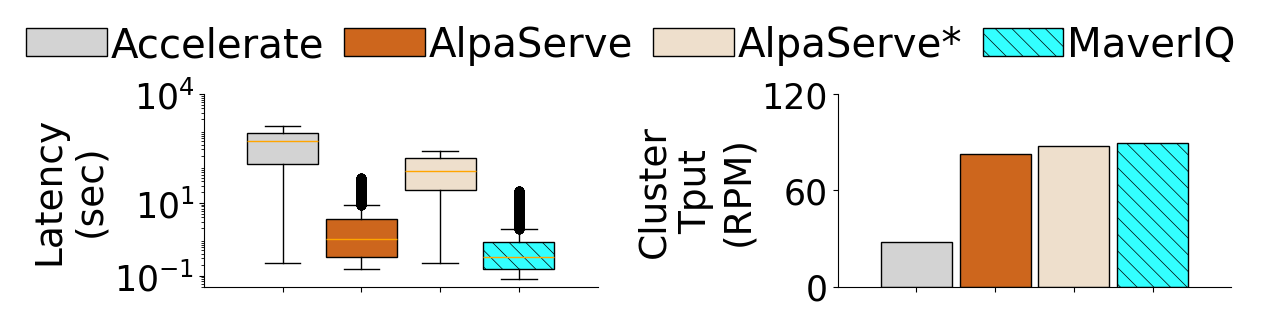

In [62]:
# Create the figure
fig = plt.figure(figsize=(14, 2.5))
gs = gridspec.GridSpec(1, 19, figure=fig)

# figure configs
fontsize = 25
colorpal = {'MaverIQ': '#33FFFF', 'AlpaServe*': '#EEDFCC', 'AlpaServe': '#CD661D', 'Accelerate': 'LightGray'}


# Latency Per Request BoxPlot
data_metrics = plotting_data(plotting_data_large['regular_code_0.4'], 'latency')
ax00 = metrics_per_request_single_boxplot(fig=fig, gs=gs, row=0, col=slice(0,7), data_metrics=data_metrics, colorpal=colorpal, fontsize=fontsize, show_y_label=True)#, use_enter=False)

# Cluster Tput
ax01 = tput_single(fig=fig, gs=gs, row=0, col=slice(11,18), data_tput=plotting_data(plotting_data_large['regular_code_0.4'], 'tput'), colorpal=colorpal, show_y_label=True, fontsize=fontsize, ylim=120)

for ax in [ax00, ax01]:
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

# Add legend
custom_handles = [
    Patch(facecolor=colorpal['Accelerate'], edgecolor='black', label='Accelerate'),
    Patch(facecolor=colorpal['AlpaServe'], edgecolor='black', label='AlpaServe'),
    Patch(facecolor=colorpal['AlpaServe*'], edgecolor='black', label='AlpaServe*'),
    Patch(facecolor=colorpal['MaverIQ'], edgecolor='black', label='MaverIQ', hatch = '\\\\')
]
fig.legend(handles=custom_handles, bbox_to_anchor=(0.43, 1.3), loc='upper center', ncol=4, fontsize=fontsize+4, title_fontsize=fontsize, frameon=False, labelspacing=0.5, handletextpad=0.1, columnspacing=0.5)

# Align y-axis titles
# fig.align_ylabels([ax00, ax10])
# fig.align_ylabels([ax05, ax14])

# Adjust layout
plt.tight_layout()

# Save figure to pdf
plt.savefig(f'E2E_NO_SLO_latency_S2.pdf', bbox_inches='tight')

# Show the plot
plt.show()

#### Analysis

In [63]:
# 8.1.1 --> MODEL_SET=LARGE, TRACE=CODE, RS=0.4, METRIC=LATENCY


def per_req_metrics_analysis(baseline, metric, model_set='large', trace_type='code', rate_scale='0.1'):
  data_metrics = plotting_data(plotting_data_large[f'{model_set}_{trace_type}_{rate_scale}'], metric)
  if metric == 'latency':
    res = 100 * (np.median(data_metrics[baseline]) - np.median(data_metrics['MaverIQ'])) / np.median(data_metrics[baseline])
  if metric == 'tput':
    res = 100 * (data_metrics['MaverIQ'] - data_metrics[baseline]) / data_metrics['MaverIQ']
  return res

def per_req_median(baseline, metric, model_set='large', trace_type='code', rate_scale='0.1'):
  data_metrics = plotting_data(plotting_data_large[f'{model_set}_{trace_type}_{rate_scale}'], metric)
  return np.median(data_metrics[baseline])


print('Latency-->')
for baseline in ['AlpaServe', 'AlpaServe*', 'Accelerate']:
  res = per_req_metrics_analysis(baseline=baseline, metric='latency', model_set='regular', trace_type='code', rate_scale='0.4')
  print(f'{baseline} vs MaverIQ --> {res:.2f} %')
print('\n')

print('Latency (Median)-->')
for baseline in ['MaverIQ', 'AlpaServe', 'AlpaServe*', 'Accelerate']:
  res = per_req_median(baseline=baseline, metric='latency', model_set='regular', trace_type='code', rate_scale='0.4')
  print(f'{baseline}--> {res:.2f} sec')
print('\n')

print('Cluster Tput-->')
tput_list = []
for baseline in ['AlpaServe', 'AlpaServe*', 'Accelerate']:
  res = per_req_metrics_analysis(baseline=baseline, metric='tput', model_set='regular', trace_type='code', rate_scale='0.4')
  tput_list.append(res)
  print(f'{baseline} vs MaverIQ --> {res:.2f} %')
print('\n')
print(f'Avergae tput --> {np.mean(tput_list):.2f} %')

Latency-->
AlpaServe vs MaverIQ --> 67.23 %
AlpaServe* vs MaverIQ --> 99.57 %
Accelerate vs MaverIQ --> 99.93 %


Latency (Median)-->
MaverIQ--> 0.33 sec
AlpaServe--> 1.01 sec
AlpaServe*--> 76.97 sec
Accelerate--> 502.77 sec


Cluster Tput-->
AlpaServe vs MaverIQ --> 7.29 %
AlpaServe* vs MaverIQ --> 1.71 %
Accelerate vs MaverIQ --> 68.98 %


Avergae tput --> 25.99 %


### Other Intents (Rate=0.4, Trace=Code, Large Model Set)

In [64]:
def metrics_per_request_single_boxplot_v1(fig, gs, row, col, data_metrics, colorpal, fontsize, metric='min_lat', title=None, show_y_label=False, ylim_low=5*10**(-2), ylim_max=10**4):
  ax = fig.add_subplot(gs[row, col])
  bp = ax.boxplot([data_metrics[x] for x in ['Accelerate','AlpaServe','AlpaServe*', 'MaverIQ']], positions=[1, 2, 3, 4], widths=0.9, medianprops=dict(color='orange'), patch_artist=True)
  for patch, color in zip(bp['boxes'], [colorpal[x] for x in ['Accelerate','AlpaServe','AlpaServe*', 'MaverIQ']]): patch.set_facecolor(color)
  for i, box in enumerate(bp['boxes']):
    if i == len(bp['boxes']) - 1:  # This is the last box
        box.set_hatch('\\\\')

  # axes settings
  ax.set_yscale('log')
  ax.set_ylim(ylim_low, ylim_max)
  ax.yaxis.set_major_locator(LogLocator(base=10.0))  # Set major ticks at powers of 10
  ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=10))  # Set minor ticks
  ax.set_yticks(find_pow10(ylim_low, ylim_max))
  ax.set_xlim(0, 5)
  ax.set_xticklabels([]) # Remove x-axis labels
  ax.tick_params(axis='both', labelsize = fontsize)

  # title
  if title != None: ax.set_title(f'{title}', fontsize=fontsize+2)
  else: ax.set_ylabel('', fontsize = fontsize)
  # y-axis label
  # if col == 0 or show_y_label==True: ax.set_ylabel('Value', fontsize = fontsize+2)
  # else: ax.set_yticklabels([]) # Remove y-axis labels
  # print(gs,row, ax.get_ylim())

  return ax

In [65]:
# Data Collection

plotting_data_large = {}

for baseline in ['MaverIQ', 'AlpaServe', 'AlpaServe*', 'Accelerate']:
  policy = 'min_lat' if baseline=='MaverIQ' else 'None'
  for trace_type in ['code', 'conversation']:
    for rate_scale in ['0.1', '0.2', '0.3', '0.4']:

      key = f'large_{trace_type}_{rate_scale}'
      if key not in plotting_data_large: plotting_data_large[key] = {}

      if baseline == 'Accelerate':
        tput, avg_cost, avg_lat, avg_mem, avg_gpu_hour = gather_HF_data(trace_type, rate_scale, model_set='large')
      else:
        tput, avg_cost, avg_lat, avg_mem, avg_gpu_hour = gather_trtllm_data(baseline, policy, trace_type, rate_scale, 'large')

      plotting_data_large[key][baseline]= {'tput': 60*tput, 'latency': avg_lat, 'memory':avg_mem, 'cost':avg_cost, 'gpu_cost':avg_gpu_hour}

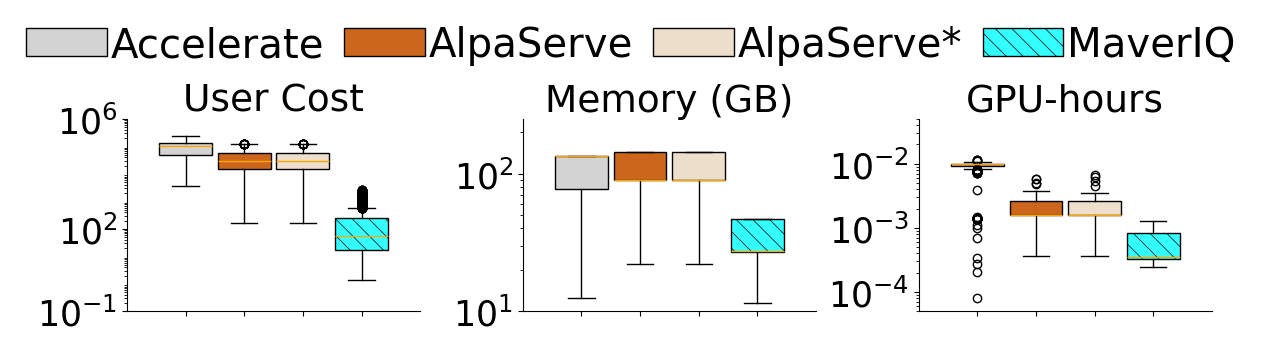

In [66]:
# Create the figure
fig = plt.figure(figsize=(14, 2.5))
gs = gridspec.GridSpec(1, 3, figure=fig)
gs.update(wspace=0.35)
# gs.update(wspace=0.15, hspace=0.4) # Adjust the spacing between the subfigures using wspace and hspace


# figure configs
fontsize = 25
colorpal = {'MaverIQ': '#33FFFF', 'AlpaServe*': '#EEDFCC', 'AlpaServe': '#CD661D', 'Accelerate': 'LightGray'}


# Memory Per Request BoxPlot

data_metrics = plotting_data(plotting_data_large['large_code_0.4'], 'cost')
ax0 = metrics_per_request_single_boxplot_v1(fig=fig, gs=gs, row=0, col=0, data_metrics=data_metrics, colorpal=colorpal, fontsize=fontsize, ylim_low=10**(-1), ylim_max=10**6, title=r'User Cost')# (GB$\times$sec)')

data_metrics = plotting_data(plotting_data_large['large_code_0.4'], 'memory')
ax1 = metrics_per_request_single_boxplot_v1(fig=fig, gs=gs, row=0, col=1, data_metrics=data_metrics, colorpal=colorpal, fontsize=fontsize, ylim_low=10, ylim_max=2.5*10**2, title='Memory (GB)')

data_metrics = plotting_data(plotting_data_large['large_code_0.4'], 'gpu_cost')
ax2 = metrics_per_request_single_boxplot_v1(fig=fig, gs=gs, row=0, col=2, data_metrics=data_metrics, colorpal=colorpal, fontsize=fontsize, ylim_low=5*10**(-5), ylim_max=5*10**(-2),title='GPU-hours')

for ax in [ax0, ax1, ax2]:
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)


# Add legend
custom_handles = [
    Patch(facecolor=colorpal['Accelerate'], edgecolor='black', label='Accelerate'),
    Patch(facecolor=colorpal['AlpaServe'], edgecolor='black', label='AlpaServe'),
    Patch(facecolor=colorpal['AlpaServe*'], edgecolor='black', label='AlpaServe*'),
    Patch(facecolor=colorpal['MaverIQ'], edgecolor='black', label='MaverIQ', hatch = '\\\\')
]
fig.legend(handles=custom_handles, bbox_to_anchor=(0.485, 1.4), loc='upper center', ncol=4, fontsize=fontsize+4, title_fontsize=fontsize, frameon=False, labelspacing=0.5, handletextpad=0.1, columnspacing=0.5)

# Align y-axis titles
# fig.align_ylabels([ax00, ax10])
# fig.align_ylabels([ax05, ax14])

# Adjust layout
plt.tight_layout()

# Save figure to pdf
plt.savefig(f'E2E_NO_SLO_others_S1.pdf', bbox_inches='tight')

# Show the plot
plt.show()

#### Analysis

In [67]:
# 8.2 --> MODEL_SET=LARGE, TRACE=CODE, RS=0.4, METRIC=COST,MEMORY,GPU-HOURS

def per_req_metrics_analysis(baseline, metric, model_set='large', trace_type='code', rate_scale='0.1'):
  data_metrics = plotting_data(plotting_data_large[f'{model_set}_{trace_type}_{rate_scale}'], metric)
  if metric in ['latency', 'memory', 'cost', 'gpu_cost']:
    res = 100 * (np.median(data_metrics[baseline]) - np.median(data_metrics['MaverIQ'])) / np.median(data_metrics[baseline])
  if metric == 'tput':
    res = 100 * (data_metrics['MaverIQ'] - data_metrics[baseline]) / data_metrics['MaverIQ']
  return res


print('Memory-->')
for baseline in ['AlpaServe', 'AlpaServe*','Accelerate']:
  for rate_scale in ['0.1', '0.2', '0.3', '0.4']:
    res = per_req_metrics_analysis(baseline=baseline, metric='memory', model_set='large', trace_type='code', rate_scale=rate_scale)
    print(f'{rate_scale} w/ {baseline} vs MaverIQ --> {res:.2f} %')
  print('\n')

Memory-->
0.1 w/ AlpaServe vs MaverIQ --> 68.32 %
0.2 w/ AlpaServe vs MaverIQ --> 70.36 %
0.3 w/ AlpaServe vs MaverIQ --> 69.85 %
0.4 w/ AlpaServe vs MaverIQ --> 69.84 %


0.1 w/ AlpaServe* vs MaverIQ --> 70.44 %
0.2 w/ AlpaServe* vs MaverIQ --> 70.36 %
0.3 w/ AlpaServe* vs MaverIQ --> 69.85 %
0.4 w/ AlpaServe* vs MaverIQ --> 69.84 %


0.1 w/ Accelerate vs MaverIQ --> 65.60 %
0.2 w/ Accelerate vs MaverIQ --> 65.51 %
0.3 w/ Accelerate vs MaverIQ --> 79.74 %
0.4 w/ Accelerate vs MaverIQ --> 79.73 %




In [68]:
print('Cost-->')
for baseline in ['AlpaServe', 'AlpaServe*', 'Accelerate']:
  for rate_scale in ['0.4']:
    res = per_req_metrics_analysis(baseline=baseline, metric='cost', model_set='large', trace_type='code', rate_scale=rate_scale)
    print(f'{rate_scale} w/ {baseline} vs MaverIQ --> {res:.2f} %')


Cost-->
0.4 w/ AlpaServe vs MaverIQ --> 99.81 %
0.4 w/ AlpaServe* vs MaverIQ --> 99.81 %
0.4 w/ Accelerate vs MaverIQ --> 99.95 %


In [69]:
print('GPU-hrs-->')
for baseline in ['AlpaServe', 'AlpaServe*', 'Accelerate']:
  for rate_scale in ['0.4']:
    res = per_req_metrics_analysis(baseline=baseline, metric='gpu_cost', model_set='large', trace_type='code', rate_scale=rate_scale)
    print(f'{rate_scale} w/ {baseline} vs MaverIQ --> {res:.2f} %')

GPU-hrs-->
0.4 w/ AlpaServe vs MaverIQ --> 77.84 %
0.4 w/ AlpaServe* vs MaverIQ --> 77.85 %
0.4 w/ Accelerate vs MaverIQ --> 96.46 %


In [70]:
# 8.2 --> MODEL_SET=LARGE, TRACE=CODE, RS=0.4, METRIC=COST,MEMORY,GPU-HOURS

# Llama-2 Variants FP16 vs INT4
def get_stats(df, model_name, tp_deg, pp_deg, dtype, int8_kv, output_max_lenght=100):
  mem_stat = df[(df['Model'] == model_name) & (df['TP'] == tp_deg) & (df['PP'] == pp_deg) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Output_Lenght'] == output_max_lenght)]['Memory-After-Run'].iloc[0]
  lat_stat = df[(df['Model'] == model_name) & (df['TP'] == tp_deg) & (df['PP'] == pp_deg) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Output_Lenght'] == output_max_lenght)]['Latency'].iloc[0]
  return mem_stat, lat_stat

df_latency_GT = pd.read_csv('full_model_data_collection.csv')

configs_list_llama = [(1, 1, 'float16', False), (1, 1, 'float16', True), (1, 1, 'int8', False), (1, 1, 'int8', True), (1, 1, 'int4', False), (1, 1, 'int4', True), (1, 1, 'int4_gptq', False), (1, 2, 'float16', False), (1, 2, 'float16', True), (1, 2, 'int8', False), (1, 2, 'int8', True), (1, 2, 'int4', False), (1, 2, 'int4', True), (1, 2, 'int4_gptq', False), (1, 3, 'float16', False), (1, 3, 'float16', True), (1, 3, 'int8', False), (1, 3, 'int8', True), (1, 3, 'int4', False), (1, 3, 'int4', True), (1, 3, 'int4_gptq', False), (1, 4, 'float16', False), (1, 4, 'float16', True), (1, 4, 'int8', False), (1, 4, 'int8', True), (1, 4, 'int4', False), (1, 4, 'int4', True), (1, 4, 'int4_gptq', False), (1, 5, 'float16', False), (1, 5, 'float16', True), (1, 5, 'int8', False), (1, 5, 'int8', True), (1, 5, 'int4', False), (1, 5, 'int4', True), (1, 5, 'int4_gptq', False), (1, 6, 'float16', False), (1, 6, 'float16', True), (1, 6, 'int8', False), (1, 6, 'int8', True), (1, 6, 'int4', False), (1, 6, 'int4', True), (1, 6, 'int4_gptq', False), (1, 7, 'float16', False), (1, 7, 'float16', True), (1, 7, 'int8', False), (1, 7, 'int8', True), (1, 7, 'int4', False), (1, 7, 'int4', True), (1, 7, 'int4_gptq', False), (1, 8, 'float16', False), (1, 8, 'float16', True), (1, 8, 'int8', False), (1, 8, 'int8', True), (1, 8, 'int4', False), (1, 8, 'int4', True), (1, 8, 'int4_gptq', False), (2, 1, 'float16', False), (2, 1, 'float16', True), (2, 1, 'int8', False), (2, 1, 'int8', True), (2, 1, 'int4', False), (2, 1, 'int4', True), (2, 1, 'int4_gptq', False), (2, 2, 'float16', False), (2, 2, 'float16', True), (2, 2, 'int8', False), (2, 2, 'int8', True), (2, 2, 'int4', False), (2, 2, 'int4', True), (2, 2, 'int4_gptq', False), (2, 3, 'float16', False), (2, 3, 'float16', True), (2, 3, 'int8', False), (2, 3, 'int8', True), (2, 3, 'int4', False), (2, 3, 'int4', True), (2, 3, 'int4_gptq', False), (2, 4, 'float16', False), (2, 4, 'float16', True), (2, 4, 'int8', False), (2, 4, 'int8', True), (2, 4, 'int4', False), (2, 4, 'int4', True), (2, 4, 'int4_gptq', False), (4, 1, 'float16', False), (4, 1, 'float16', True), (4, 1, 'int8', False), (4, 1, 'int8', True), (4, 1, 'int4', False), (4, 1, 'int4', True), (4, 1, 'int4_gptq', False), (4, 2, 'float16', False), (4, 2, 'float16', True), (4, 2, 'int8', False), (4, 2, 'int8', True), (4, 2, 'int4', False), (4, 2, 'int4', True), (4, 2, 'int4_gptq', False), (8, 1, 'float16', False), (8, 1, 'float16', True), (8, 1, 'int8', False), (8, 1, 'int8', True), (8, 1, 'int4', False), (8, 1, 'int4', True), (8, 1, 'int4_gptq', False)]
configs_list_llama_7b = [item for item in configs_list_llama if item not in [(4, 1, 'int4_gptq', False), (4, 2, 'int4_gptq', False),(8, 1, 'int8', False), (8, 1, 'int8', True), (8, 1, 'int4', False), (8, 1, 'int4', True), (8, 1, 'int4_gptq', False)]]
configs_list_llama_13b = [item for item in configs_list_llama if item not in [(8, 1, 'int4_gptq', False)]]
configs_list_llama_70b = [item for item in configs_list_llama if item not in [(1, 1, 'float16', False), (1, 1, 'float16', True), (1, 1, 'int8', False), (1, 1, 'int8', True), (1, 2, 'float16', False), (1, 2, 'float16', True), (2, 1, 'float16', False), (2, 1, 'float16', True)]]

config_list = {'llama-2-7b':configs_list_llama_7b, 'llama-2-13b':configs_list_llama_13b, 'llama-2-70b':configs_list_llama_70b}

latencies = {'llama-2-7b':{'float16':{},'int4':{}}, 'llama-2-13b':{'float16':{},'int4':{}}, 'llama-2-70b':{'float16':{},'int4':{}}}

for model in ['llama-2-7b', 'llama-2-13b', 'llama-2-70b']:
  for config in config_list[model]:
    tp_deg, pp_deg, dtype, int8_kv = config
    if dtype in ['float16', 'int4']:
      mem_stat, lat_stat = get_stats(df_latency_GT, model, tp_deg, pp_deg, dtype, int8_kv, 100)
      if lat_stat != 0:
        latencies[model][dtype][f'{tp_deg}_{pp_deg}_{int8_kv}'] = lat_stat

latencies_part = {'llama-2-7b':[], 'llama-2-13b':[], 'llama-2-70b':[]}

for model in ['llama-2-7b', 'llama-2-13b', 'llama-2-70b']:
  for tp_deg in [1, 2, 3, 4, 5, 6, 7, 8]:
    for pp_deg in [1, 2, 3, 4, 5, 6, 7, 8]:
      for int8_kv in [False, True]:
        if f'{tp_deg}_{pp_deg}_{int8_kv}' in latencies[model]['float16'].keys() and f'{tp_deg}_{pp_deg}_{int8_kv}' in latencies[model]['int4'].keys():
          latencies_part[model].append(100*(latencies[model]['float16'][f'{tp_deg}_{pp_deg}_{int8_kv}'] - latencies[model]['int4'][f'{tp_deg}_{pp_deg}_{int8_kv}']) / latencies[model]['float16'][f'{tp_deg}_{pp_deg}_{int8_kv}'])

res = np.mean([np.mean(latencies_part['llama-2-7b']), np.mean(latencies_part['llama-2-13b']), np.mean(latencies_part['llama-2-70b'])])
print(f' Llama-2 Variants Latency (FP16/INT4): {res} %')

 Llama-2 Variants Latency (FP16/INT4): 59.525170909262464 %


In [71]:
def per_req_metrics_analysis(baseline, metric, model_set='large', trace_type='code', rate_scale='0.1'):
  data_metrics = plotting_data(plotting_data_large[f'{model_set}_{trace_type}_{rate_scale}'], metric)
  if metric in ['latency', 'memory', 'cost', 'gpu_cost']:
    res = 100 * (np.median(data_metrics[baseline]) - np.median(data_metrics['MaverIQ'])) / np.median(data_metrics[baseline])
  if metric == 'tput':
    res = 100 * (data_metrics['MaverIQ'] - data_metrics[baseline]) / data_metrics['MaverIQ']
  return res


for mode in ['cost', 'memory', 'gpu_cost']:
  res_list = []
  for baseline in ['AlpaServe', 'AlpaServe*','Accelerate']:
    for rate_scale in ['0.1', '0.2', '0.3', '0.4']:
      res = per_req_metrics_analysis(baseline=baseline, metric=mode, model_set='large', trace_type='code', rate_scale=rate_scale)
      res_list.append(res)
  print(f'\n {mode} across RS--> {np.mean(res_list)} %')


 cost across RS--> 97.70323602526871 %

 memory across RS--> 70.78652734475573 %

 gpu_cost across RS--> 81.65447199541795 %


## SLO Experiment

### Processing Functions

In [72]:
SLOs_default = {'falcon-7b': {'TTFT': 0.12082219123840321, 'TPOT': 0.022863030433654792},
                'falcon-40b': {'TTFT': 0.624104261398315, 'TPOT': 0.12415540218353274},
                'gptj-6b': {'TTFT': 0.09602769215901702, 'TPOT': 0.02005875905354817},
                'llama-2-7b': {'TTFT': 0.1180638472239176, 'TPOT': 0.022632678349812828},
                'llama-2-13b': {'TTFT': 0.20675762494405125, 'TPOT': 0.041599225997924795},
                'llama-2-70b': {'TTFT': 1.0318046410878505, 'TPOT': 0.2043164253234863}}

SLO_large = {'2.5':{'1':12.79533286889394,  '2':7.768030762672424,  '3':1.4267935355504355, '4':7.768030762672424},
             '5.0':{'1':25.59066573778788,  '2':15.536061525344849, '3':2.853587071100871,  '4':15.536061525344849},
             '7.5':{'1':38.385998606681824, '2':23.304092288017273, '3':4.280380606651306,  '4':23.304092288017273},
             '10.0':{'1':25.59066573778788*20,  '2':15.536061525344849*20, '3':2.853587071100871*20,  '4':15.536061525344849*20},
             '15.0':{'1':25.59066573778788*3,  '2':15.536061525344849*3, '3':2.853587071100871*3,  '4':15.536061525344849*3},
             '20.0':{'1':25.59066573778788*4,  '2':15.536061525344849*4, '3':2.853587071100871*4,  '4':15.536061525344849*4}}

SLO_large_Alpa = {'2.5':{'2':7.768030762672424,  '3':1.4267935355504355, '4':1.4267935355504355, '5':7.768030762672424},
                  '5.0':{'2':15.536061525344849, '3':2.853587071100871,  '4':2.853587071100871,  '5':15.536061525344849},
                  '7.5':{'2':23.304092288017273, '3':4.280380606651306,  '4':4.280380606651306,  '5':23.304092288017273},
                  '10.0':{'2':15.536061525344849*2, '3':2.853587071100871*2,  '4':2.853587071100871*2,  '5':15.536061525344849*2},
                  '15.0':{'2':15.536061525344849*3, '3':2.853587071100871*3,  '4':2.853587071100871*3,  '5':15.536061525344849*3},
                  '20.0':{'2':15.536061525344849*4, '3':2.853587071100871*4,  '4':2.853587071100871*4,  '5':15.536061525344849*4}}

In [73]:
def get_trace_data_trtllm(file_path):
  # Initialize a list to store the results
  results = []
  # Open and read the file line by line
  with open(file_path, 'r') as file:
    for line in file:
      # Use regular expression to match the pattern and extract 'Timestamp' and 'Command'
      match = re.match(r'{["\']Timestamp["\']: ([\d\.]+), ["\']Command["\']: ["\'](\d+)\s*inference(.*?)["\']}', line.strip())
      if match:
        timestamp = float(match.group(1))
        command = match.group(2)
        results.append({'Timestamp': timestamp, 'Command': command})
  return results

def gather_trtllm_slo_data(baseline, policy, trace_type, rate_scale, model_set, slo_scale):
  """
    baseline = ['MaverIQ', 'MaverIQ-FP16', 'AlpaServe', 'AlpaServe*']
    policy = [min_lat, min_cost, min_mem, min_gpu_cost] if baseline == 'MaverIQ' | 'MaverIQ-FP16' else ['None']
    trace_type = ['conversation']
    rate_scale = ['0.1', '0.15, '0.2', '0.25', '0.3', '0.4']
    model_set = ['large']
  """

  data_path = f"./evaluation/e2e_results/{model_set}/{baseline}"

  dfs = []

  # slo = sco_scale if ((baseline == 'AlpaServe') or (baseline == 'AlpaServe*') or (baseline == 'MaverIQ')) else '0'
  if ((baseline == 'AlpaServe') or (baseline == 'AlpaServe*') or (baseline == 'MaverIQ')):
    slo = slo_scale if slo_scale in ['2.5', '5.0', '7.5'] else '7.5'
  else:
    slo = '0'

  placement = 'hybrid_0.7' if 'MaverIQ' in baseline else 'None_0'
  placement_cmd = 'hybrid_0.7' if 'MaverIQ' in baseline else 'None'

  if model_set == 'large':
    if (baseline == 'AlpaServe') and (rate_scale in ['0.1', '0.15']):
      model_id_list = [2,3,4,5]
      ref_slo = SLO_large_Alpa[slo_scale]
    else:
      model_id_list = [1,2,3,4]
      ref_slo = SLO_large[slo_scale]

  for model_id in model_id_list:
    dfs.append(pd.read_csv(f"{data_path}/{baseline}_{model_set}_{placement}_{rate_scale}_{policy}_{trace_type}_{slo}_{model_id}_output_records.csv" ,usecols=['client_id','req_id','req_time','complete_time']))
    cmd_trace = get_trace_data_trtllm(file_path=f"{data_path}/trace_{baseline}_{model_set}_{placement_cmd}_{rate_scale}_{policy}_{trace_type}_{slo}.txt")

  # Concatenate all dataframes into one
  combined_df = pd.concat(dfs)

  # Sort the dataframe by 'req_id'
  combined_df_sorted = combined_df.sort_values(by='req_id')
  combined_df_sorted['req_id'] = combined_df_sorted['req_id'].astype(int)

  # Duration for Tput calculation
  combined_df_sorted['e2e'] = combined_df_sorted['req_time']
  t_start = cmd_trace[int(combined_df_sorted['req_id'].iloc[0]-1)]['Timestamp']
  t_finish = cmd_trace[int(combined_df_sorted['req_id'].iloc[-1]-1)]['Timestamp'] + float(combined_df_sorted['e2e'].iloc[-1])

  # Set the converted column as the index
  combined_df_sorted.set_index('req_id', inplace=True)

  # Calculate SLO
  combined_df_sorted['slo'] = combined_df_sorted['client_id'].astype(str).map(lambda x: ref_slo.get(x, 0))
  combined_df_sorted['slo_att'] = np.where(combined_df_sorted['slo'] >= combined_df_sorted['e2e'], 1, 0)

  the_slo = (combined_df_sorted['slo_att'] == 1).sum() / len(combined_df_sorted['slo_att']) #len(cmd_trace)#
  tput = (len(combined_df_sorted['complete_time']) / (t_finish - t_start))


  return float(the_slo), float(tput)

In [74]:
gather_trtllm_slo_data(baseline='AlpaServe', policy='None', trace_type='conversation', rate_scale='0.4', model_set='large', slo_scale='10.0')#*100

(0.21795827123695977, 1.146939886127415)

In [75]:
def gather_HF_slo_data(trace_type, rate_scale, model_set, slo_scale):
  """
    trace_type = ['conversation']
    rate_scale = ['0.1', '0.15', '0.2', '0.25', '0.3', '0.4']
    model_set = ['large']
  """
  # Latency Data
  path_lat = f"./evaluation/e2e_results/{model_set}/Accelerate/output_HF_balanced_16bit_{trace_type}_{rate_scale}_{model_set}.log"

  with open(path_lat, 'r') as f:
    lines = f.readlines()

  num_of_models = 4
  num_of_reqs = int(lines[0].split()[-1]) - num_of_models

  model_ids = []
  full_serving_latencies = []
  req_serving_latencies = []
  total_slo_violations_on_trace = 0
  total_served_requests = 0
  total_deployed_models = 0
  total_deployment_violations = 0
  timestamps_list = []

  # Regular expression to match the timestamp
  timestamp_pattern = r"^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}"

  for log_line in lines:
    if ('INFO' in log_line) and ('Deployed model' in log_line):
      total_deployed_models += 1
    elif ('ERROR' in log_line) and ('An error occurred in deployment' in log_line):
      total_deployment_violations += 1
    elif ('INFO' in log_line) and ('Full_Latency' in log_line):
      match = re.match(timestamp_pattern, log_line)
      if match:
        timestamp_str = match.group(0)
        timestamp = datetime.strptime(timestamp_str, "%Y-%m-%d %H:%M:%S,%f")
        timestamps_list.append(timestamp)
      full_serving_latencies.append(float(re.search(r"Full_Latency: ([\d\.]+)", log_line).group(1)))
      req_serving_latencies.append(float(re.search(r"Request_Latency: ([\d\.]+)", log_line).group(1)))
      model_ids.append(int(re.search(r"Model-ID: ([\d\.]+)", log_line).group(1)))
      total_served_requests += 1
    elif ('ERROR' in log_line) and ('An error occurred in inference' in log_line):
      total_slo_violations_on_trace += 1

  total_slo_violations = num_of_reqs - total_served_requests

  req_ids = list(range(1, len(full_serving_latencies)+1)) #list(range(1, num_of_reqs+1))
  client_ids = model_ids #+ [random.randint(1, 4) for _ in range(total_slo_violations)] #total_slo_violations*[1]
  req_time = full_serving_latencies #+ total_slo_violations*[full_serving_latencies[-1]]#[10000000000000.0]
  comp_time = req_serving_latencies

  # Create DataFrame
  df = pd.DataFrame({'req_id': req_ids, 'client_id': client_ids, 'req_time': req_time, 'comp_time': comp_time})
  # Set the converted column as the index
  df.set_index('req_id', inplace=True)


  # Check for OOM
  if (total_deployment_violations > 0): return 'OOM'

  path_mem = f"./evaluation/e2e_results/{model_set}/Accelerate/output_HF_balanced_16bit_{trace_type}_{model_set}_memory.log"

  with open(path_lat, 'r') as f_mem:
    lines_mem = f_mem.readlines()

  for log_line_mem in lines_mem:
    if ('ERROR' in log_line_mem) and ('An error occurred in deployment' in log_line_mem): return 'OOM'


  # Calculate SLO
  ref_slo = SLO_large[slo_scale]
  df['e2e'] = df['req_time']
  df['slo'] = df['client_id'].astype(str).map(lambda x: ref_slo.get(x, 0))
  df['slo_att'] = np.where(df['slo'] >= df['e2e'], 1, 0)

  the_slo = (df['slo_att'] == 1).sum() / len(df['slo_att']) #num_of_reqs#

  duration = (timestamps_list[-1] - timestamps_list[0]).total_seconds() + float(df['e2e'].iloc[-1])
  tput = (len(df['comp_time']) / duration) #/ gpu_total
  return float(the_slo), float(tput)

In [76]:
gather_HF_slo_data(trace_type='conversation', rate_scale='0.1', model_set='large', slo_scale='10.0')

(0.2332214765100671, 0.15852873251275768)

### SLO-Attainment (Rates=[0.1, 0.15, 0.2, 0.25, 0.3, 0.4], Trace=Conversation, Large Model Set)

In [77]:
# Data Collection

plotting_data_slo = {}

for baseline in ['MaverIQ', 'AlpaServe', 'AlpaServe*', 'Accelerate']:
  policy = 'min_cost' if baseline=='MaverIQ' else 'None'

  for slo_scale in ['2.5', '5.0', '7.5']:
    if slo_scale not in plotting_data_slo: plotting_data_slo[slo_scale] = {}

    slo_res = []
    for rate_scale in ['0.1', '0.15', '0.2', '0.25', '0.3', '0.4']:
      if baseline == 'Accelerate':
        slo_res.append(100*gather_HF_slo_data(trace_type='conversation', rate_scale=rate_scale, model_set='large', slo_scale=slo_scale)[0])
      else:
        slo_res.append(100*gather_trtllm_slo_data(baseline=baseline, policy=policy, trace_type='conversation', rate_scale=rate_scale, model_set='large', slo_scale=slo_scale)[0])

    plotting_data_slo[slo_scale][baseline] = slo_res

In [78]:
plotting_data_slo

{'2.5': {'MaverIQ': [100.0,
   99.79144942648593,
   99.01273057937127,
   96.80497925311204,
   74.74066390041494,
   14.87956487956488],
  'AlpaServe': [99.4475138121547,
   98.23284823284824,
   1.2224108658743633,
   1.2758620689655173,
   1.305114638447972,
   0.7057949479940565],
  'AlpaServe*': [61.0,
   9.69760166840459,
   1.2207527975584944,
   1.271914747335854,
   1.3041945717307015,
   0.7055328629780914],
  'Accelerate': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]},
 '5.0': {'MaverIQ': [100.0,
   100.0,
   100.0,
   99.95850622406638,
   90.95781466113417,
   22.779072779072777],
  'AlpaServe': [100.0,
   99.89189189189189,
   2.0040760869565215,
   1.8275862068965518,
   1.7624250969333801,
   1.751117734724292],
  'AlpaServe*': [84.16100365917407,
   15.328467153284672,
   2.0,
   1.825068870523416,
   1.7605633802816902,
   1.7498138495904692],
  'Accelerate': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]},
 '7.5': {'MaverIQ': [100.0,
   100.0,
   100.0,
   100.0,
   93.93153526970954,
   28.7360

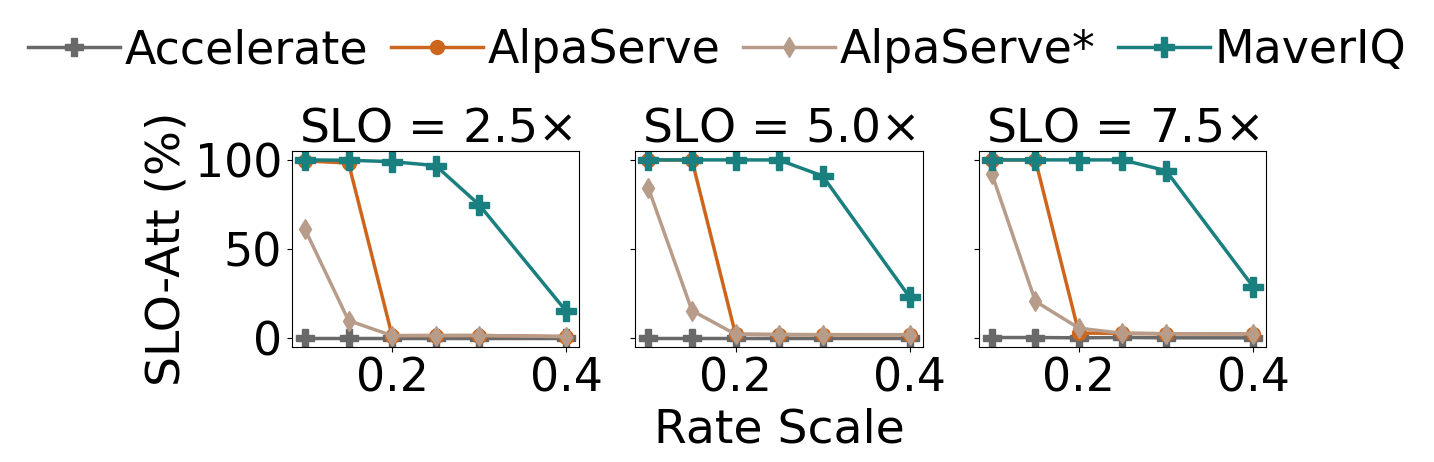

In [79]:
# Create a figure with a 3x1 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# figure configs
fontsize = 32
colorpal = {'MaverIQ': '#1A7F7F', 'AlpaServe*': '#B89C8A', 'AlpaServe': '#CD661D', 'Accelerate': 'DimGray'}
line_styles = {'MaverIQ': ('solid', 'P', 15), 'AlpaServe*': ('solid', 'd', 10), 'AlpaServe':('solid', 'o', 10), 'Accelerate':('solid', 'P', 12.5)}

x = [0.1, 0.15, 0.2, 0.25, 0.3, 0.4]

for i, slo_scale in enumerate(['2.5', '5.0', '7.5']):
  axs[i].plot(x, plotting_data_slo[slo_scale]['Accelerate'], linewidth=2.5, color=colorpal['Accelerate'], linestyle=line_styles['Accelerate'][0], marker=line_styles['Accelerate'][1], markersize =line_styles['Accelerate'][2], label='Accelerate')
  axs[i].plot(x, plotting_data_slo[slo_scale]['AlpaServe'], linewidth=2.5, color=colorpal['AlpaServe'], linestyle=line_styles['AlpaServe'][0], marker=line_styles['AlpaServe'][1], markersize =line_styles['AlpaServe'][2], label='AlpaServe')
  axs[i].plot(x, plotting_data_slo[slo_scale]['AlpaServe*'], linewidth=2.5, color=colorpal['AlpaServe*'], linestyle=line_styles['AlpaServe*'][0], marker=line_styles['AlpaServe*'][1], markersize =line_styles['AlpaServe*'][2], label='AlpaServe*')
  axs[i].plot(x, plotting_data_slo[slo_scale]['MaverIQ'], linewidth=2.5, color=colorpal['MaverIQ'], linestyle=line_styles['MaverIQ'][0], marker=line_styles['MaverIQ'][1], markersize =line_styles['MaverIQ'][2], label='MaverIQ')
  axs[i].set_title(rf'SLO = {slo_scale}$\times$', fontsize=fontsize+2)
  if i==0: axs[i].set_ylabel('SLO-Att (%)', fontsize = fontsize+2)
  axs[i].tick_params(axis='x', labelsize = fontsize+1)
  axs[i].tick_params(axis='y', labelsize = fontsize+1)
  axs[i].set_ylim(-5, 105)
  axs[i].set_yticks([0, 50, 100])
  if i==1: axs[i].set_xlabel('Rate Scale', fontsize = fontsize+2)
  if i!=0: axs[i].set_yticklabels([])


handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.5, 1.23), loc='upper center', ncol=4, fontsize=fontsize+1, title_fontsize=fontsize, frameon=False, labelspacing=0.5, handletextpad=0.1, columnspacing=0.5)

# Adjust layout
plt.tight_layout()

# Save figure to pdf
plt.savefig('E2E_SLO.pdf', bbox_inches='tight')

# Show plot
plt.show()


#### Analysis

In [80]:
res = []
for baseline in ['Accelerate', 'AlpaServe', 'AlpaServe*']:
  for slo_scale in ['2.5', '5.0', '7.5']:
    for i in range(len(plotting_data_slo[slo_scale]['MaverIQ'])):
      if plotting_data_slo[slo_scale][baseline][i] !=0 :
        print(baseline, slo_scale, ':', plotting_data_slo[slo_scale]['MaverIQ'][i]/plotting_data_slo[slo_scale][baseline][i], 'x')
        res.append(plotting_data_slo[slo_scale]['MaverIQ'][i]/plotting_data_slo[slo_scale][baseline][i])

print(f'SLO Improvment: {min(res)} - {max(res)} x')
print(f'Average SLO Improvment (MEAN): {np.mean(res):.2f} x')
print(f'Average SLO Improvment (MEDIAN): {np.median(res):.2f} x')


Accelerate 7.5 : 596.0 x
Accelerate 7.5 : 561.0 x
Accelerate 7.5 : 508.00000000000006 x
AlpaServe 2.5 : 1.0055555555555555 x
AlpaServe 2.5 : 1.0158663952198883 x
AlpaServe 2.5 : 80.9979143211801 x
AlpaServe 2.5 : 75.87417292811483 x
AlpaServe 2.5 : 57.26750869126388 x
AlpaServe 2.5 : 21.08199402936245 x
AlpaServe 5.0 : 1.0 x
AlpaServe 5.0 : 1.001082251082251 x
AlpaServe 5.0 : 49.89830508474577 x
AlpaServe 5.0 : 54.69427699052689 x
AlpaServe 5.0 : 51.60946403872753 x
AlpaServe 5.0 : 13.008304540219433 x
AlpaServe 7.5 : 1.0 x
AlpaServe 7.5 : 1.0 x
AlpaServe 7.5 : 37.769230769230774 x
AlpaServe 7.5 : 39.229729729729726 x
AlpaServe 7.5 : 41.026404404723905 x
AlpaServe 7.5 : 13.072480564005987 x
AlpaServe* 2.5 : 1.639344262295082 x
AlpaServe* 2.5 : 10.29032258064516 x
AlpaServe* 2.5 : 81.10792846626829 x
AlpaServe* 2.5 : 76.10964449927107 x
AlpaServe* 2.5 : 57.30790905012897 x
AlpaServe* 2.5 : 21.089825379299064 x
AlpaServe* 5.0 : 1.1881987577639752 x
AlpaServe* 5.0 : 6.523809523809524 x
Al

In [81]:
# Data Collection

plotting_data_slo_tput = {}

for baseline in ['MaverIQ', 'AlpaServe', 'AlpaServe*', 'Accelerate']:
  policy = 'min_cost' if baseline=='MaverIQ' else 'None'

  for slo_scale in ['2.5', '5.0', '7.5']:
    if slo_scale not in plotting_data_slo_tput: plotting_data_slo_tput[slo_scale] = {}

    slo_res = []
    for rate_scale in ['0.1', '0.15', '0.2', '0.25', '0.3', '0.4']:
      if baseline == 'Accelerate':
        slo_res.append(gather_HF_slo_data(trace_type='conversation', rate_scale=rate_scale, model_set='large', slo_scale=slo_scale)[1])
      else:
        slo_res.append(gather_trtllm_slo_data(baseline=baseline, policy=policy, trace_type='conversation', rate_scale=rate_scale, model_set='large', slo_scale=slo_scale)[1])

    plotting_data_slo_tput[slo_scale][baseline] = slo_res

In [82]:
res = []
for baseline in ['Accelerate', 'AlpaServe', 'AlpaServe*']:
  for slo_scale in ['2.5', '5.0', '7.5']:
    for i in range(len(plotting_data_slo_tput[slo_scale]['MaverIQ'])):
      if plotting_data_slo_tput[slo_scale][baseline][i] !=0 :
        print(baseline, slo_scale, ':', 100*(plotting_data_slo_tput[slo_scale]['MaverIQ'][i]-plotting_data_slo_tput[slo_scale][baseline][i])/plotting_data_slo_tput[slo_scale]['MaverIQ'][i], '%')
        res.append(100*(plotting_data_slo_tput[slo_scale]['MaverIQ'][i]-plotting_data_slo_tput[slo_scale][baseline][i])/plotting_data_slo_tput[slo_scale]['MaverIQ'][i])

print(f'Tput Improvment: {min(res)} - {max(res)} %')
print(f'Average Tput Improvment (MEAN): {np.mean(res):.2f} %')
print(f'Average Tput Improvment (MEDIAN): {np.median(res):.2f} %')

Accelerate 2.5 : 83.12673151775961 %
Accelerate 2.5 : 90.2335123129168 %
Accelerate 2.5 : 93.56044711988038 %
Accelerate 2.5 : 95.03801411025367 %
Accelerate 2.5 : 95.96368959869244 %
Accelerate 2.5 : 96.67537456546097 %
Accelerate 5.0 : 83.12674741073367 %
Accelerate 5.0 : 90.23350948723963 %
Accelerate 5.0 : 93.56045573398875 %
Accelerate 5.0 : 95.03800720659736 %
Accelerate 5.0 : 95.96369358220656 %
Accelerate 5.0 : 96.66959161763421 %
Accelerate 7.5 : 83.12673372862957 %
Accelerate 7.5 : 90.23351810132905 %
Accelerate 7.5 : 93.5606931138375 %
Accelerate 7.5 : 95.03804712705963 %
Accelerate 7.5 : 95.96370153317031 %
Accelerate 7.5 : 96.68041779029164 %
AlpaServe 2.5 : 6.925719502051881 %
AlpaServe 2.5 : 6.529799470795234 %
AlpaServe 2.5 : 33.331446010589 %
AlpaServe 2.5 : 47.50451341154869 %
AlpaServe 2.5 : 57.310531083086794 %
AlpaServe 2.5 : 66.44138007832453 %
AlpaServe 5.0 : 6.926314859734967 %
AlpaServe 5.0 : 16.908072094700188 %
AlpaServe 5.0 : 33.341922141188746 %
AlpaServe 5

## Stress Testing Experiment

### Processing Functions

In [83]:
def get_trace_data_trtllm(file_path):
  # Initialize a list to store the results
  results = []
  # Open and read the file line by line
  with open(file_path, 'r') as file:
    for line in file:
      # Use regular expression to match the pattern and extract 'Timestamp' and 'Command'
      match = re.match(r'{["\']Timestamp["\']: ([\d\.]+), ["\']Command["\']: ["\'](\d+)\s*inference(.*?)["\']}', line.strip())
      if match:
        timestamp = float(match.group(1))
        command = match.group(2)
        results.append({'Timestamp': timestamp, 'Command': command})
  return results



def gather_trtllm_gpu_load(baseline, policy, trace_type='conversation', rate_scale='0.2', model_set='twentyone', drop_model=False):
  """
    baseline = ['MaverIQ', 'MaverIQ-FP16', 'AlpaServe', 'AlpaServe*']
    policy = [min_lat, min_cost, min_mem, min_gpu_cost] if baseline == 'MaverIQ' | 'MaverIQ-FP16' else ['None']
    trace_type = ['conversation']
    rate_scale = ['0.2']
    model_set = ['twentyone']
  """

  data_path = f"./evaluation/gpu_load/{baseline}"

  dfs = []

  slo = '5.0' if ((baseline == 'AlpaServe') or (baseline == 'AlpaServe*')) else '0'
  placement = 'hybrid_0.7' if 'MaverIQ' in baseline else 'None_0'
  placement_cmd = 'hybrid_0.7' if 'MaverIQ' in baseline else 'None'

  if model_set == 'twentyone':
    if (baseline == 'AlpaServe'):
      if (rate_scale == '0.2'): model_id_list = [2,3,4,7,8,9,10,11,12,13,18,19,20,21]
      elif (rate_scale == '0.4'): model_id_list = [2,3,4,5,8,9,10,11,12,13,14,19,20,21,22]
    elif (baseline == 'MaverIQ'):
      if (policy == 'min_lat'):
        if (rate_scale == '0.2') or (rate_scale == '0.4' and drop_model): model_id_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,16,17,18,19]
        elif (rate_scale == '0.4' and not drop_model): model_id_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,16,17,18,19,20]
      elif (policy == 'min_cost'): model_id_list = list(range(1, 21))
      else: model_id_list = list(range(1, 22))

  for model_id in model_id_list:
    dfs.append(pd.read_csv(f"{data_path}/{baseline}_{model_set}_{placement}_{rate_scale}_{policy}_{trace_type}_{slo}_{model_id}_output_records.csv" ,usecols=['client_id','req_id','req_time','complete_time']))
    cmd_trace = get_trace_data_trtllm(file_path=f"{data_path}/trace_{baseline}_{model_set}_{placement_cmd}_{rate_scale}_{policy}_{trace_type}_{slo}.txt")

  # Concatenate all dataframes into one
  combined_df = pd.concat(dfs)

  # Sort the dataframe by 'req_id'
  combined_df_sorted = combined_df.sort_values(by='req_id')
  combined_df_sorted['req_id'] = combined_df_sorted['req_id'].astype(int)

  # Calculate latencies
  combined_df_sorted['e2e'] = combined_df_sorted['req_time']

  # Duration for Tput calculation
  t_start = cmd_trace[int(combined_df_sorted['req_id'].iloc[0]-1)]['Timestamp']
  t_finish = cmd_trace[int(combined_df_sorted['req_id'].iloc[-1]-1)]['Timestamp'] + float(combined_df_sorted['e2e'].iloc[-1])

  # Set the converted column as the index
  combined_df_sorted.set_index('req_id', inplace=True)

  tput = (len(combined_df_sorted['complete_time']) / (t_finish - t_start)) #/ gpu_total

  return 60*tput



def gather_HF_gpu_load(trace_type='conversation', rate_scale='0.2', model_set='twentyone'):
  """
    trace_type = ['conversation']
    rate_scale = ['0.2']
    model_set = ['twentyone']
  """
  # Latency Data
  path_lat = f"./evaluation/gpu_load/Accelerate/output_HF_balanced_16bit_{trace_type}_{rate_scale}_{model_set}.log"

  with open(path_lat, 'r') as f:
    lines = f.readlines()

  num_of_models = 4 if model_set == 'large' else 8
  num_of_reqs = int(lines[0].split()[-1]) - num_of_models

  model_ids = []
  full_serving_latencies = []
  req_serving_latencies = []
  total_slo_violations_on_trace = 0
  total_served_requests = 0
  total_deployed_models = 0
  total_deployment_violations = 0
  timestamps_list = []

  # Regular expression to match the timestamp
  timestamp_pattern = r"^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}"

  for log_line in lines:
    if ('INFO' in log_line) and ('Deployed model' in log_line):
      total_deployed_models += 1
    elif ('ERROR' in log_line) and ('An error occurred in deployment' in log_line):
      total_deployment_violations += 1
    elif ('INFO' in log_line) and ('Full_Latency' in log_line):
      match = re.match(timestamp_pattern, log_line)
      if match:
        timestamp_str = match.group(0)
        timestamp = datetime.strptime(timestamp_str, "%Y-%m-%d %H:%M:%S,%f")
        timestamps_list.append(timestamp)
      full_serving_latencies.append(float(re.search(r"Full_Latency: ([\d\.]+)", log_line).group(1)))
      req_serving_latencies.append(float(re.search(r"Request_Latency: ([\d\.]+)", log_line).group(1)))
      model_ids.append(int(re.search(r"Model-ID: ([\d\.]+)", log_line).group(1)))
      total_served_requests += 1
    elif ('ERROR' in log_line) and ('An error occurred in inference' in log_line):
      total_slo_violations_on_trace += 1

  total_slo_violations = num_of_reqs - total_served_requests

  req_ids = list(range(1, len(full_serving_latencies)+1)) #list(range(1, num_of_reqs+1))
  client_ids = model_ids #+ [random.randint(1, 4) for _ in range(total_slo_violations)] #total_slo_violations*[1]
  req_time = full_serving_latencies #+ total_slo_violations*[full_serving_latencies[-1]]#[10000000000000.0]
  comp_time = req_serving_latencies

  # Create DataFrame
  df = pd.DataFrame({'req_id': req_ids, 'client_id': client_ids, 'req_time': req_time, 'comp_time': comp_time})
  # Set the converted column as the index
  df.set_index('req_id', inplace=True)


  # Check for OOM
  if (total_deployment_violations > 0): return 'OOM'

  path_mem = f"./evaluation/e2e_results/{model_set}/Accelerate/output_HF_balanced_16bit_{trace_type}_{model_set}_memory.log"

  with open(path_lat, 'r') as f_mem:
    lines_mem = f_mem.readlines()

  for log_line_mem in lines_mem:
    if ('ERROR' in log_line_mem) and ('An error occurred in deployment' in log_line_mem): return 'OOM'


  # Calculate latencies
  df['e2e'] = df['req_time']

  duration = (timestamps_list[-1] - timestamps_list[0]).total_seconds() + float(df['e2e'].iloc[-1])
  tput = (len(df['comp_time']) / duration) #/ gpu_total
  return 60*tput

In [84]:
gather_trtllm_gpu_load(baseline='MaverIQ', policy='min_lat', trace_type='conversation', rate_scale='0.4', model_set='twentyone', drop_model=True)

120.94431643876226

In [85]:
gather_HF_gpu_load(trace_type='conversation', rate_scale='0.2', model_set='twentyone')

2.776781600906246

### Visualization

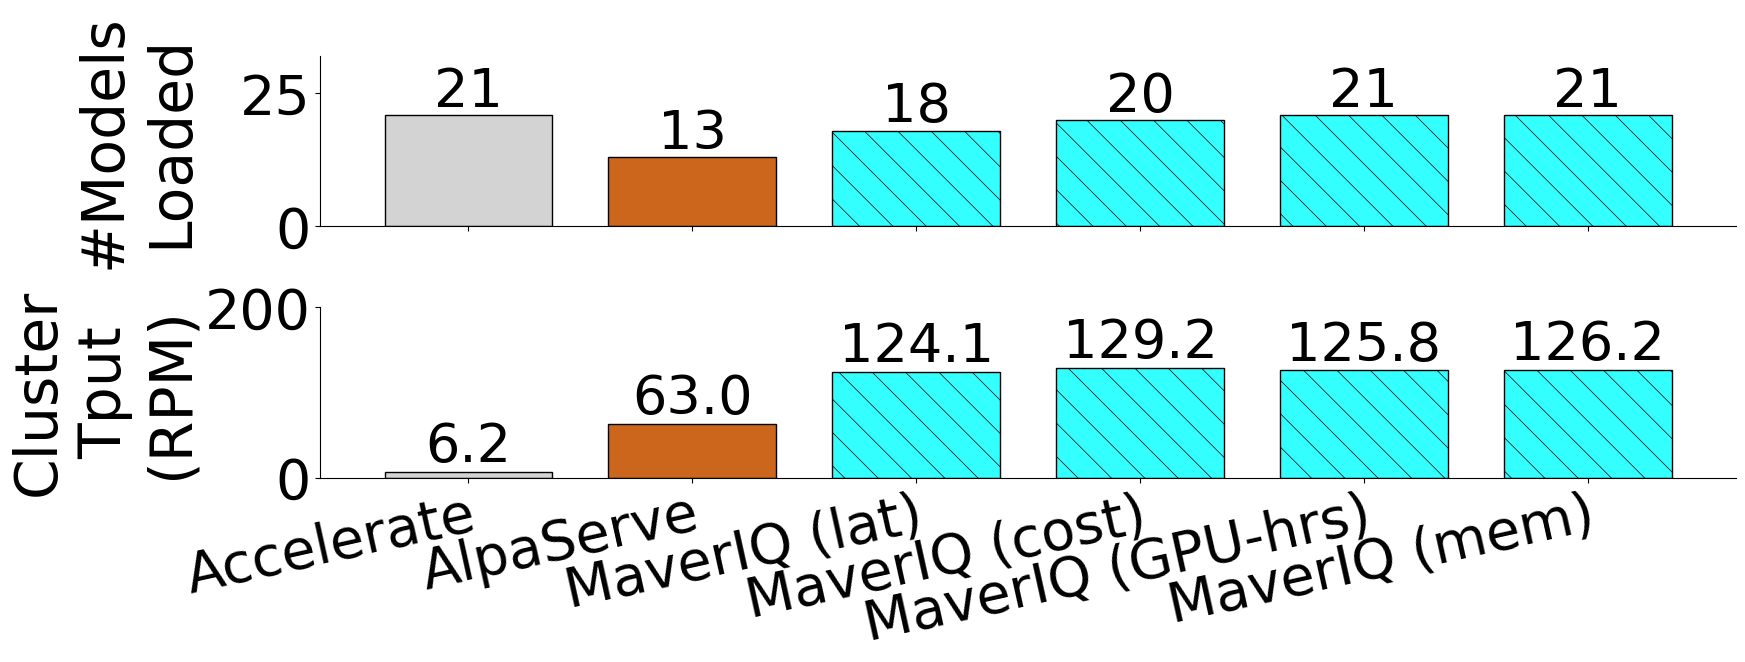

In [86]:
fig, axs = plt.subplots(2, 1, figsize=(17.8, 6.5), sharex=True)

# figure configs
fontsize = 40
colorpal = {'min_cost': '#33FFFF', 'min_lat': '#33FFFF', 'min_mem': '#33FFFF', 'min_gpu_cost': '#33FFFF',
            'MaverIQ': '#33FFFF', 'AlpaServe*': '#EEDFCC', 'AlpaServe': '#CD661D', 'Accelerate': 'LightGray'}

hatches = {'min_cost':'\\', 'min_lat':'\\', 'min_mem':'\\', 'min_gpu_cost':'\\', 'AlpaServe':'', 'Accelerate':''}

bar_width = 0.75

# Models Loaded Fig
num_models_loaded = {'min_cost':20, 'min_lat*':17, 'min_lat':18, 'min_mem':21, 'min_gpu_cost':21, 'AlpaServe':13, 'Accelerate':21}

x = np.array([1, 2, 3, 4, 5, 6])
bars1 = axs[0].bar(x, [num_models_loaded[x] for x in ['Accelerate', 'AlpaServe', 'min_lat', 'min_cost', 'min_gpu_cost', 'min_mem']], width=bar_width,
                   color=[colorpal[k] for k in ['Accelerate', 'AlpaServe', 'min_lat', 'min_cost', 'min_gpu_cost', 'min_mem']],
                   edgecolor='black', hatch=[hatches[k] for k in ['Accelerate', 'AlpaServe', 'min_lat', 'min_cost', 'min_gpu_cost', 'min_mem']])
for bar in bars1:
    yval = bar.get_height()
    # if bar == bars1[1]: axs[0].text(bar.get_x() + bar.get_width()/2, yval - 0.5 , f'{yval-1:.0f}+1', ha='center', va='bottom', fontsize = fontsize-1, rotation=0)
    axs[0].text(bar.get_x() + bar.get_width()/2, yval - 0.5 , f'{yval:.0f}', ha='center', va='bottom', fontsize = fontsize-1, rotation=0)
axs[0].set_ylabel('#Models\nLoaded', fontsize = fontsize+2)
axs[0].set_xticks(x)
# axs[0].set_xticklabels(['Accelerate', 'AlpaServe', 'MaverIQ (l)', 'MaverIQ (c)', 'MaverIQ (g)', 'MaverIQ (m)'], rotation=17.5, ha='right', rotation_mode='anchor')
axs[0].tick_params(axis='both', labelsize = fontsize)
# axs[0].set_xlabel('(a)', fontsize = fontsize+4)
axs[0].set_ylim(0,32)


bars2 = axs[1].bar(x, [gather_HF_gpu_load(rate_scale='0.4')] + [gather_trtllm_gpu_load('AlpaServe','None',rate_scale='0.4')] +
                      [gather_trtllm_gpu_load('MaverIQ',x,rate_scale='0.4') for x in ['min_lat', 'min_cost', 'min_gpu_cost', 'min_mem']],
                   width=bar_width, color=[colorpal[k] for k in ['Accelerate', 'AlpaServe', 'min_lat', 'min_cost', 'min_gpu_cost', 'min_mem']],
                   edgecolor='black', hatch=[hatches[k] for k in ['Accelerate', 'AlpaServe', 'min_lat', 'min_cost', 'min_gpu_cost', 'min_mem']])
for bar in bars2:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval -1, f'{yval:.1f}', ha='center', va='bottom', fontsize = fontsize-1, rotation=0)
axs[1].set_ylabel('Cluster\nTput\n(RPM)', fontsize = fontsize+2)
axs[1].set_xticks(x)
axs[1].set_xticklabels(['Accelerate', 'AlpaServe', 'MaverIQ (lat)', 'MaverIQ (cost)', 'MaverIQ (GPU-hrs)', 'MaverIQ (mem)'], rotation=12.5, ha='right', rotation_mode='anchor')
axs[1].tick_params(axis='both', labelsize = fontsize)
# axs[1].set_xlabel('(b)', fontsize = fontsize+4)
axs[1].set_ylim(0,200)


for ax in axs:
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

# Space hacking
fig.text(0.5, 1.0005, ' ')
# # Add legend
# fig.text(0.5, 1.1, '(l) min lat     (c) min cost     (g) min GPU-hour      (m) min mem', ha='center', fontsize=fontsize+3, rotation=0)

# Align y-axis titles
fig.align_ylabels([axs[0], axs[1]])

# Adjust layout
plt.tight_layout()

# Save figure to pdf
plt.savefig(f'Stress_Testing.pdf', bbox_inches='tight')

plt.show()

## FP-16 Experiment

In [87]:
# Data Collection

plotting_data_large = {}

for baseline in ['MaverIQ', 'AlpaServe', 'AlpaServe*', 'Accelerate']:
  baseline_ext = 'MaverIQ-FP16' if baseline=='MaverIQ' else baseline
  policy = 'min_cost' if baseline_ext=='MaverIQ-FP16' else 'None'
  for trace_type in ['conversation']:
    for rate_scale in ['0.4']:

      key = f'large_{trace_type}_{rate_scale}'
      if key not in plotting_data_large: plotting_data_large[key] = {}

      if baseline == 'Accelerate':
        tput, avg_cost, avg_lat, avg_mem, avg_gpu_hour = gather_HF_data(trace_type, rate_scale, model_set='large')
      else:
        tput, avg_cost, avg_lat, avg_mem, avg_gpu_hour = gather_trtllm_data(baseline_ext, policy, trace_type, rate_scale, 'large')

      plotting_data_large[key][baseline]= {'tput': 60*tput, 'latency': avg_lat, 'memory':avg_mem, 'cost':avg_cost, 'gpu_cost':avg_gpu_hour}

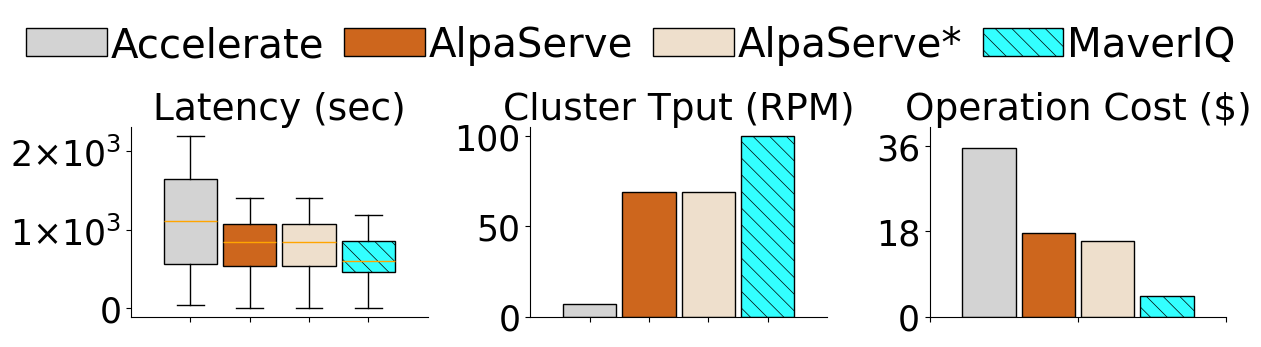

In [88]:
# Create the figure
fig = plt.figure(figsize=(12.7, 3))
gs = gridspec.GridSpec(1, 6, figure=fig)
# gs.update(wspace=0.35)
# gs.update(wspace=0.15, hspace=0.4) # Adjust the spacing between the subfigures using wspace and hspace


# figure configs
fontsize = 25
colorpal = {'MaverIQ': '#33FFFF', 'AlpaServe*': '#EEDFCC', 'AlpaServe': '#CD661D', 'Accelerate': 'LightGray'}

# Latency
data_metrics = plotting_data(plotting_data_large['large_conversation_0.4'], 'latency')
ax = fig.add_subplot(gs[0, 0:2])
bp = ax.boxplot([data_metrics[x] for x in ['Accelerate','AlpaServe','AlpaServe*', 'MaverIQ']], positions=[1, 2, 3, 4], widths=0.9, medianprops=dict(color='orange'), patch_artist=True)
for patch, color in zip(bp['boxes'], [colorpal[x] for x in ['Accelerate','AlpaServe','AlpaServe*', 'MaverIQ']]): patch.set_facecolor(color)
for i, box in enumerate(bp['boxes']):
  if i == len(bp['boxes']) - 1:  # This is the last box
    box.set_hatch('\\\\')
ax.set_yticks([0, 1000, 2000])
ax.set_yticklabels(['0', r'1$\times10^3$', r'2$\times10^3$'])
ax.set_xlim(0, 5)
ax.set_xticklabels([]) # Remove x-axis labels
ax.set_title(r'Latency (sec)', fontsize=fontsize+2)
ax.tick_params(axis='both', labelsize = fontsize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# CLuster Tput
data_metrics = plotting_data(plotting_data_large['large_conversation_0.4'], 'tput')
ax = fig.add_subplot(gs[0, 2:4])
bar_width = 0.9
ax.bar(np.array([1,2,3,4]), [data_metrics[x] for x in ['Accelerate','AlpaServe','AlpaServe*', 'MaverIQ']],
        width=bar_width, color=[colorpal[x] for x in ['Accelerate','AlpaServe','AlpaServe*', 'MaverIQ']], hatch = ['','','','\\\\'], edgecolor='black')
ax.set_yticks([0, 50, 100])
ax.set_xlim(0, 5)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels([]) # Remove x-axis labels
ax.set_title(r'Cluster Tput (RPM)', fontsize=fontsize+2)
ax.tick_params(axis='both', labelsize = fontsize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Operator Cost (i.e, GPU-hours)
data_metrics = plotting_data(plotting_data_large['large_conversation_0.4'], 'gpu_cost')
all_req = len(data_metrics['MaverIQ'])
for baseline in ['AlpaServe', 'AlpaServe*', 'Accelerate']:
  longest_excecution = max(data_metrics[baseline])
  num_req = len(data_metrics[baseline])
  data_metrics[baseline].extend([longest_excecution]*(all_req-num_req))

ax = fig.add_subplot(gs[0, 4:6])
bp = ax.bar(np.array([1,2,3,4]), [0.8*sum(data_metrics[x]) for x in ['Accelerate','AlpaServe','AlpaServe*', 'MaverIQ']],
            width=bar_width, color=[colorpal[x] for x in ['Accelerate','AlpaServe','AlpaServe*', 'MaverIQ']], hatch = ['','','','\\\\'], edgecolor='black')
ax.set_ylim(0, 40)
ax.set_yticks([0, 18, 36])
# ax.set_yticklabels(['0', r'2$\times10^5$', r'4$\times10^5$'])
ax.set_xlim(0, 5)
ax.set_xticklabels([]) # Remove x-axis labels
ax.set_title(r'Operation Cost ($)', fontsize=fontsize+2)
ax.tick_params(axis='both', labelsize = fontsize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add legend
custom_handles = [
    Patch(facecolor=colorpal['Accelerate'], edgecolor='black', label='Accelerate'),
    Patch(facecolor=colorpal['AlpaServe'], edgecolor='black', label='AlpaServe'),
    Patch(facecolor=colorpal['AlpaServe*'], edgecolor='black', label='AlpaServe*'),
    Patch(facecolor=colorpal['MaverIQ'], edgecolor='black', label='MaverIQ', hatch = '\\\\')
]
fig.legend(handles=custom_handles, bbox_to_anchor=(0.51, 1.25), loc='upper center', ncol=4, fontsize=fontsize+4, title_fontsize=fontsize, frameon=False, labelspacing=0.5, handletextpad=0.1, columnspacing=0.5)

# Align y-axis titles
# fig.align_ylabels([ax00, ax10])
# fig.align_ylabels([ax05, ax14])

# Adjust layout
plt.tight_layout()

# Save figure to pdf
plt.savefig(f'Eval-FP16.pdf', bbox_inches='tight')

# Show the plot
plt.show()


#### Analysis

In [89]:
print('Operation Cost -->')
print(['Accelerate','AlpaServe','AlpaServe*', 'MaverIQ'])
data_metrics = plotting_data(plotting_data_large['large_conversation_0.4'], 'gpu_cost')
op_cost = [sum(data_metrics[x]) for x in ['Accelerate','AlpaServe','AlpaServe*', 'MaverIQ']]
print(op_cost, '\n')

for i,baseline in enumerate(['AlpaServe', 'AlpaServe*', 'Accelerate']):
  print(f'{baseline} --> {op_cost[i]/op_cost[-1]}')

Operation Cost -->
['Accelerate', 'AlpaServe', 'AlpaServe*', 'MaverIQ']
[44.50676189422985, 22.139815041754428, 20.081718017789555, 5.334117709795639] 

AlpaServe --> 8.343790728970433
AlpaServe* --> 4.150604888432927
Accelerate --> 3.7647684416321074


In [90]:
def per_req_metrics_analysis(baseline, metric, model_set='large', trace_type='conversation', rate_scale='0.1'):
  data_metrics = plotting_data(plotting_data_large[f'{model_set}_{trace_type}_{rate_scale}'], metric)
  if metric in ['latency', 'memory', 'cost', 'gpu_cost']:
    res = 100 * (np.median(data_metrics[baseline]) - np.median(data_metrics['MaverIQ'])) / np.median(data_metrics[baseline])
  if metric == 'tput':
    res = 100 * (data_metrics['MaverIQ'] - data_metrics[baseline]) / data_metrics['MaverIQ']
  return res


print('Cost-->')
for baseline in ['AlpaServe', 'AlpaServe*', 'Accelerate']:
  for rate_scale in ['0.4']:
    res = per_req_metrics_analysis(baseline=baseline, metric='cost', model_set='large', trace_type='conversation', rate_scale=rate_scale)
    print(f'{rate_scale} w/ {baseline} vs MaverIQ --> {res:.2f} %')

print('\nLatency-->')
for baseline in ['AlpaServe', 'AlpaServe*', 'Accelerate']:
  for rate_scale in ['0.4']:
    res = per_req_metrics_analysis(baseline=baseline, metric='latency', model_set='large', trace_type='conversation', rate_scale=rate_scale)
    print(f'{rate_scale} w/ {baseline} vs MaverIQ --> {res:.2f} %')

print('\nTput-->')
for baseline in ['AlpaServe', 'AlpaServe*', 'Accelerate']:
  for rate_scale in ['0.4']:
    res = per_req_metrics_analysis(baseline=baseline, metric='tput', model_set='large', trace_type='conversation', rate_scale=rate_scale)
    print(f'{rate_scale} w/ {baseline} vs MaverIQ --> {res:.2f} %')

print('\nGPU-hrs-->')
for baseline in ['AlpaServe', 'AlpaServe*', 'Accelerate']:
  for rate_scale in ['0.4']:
    res = per_req_metrics_analysis(baseline=baseline, metric='gpu_cost', model_set='large', trace_type='conversation', rate_scale=rate_scale)
    print(f'{rate_scale} w/ {baseline} vs MaverIQ --> {res:.2f} %')

Cost-->
0.4 w/ AlpaServe vs MaverIQ --> 28.57 %
0.4 w/ AlpaServe* vs MaverIQ --> 28.33 %
0.4 w/ Accelerate vs MaverIQ --> 64.91 %

Latency-->
0.4 w/ AlpaServe vs MaverIQ --> 28.09 %
0.4 w/ AlpaServe* vs MaverIQ --> 27.97 %
0.4 w/ Accelerate vs MaverIQ --> 45.15 %

Tput-->
0.4 w/ AlpaServe vs MaverIQ --> 31.11 %
0.4 w/ AlpaServe* vs MaverIQ --> 31.06 %
0.4 w/ Accelerate vs MaverIQ --> 93.16 %

GPU-hrs-->
0.4 w/ AlpaServe vs MaverIQ --> 56.45 %
0.4 w/ AlpaServe* vs MaverIQ --> 56.46 %
0.4 w/ Accelerate vs MaverIQ --> 90.28 %


## Profiling

In [91]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec
from matplotlib.patches import Patch
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


# Configuration List
configs_list_falcon_7b = [(1, 1, 'float16', False), (1, 1, 'int8', False), (1, 1, 'int4', False), (1, 2, 'float16', False), (1, 2, 'int8', False), (1, 2, 'int4', False), (1, 3, 'float16', False), (1, 3, 'int8', False), (1, 3, 'int4', False), (1, 4, 'float16', False), (1, 4, 'int8', False), (1, 4, 'int4', False), (1, 5, 'float16', False), (1, 5, 'int8', False), (1, 5, 'int4', False), (1, 6, 'float16', False), (1, 6, 'int8', False), (1, 6, 'int4', False), (1, 7, 'float16', False), (1, 7, 'int8', False), (1, 7, 'int4', False), (1, 8, 'float16', False), (1, 8, 'int8', False), (1, 8, 'int4', False)]
configs_list_falcon_40b = [(1, 1, 'int8', False), (1, 1, 'int4', False), (1, 2, 'float16', False), (1, 2, 'int8', False), (1, 2, 'int4', False), (1, 3, 'float16', False), (1, 3, 'int8', False), (1, 3, 'int4', False), (1, 4, 'float16', False), (1, 4, 'int8', False), (1, 4, 'int4', False), (1, 5, 'float16', False), (1, 5, 'int8', False), (1, 5, 'int4', False), (1, 6, 'float16', False), (1, 6, 'int8', False), (1, 6, 'int4', False), (1, 7, 'float16', False), (1, 7, 'int8', False), (1, 7, 'int4', False), (1, 8, 'float16', False), (1, 8, 'int8', False), (1, 8, 'int4', False), (2, 1, 'float16', False), (2, 1, 'int8', False), (2, 1, 'int4', False), (2, 2, 'float16', False), (2, 2, 'int8', False), (2, 2, 'int4', False), (2, 3, 'float16', False), (2, 3, 'int8', False), (2, 3, 'int4', False), (2, 4, 'float16', False), (2, 4, 'int8', False), (2, 4, 'int4', False), (4, 1, 'float16', False), (4, 1, 'int8', False), (4, 1, 'int4', False), (4, 2, 'float16', False), (4, 2, 'int8', False), (4, 2, 'int4', False), (8, 1, 'float16', False), (8, 1, 'int8', False), (8, 1, 'int4', False)]
configs_list_gptj_6b = [(1, 1, 'float16', False), (1, 1, 'int8', False), (1, 1, 'int4', False), (1, 2, 'float16', False), (1, 2, 'int8', False), (1, 2, 'int4', False), (1, 3, 'float16', False), (1, 3, 'int8', False), (1, 3, 'int4', False), (1, 4, 'float16', False), (1, 4, 'int8', False), (1, 4, 'int4', False), (1, 5, 'float16', False), (1, 5, 'int8', False), (1, 5, 'int4', False), (1, 6, 'float16', False), (1, 6, 'int8', False), (1, 6, 'int4', False), (1, 7, 'float16', False), (1, 7, 'int8', False), (1, 7, 'int4', False), (1, 8, 'float16', False), (1, 8, 'int8', False), (1, 8, 'int4', False), (2, 1, 'float16', False), (2, 1, 'int8', False), (2, 1, 'int4', False), (2, 2, 'float16', False), (2, 2, 'int8', False), (2, 2, 'int4', False), (2, 3, 'float16', False), (2, 3, 'int8', False), (2, 3, 'int4', False), (2, 4, 'float16', False), (2, 4, 'int8', False), (2, 4, 'int4', False), (4, 1, 'float16', False), (4, 1, 'int8', False), (4, 1, 'int4', False), (4, 2, 'float16', False), (4, 2, 'int8', False), (4, 2, 'int4', False), (8, 1, 'float16', False), (8, 1, 'int8', False), (8, 1, 'int4', False)]
configs_list_llama = [(1, 1, 'float16', False), (1, 1, 'float16', True), (1, 1, 'int8', False), (1, 1, 'int8', True), (1, 1, 'int4', False), (1, 1, 'int4', True), (1, 1, 'int4_gptq', False), (1, 2, 'float16', False), (1, 2, 'float16', True), (1, 2, 'int8', False), (1, 2, 'int8', True), (1, 2, 'int4', False), (1, 2, 'int4', True), (1, 2, 'int4_gptq', False), (1, 3, 'float16', False), (1, 3, 'float16', True), (1, 3, 'int8', False), (1, 3, 'int8', True), (1, 3, 'int4', False), (1, 3, 'int4', True), (1, 3, 'int4_gptq', False), (1, 4, 'float16', False), (1, 4, 'float16', True), (1, 4, 'int8', False), (1, 4, 'int8', True), (1, 4, 'int4', False), (1, 4, 'int4', True), (1, 4, 'int4_gptq', False), (1, 5, 'float16', False), (1, 5, 'float16', True), (1, 5, 'int8', False), (1, 5, 'int8', True), (1, 5, 'int4', False), (1, 5, 'int4', True), (1, 5, 'int4_gptq', False), (1, 6, 'float16', False), (1, 6, 'float16', True), (1, 6, 'int8', False), (1, 6, 'int8', True), (1, 6, 'int4', False), (1, 6, 'int4', True), (1, 6, 'int4_gptq', False), (1, 7, 'float16', False), (1, 7, 'float16', True), (1, 7, 'int8', False), (1, 7, 'int8', True), (1, 7, 'int4', False), (1, 7, 'int4', True), (1, 7, 'int4_gptq', False), (1, 8, 'float16', False), (1, 8, 'float16', True), (1, 8, 'int8', False), (1, 8, 'int8', True), (1, 8, 'int4', False), (1, 8, 'int4', True), (1, 8, 'int4_gptq', False), (2, 1, 'float16', False), (2, 1, 'float16', True), (2, 1, 'int8', False), (2, 1, 'int8', True), (2, 1, 'int4', False), (2, 1, 'int4', True), (2, 1, 'int4_gptq', False), (2, 2, 'float16', False), (2, 2, 'float16', True), (2, 2, 'int8', False), (2, 2, 'int8', True), (2, 2, 'int4', False), (2, 2, 'int4', True), (2, 2, 'int4_gptq', False), (2, 3, 'float16', False), (2, 3, 'float16', True), (2, 3, 'int8', False), (2, 3, 'int8', True), (2, 3, 'int4', False), (2, 3, 'int4', True), (2, 3, 'int4_gptq', False), (2, 4, 'float16', False), (2, 4, 'float16', True), (2, 4, 'int8', False), (2, 4, 'int8', True), (2, 4, 'int4', False), (2, 4, 'int4', True), (2, 4, 'int4_gptq', False), (4, 1, 'float16', False), (4, 1, 'float16', True), (4, 1, 'int8', False), (4, 1, 'int8', True), (4, 1, 'int4', False), (4, 1, 'int4', True), (4, 1, 'int4_gptq', False), (4, 2, 'float16', False), (4, 2, 'float16', True), (4, 2, 'int8', False), (4, 2, 'int8', True), (4, 2, 'int4', False), (4, 2, 'int4', True), (4, 2, 'int4_gptq', False), (8, 1, 'float16', False), (8, 1, 'float16', True), (8, 1, 'int8', False), (8, 1, 'int8', True), (8, 1, 'int4', False), (8, 1, 'int4', True), (8, 1, 'int4_gptq', False)]


configs_list = {'falcon-7b': configs_list_falcon_7b,
                'falcon-40b': configs_list_falcon_40b,
                'gptj-6b': configs_list_gptj_6b,
                'llama-2-7b': [item for item in configs_list_llama if item not in [(4, 1, 'int4_gptq', False), (4, 2, 'int4_gptq', False),(8, 1, 'int8', False), (8, 1, 'int8', True), (8, 1, 'int4', False), (8, 1, 'int4', True), (8, 1, 'int4_gptq', False)]],
                'llama-2-13b':[item for item in configs_list_llama if item not in [(8, 1, 'int4_gptq', False)]],
                'llama-2-70b':[item for item in configs_list_llama if item not in [(1, 1, 'float16', False), (1, 1, 'float16', True), (1, 1, 'int8', False), (1, 1, 'int8', True), (1, 2, 'float16', False), (1, 2, 'float16', True), (2, 1, 'float16', False), (2, 1, 'float16', True)]]
               }

# Number of full model's layers
max_layer_list = {'falcon-7b':32, 'falcon-40b':60, 'gptj-6b':28, 'llama-2-7b':32, 'llama-2-13b':40, 'llama-2-70b':80}


# Latency Estimation: L1 and L2 constants 40-each e-s=100 [alpha, beta, gamma, delta] (different init for full-model-(delta=1.2) & fingerprints-(delta=0.1))
latency_exponents = {'full-model': {'(float16, False)': [0.9214281439781189, 0.8020966649055481, 1.0621229410171509, 0.2586258053779602],
                                    '(float16, True)': [0.14999999105930328, 0.8499999642372131, 0.4000001847743988, 1.100000023841858],
                                    '(int8, False)': [0.9193627834320068, 0.8374356627464294, 1.0345373153686523, 0.258188396692276],
                                    '(int8, True)': [0.862210750579834, 0.5783026218414307, 1.0257755517959595, 0.24834044277668],
                                    '(int4, False)': [0.1499999761581421, 0.8499999642372131, 0.40000003576278687, 1.1000001430511475],
                                    '(int4, True)': [0.1499999463558197, 0.8499999642372131, 0.40000003576278687, 1.1000001430511475],
                                    '(int4_gptq, False)': [0.14999999105930328, 0.8499999046325684, 0.40000003576278687, 1.100000023841858]},
                     'fingerprint': {'(float16, False)': [0.04908526688814163, 0.6858410239219666, 0.18765105307102203, 0.568636953830719],
                                     '(float16, True)': [0.056719742715358734, 0.476995050907135, 0.6471682786941528, 0.30882391333580017],
                                     '(int8, False)': [0.07340002059936523, 0.6847909092903137, 0.9456496834754944, 0.4982350468635559],
                                     '(int8, True)': [9.999999974752427e-07, 0.38859668374061584, 0.5517905950546265, 0.7020023465156555],
                                     '(int4, False)': [0.15545696020126343, 0.8139811754226685, 0.5062165260314941, 0.32195258140563965],
                                     '(int4, True)': [0.07440026104450226, 0.4380153715610504, 0.8045902252197266, 0.4306272864341736],
                                     '(int4_gptq, False)': [0.05837882682681084, 0.5912114381790161, 0.6822206974029541, 0.4356187880039215]}}


# Profiled Datasets
df_fingerprint = pd.read_csv('./fingerprint_data_collection.csv')
df_fingerprint_BS = pd.read_csv('./fingerprint_data_collection_BS.csv')
df_ground_truth = pd.read_csv('./full_model_data_collection.csv')

### Latency Estimation

In [92]:
''' Function to select balanced/near-balanced PP mapping '''
def pick_pp_map_evenly(X, Y):
    # Base value for each element
    base_value = X // Y

    # Number of elements that need to be incremented by 1
    remainder = X % Y

    # Create the list with base values
    result = [base_value] * Y

    # Distribute the remainder by adding 1 to the first 'remainder' elements
    for i in range(remainder):
        result[i] += 1

    return result


''' Function to transform list of elements to string '''
def list_to_string(number_list):
    return ' '.join(str(elem) for elem in number_list)


''' Function to calculate TTFT & TPOT from the full-model for a specified config '''
def calc_TTFT_TPOT_full_model(lat_o1,lat_o2,o1,o2):
  TPOT = (lat_o2-lat_o1)/(o2-o1)
  TTFT = lat_o1 - o1*TPOT
  return TTFT, TPOT


''' Function to calculate TTFT & TPOT from the fingerprints for a specified config '''
def calc_TTFT_TPOT_fingerprint(lat_n1_o1,lat_n1_o2,lat_n2_o1,lat_n2_o2,n1,n2,o1,o2,num_layers):
  TPOT_layer = ((lat_n2_o2 - lat_n1_o2) - (lat_n2_o1 - lat_n1_o1))/((o2-o1)*(n2-n1))
  TPOT_other = (lat_n1_o2 - lat_n1_o1)/(o2-o1) - n1*TPOT_layer
  TTFT_layer = (lat_n2_o1 - lat_n1_o1)/(n2-n1) - o1*TPOT_layer
  TTFT_other = lat_n1_o1 - n1*TTFT_layer - o1*(n1*TPOT_layer + TPOT_other)
  return num_layers*TTFT_layer+TTFT_other, num_layers*TPOT_layer+TPOT_other


''' Function to calculate Latency for a specified config and output_lenght '''
def get_latency(df_lat, model, tp, pp, dtype, int8_kv, output_lenght, method='fingerprint', model_layer_list=max_layer_list):
  if (method == 'full-model'):
    pp_map = list_to_string(pick_pp_map_evenly(model_layer_list[model], pp))
    latency_10 = df_lat[(df_lat['Model'] == model) & (df_lat['TP'] == tp) & (df_lat['PP'] == pp) & (df_lat['PP_Map'] == pp_map) & (df_lat['DTYPE'] == dtype) & (df_lat['INT8_KV_Cache'] == int8_kv) & (df_lat['Output_Lenght'] == 10)]['Latency'].iloc[0]
    latency_20 = df_lat[(df_lat['Model'] == model) & (df_lat['TP'] == tp) & (df_lat['PP'] == pp) & (df_lat['PP_Map'] == pp_map) & (df_lat['DTYPE'] == dtype) & (df_lat['INT8_KV_Cache'] == int8_kv) & (df_lat['Output_Lenght'] == 20)]['Latency'].iloc[0]
    TTFT, TPOT = calc_TTFT_TPOT_full_model(latency_10, latency_20, 10, 20)
  elif (method == 'fingerprint'):
    pp = 1 # Always default to PP=1
    pp_map = [list_to_string(pick_pp_map_evenly(pp, pp)), list_to_string(pick_pp_map_evenly(pp+1, pp))]
    latency_1lyr_10 = df_lat[(df_lat['Model'] == model) & (df_lat['TP'] == tp) & (df_lat['PP'] == pp) & (df_lat['PP_Map'] == pp_map[0]) & (df_lat['DTYPE'] == dtype) & (df_lat['INT8_KV_Cache'] == int8_kv) & (df_lat['Output_Lenght'] == 10)]['Latency'].iloc[0]
    latency_1lyr_20 = df_lat[(df_lat['Model'] == model) & (df_lat['TP'] == tp) & (df_lat['PP'] == pp) & (df_lat['PP_Map'] == pp_map[0]) & (df_lat['DTYPE'] == dtype) & (df_lat['INT8_KV_Cache'] == int8_kv) & (df_lat['Output_Lenght'] == 20)]['Latency'].iloc[0]
    latency_2lyr_10 = df_lat[(df_lat['Model'] == model) & (df_lat['TP'] == tp) & (df_lat['PP'] == pp) & (df_lat['PP_Map'] == pp_map[1]) & (df_lat['DTYPE'] == dtype) & (df_lat['INT8_KV_Cache'] == int8_kv) & (df_lat['Output_Lenght'] == 10)]['Latency'].iloc[0]
    latency_2lyr_20 = df_lat[(df_lat['Model'] == model) & (df_lat['TP'] == tp) & (df_lat['PP'] == pp) & (df_lat['PP_Map'] == pp_map[1]) & (df_lat['DTYPE'] == dtype) & (df_lat['INT8_KV_Cache'] == int8_kv) & (df_lat['Output_Lenght'] == 20)]['Latency'].iloc[0]
    TTFT, TPOT = calc_TTFT_TPOT_fingerprint(latency_1lyr_10, latency_1lyr_20, latency_2lyr_10, latency_2lyr_20, pp, pp+1, 10, 20, model_layer_list[model])
  return TTFT + output_lenght*TPOT


''' Function to calculate Latency Constants for the equation '''
def get_latency_equation_constants(model, dtype, int8_kv, output_lenght, alpha, beta, gamma, delta, method='fingerprint', df_full_model=df_ground_truth, df_fingerprint=df_fingerprint):
  if (method == 'full-model'):
    if (model == 'falcon-7b'): # L1=L(1,1) | L2=L(1,2) | L3=0
      L1 = get_latency(df_full_model, model, 1, 1, dtype, int8_kv, output_lenght, 'full-model')
      L2 = get_latency(df_full_model, model, 1, 2, dtype, int8_kv, output_lenght, 'full-model')
      Lat_ref = L1 # L(1,1)
      PP_ovrhd = L2 - (Lat_ref / (2 ** alpha))
      TP_ovrhd = 0
    elif ((model == 'falcon-40b') and (dtype == 'float16')) or ((model == 'llama-2-70b') and (dtype == 'int8')): # L1=L(1,2) | L2=L(1,3) | L3=L(2,1)
      L1 = get_latency(df_full_model, model, 1, 2, dtype, int8_kv, output_lenght, 'full-model')
      L2 = get_latency(df_full_model, model, 1, 3, dtype, int8_kv, output_lenght, 'full-model')
      L3 = get_latency(df_full_model, model, 2, 1, dtype, int8_kv, output_lenght, 'full-model')
      Lat_ref = (L2 - ((2 ** delta) * L1)) / (((1/3) ** alpha) - (2 ** (delta - 1))) # L(1,1)
      PP_ovrhd = L1 - (Lat_ref / (2 ** alpha))
      TP_ovrhd = L3 - (Lat_ref / 2)
    elif ((model == 'llama-2-70b') and (dtype == 'float16')): # L1=L(1,3) | L2=L(1,4) | L3=L(2,2)
      L1 = get_latency(df_full_model, model, 1, 3, dtype, int8_kv, output_lenght, 'full-model')
      L2 = get_latency(df_full_model, model, 1, 4, dtype, int8_kv, output_lenght, 'full-model')
      L3 = get_latency(df_full_model, model, 2, 2, dtype, int8_kv, output_lenght, 'full-model')
      Lat_ref = (L2 - (((3/2) ** delta) * L1)) / (((1/4) ** alpha) - ((3 ** (delta -  alpha)) / (2 ** delta))) # L(1,1)
      PP_ovrhd = (L1 - (Lat_ref / (3 ** alpha))) / (2 ** delta)
      TP_ovrhd = (2 ** gamma) * (L3 - (Lat_ref / (2 ** (alpha + 1))) - PP_ovrhd)
    else: # L1=L(1,1) | L2=L(1,2) | L3=L(2,1)
      L1 = get_latency(df_full_model, model, 1, 1, dtype, int8_kv, output_lenght, 'full-model')
      L2 = get_latency(df_full_model, model, 1, 2, dtype, int8_kv, output_lenght, 'full-model')
      L3 = get_latency(df_full_model, model, 2, 1, dtype, int8_kv, output_lenght, 'full-model')
      Lat_ref = L1 # L(1,1)
      PP_ovrhd = L2 - (Lat_ref / (2 ** alpha))
      TP_ovrhd = L3 - (Lat_ref / 2)
  elif (method == 'fingerprint'): # L1=L(1,1) | L2=L(1,2) | L3=L(2,1)
    L1 = get_latency(df_fingerprint, model, 1, 1, dtype, int8_kv, output_lenght, 'fingerprint')
    L2 = get_latency(df_fingerprint, model, 1, 2, dtype, int8_kv, output_lenght, 'fingerprint')
    L3 = get_latency(df_fingerprint, model, 2, 1, dtype, int8_kv, output_lenght, 'fingerprint') if (model != 'falcon-7b') else 0 # L1=L(1,1) | L2=L(1,2) | L3=0
    Lat_ref = L1 # L(1,1)
    PP_ovrhd = L2 - (Lat_ref / (2 ** alpha))
    TP_ovrhd = L3 - (Lat_ref / 2) if (model != 'falcon-7b') else 0
  return Lat_ref, TP_ovrhd, PP_ovrhd


''' Function to estimate Latency using the equation '''
def estimate_latency(TP, PP, alpha, beta, gamma, delta, model, dtype, int8_kv, output_lenght, method='fingerprint'):
  Lat_ref, TP_ovrhd, PP_ovrhd = get_latency_equation_constants(model, dtype, int8_kv, output_lenght, alpha, beta, gamma, delta, method=method)
  # Clamp negative values to 0
  Lat_ref = max(0, Lat_ref)
  TP_ovrhd = max(0, TP_ovrhd)
  PP_ovrhd = max(0, PP_ovrhd)
  # print((Lat_ref / (TP * (PP ** alpha))), ((((TP -1) ** beta) / (PP ** gamma)) * TP_ovrhd), (((PP - 1) ** delta) * PP_ovrhd))
  return (Lat_ref / (TP * (PP ** alpha))) + ((((TP -1) ** beta) / (PP ** gamma)) * TP_ovrhd) + (((PP - 1) ** delta) * PP_ovrhd)


''' Function to get latencies based on the Method selected
    Brute-Force: Brute force approach (all configs)
    MaverIQ: Use fingerprint (3 configs) --> Extrapolate for full model + Equation '''
def latency_exploaration(model, dtype, int8_kv, output_lenght, TP, PP, alpha=0, beta=0, gamma=0, delta=0, method='L2', df_full_model=df_ground_truth, df_fingerprint=df_fingerprint):
  if (method == 'Brute-Force'):
    return df_full_model[(df_full_model['Model'] == model) & (df_full_model['TP'] == TP) & (df_full_model['PP'] == PP) & (df_full_model['DTYPE'] == dtype) & (df_full_model['INT8_KV_Cache'] == int8_kv) & (df_full_model['Output_Lenght'] == output_lenght)]['Latency'].iloc[0]
  elif (method == 'MaverIQ'):
    return estimate_latency(TP, PP, alpha, beta, gamma, delta, model, dtype, int8_kv, output_lenght, method='fingerprint')

''' Function to find latency using Vidur '''
def latency_vidur(model, tp, pp):
  df = pd.read_csv(f'./evaluation/profiling/Vidur/simulator_output/{model}_TP_{tp}_PP_{pp}/request_metrics.csv')
  return df['request_e2e_time'].iloc[0]

In [93]:
APE_latency = {'llama-2-7b': {'Vidur':[], 'MaverIQ':[], 'MaverIQ-FP16':[]},
               'llama-2-70b': {'Vidur':[], 'MaverIQ':[], 'MaverIQ-FP16':[]}}

for model in ['llama-2-7b', 'llama-2-70b']:
  for (tp, pp, dtype, int8_kv) in configs_list[model]:
    alpha_fng, beta_fng, gamma_fng, delta_fng = latency_exponents['fingerprint'][f"({dtype}, {int8_kv})"]
    for output_lenght in [100]:
      lat_ref = latency_exploaration(model, dtype, int8_kv, output_lenght, tp, pp, method='Brute-Force')
      lat_MaverIQ = latency_exploaration(model, dtype, int8_kv, output_lenght, tp, pp, alpha_fng, beta_fng, gamma_fng, delta_fng, method='MaverIQ')
      APE_latency[model]['MaverIQ'].append(100 * np.abs(lat_ref - lat_MaverIQ) / lat_ref)

      if ((dtype == 'float16') and (int8_kv == False)):
        APE_latency[model]['MaverIQ-FP16'].append(100 * np.abs(lat_ref - lat_MaverIQ) / lat_ref)

  config_dir_tp_pp = {'llama-2-70b': [(1,4), (1,5), (1,8), (2,2), (2,4), (4,1), (4,2), (8,1)],
                    'llama-2-7b': [(1,1), (1,2), (1,4), (1,8), (2,1), (2,2), (2,4), (4,1), (4,2), (8,1)]}
  for (tp, pp) in config_dir_tp_pp[model]:
    lat_ref = latency_exploaration(model, 'float16', False, 100, tp, pp, method='Brute-Force')
    lat_vidur = latency_vidur(model, tp, pp)
    APE_latency[model]['Vidur'].append(100 * np.abs(lat_ref - lat_vidur) / lat_ref)
    # APE_latency[model]['Vidur'].append(100 * (lat_ref - lat_vidur) / lat_ref)


APE_latency

{'llama-2-7b': {'Vidur': [np.float64(7.4052322609713155),
   np.float64(5.320638211123869),
   np.float64(4.268810725577204),
   np.float64(4.235711219481299),
   np.float64(15.342849335640242),
   np.float64(18.600521578809293),
   np.float64(19.675140099783157),
   np.float64(3.6604713452338227),
   np.float64(1.0511689235898558),
   np.float64(42.760467932407735)],
  'MaverIQ': [np.float64(2.9148822691039724),
   np.float64(1.4628950893473918),
   np.float64(3.7809916684691682),
   np.float64(8.634495183647575),
   np.float64(20.288488362376395),
   np.float64(5.536574450701271),
   np.float64(1.714319472871006),
   np.float64(0.7849013295083986),
   np.float64(0.6210511034530686),
   np.float64(0.4991898360669611),
   np.float64(5.4323615952173),
   np.float64(26.353948264485336),
   np.float64(11.130434655545361),
   np.float64(2.961567820865334),
   np.float64(0.3320349979231231),
   np.float64(0.1299889743869535),
   np.float64(0.6523893815852506),
   np.float64(3.62502496385354

### Cost

In [94]:
''' Function to get the maximum total meory usage for Vidur profiling for a specific profiling task '''
def calculate_cluster_memory_vidur(csv_data_path):
  # Read the CSV into a DataFrame
  df = pd.read_csv(csv_data_path)

  # Extract the numeric part of 'memory.used [MiB]' (e.g., "10 MiB" -> 10)
  df['memory_used_mib'] = df[' memory.used [MiB]'].str.strip().str.split().str[0].astype(int)

  gpu_0 = np.array(df[df[' pci.bus_id'] == ' 00000000:01:00.0']['memory_used_mib']) #GPU-0
  gpu_1 = np.array(df[df[' pci.bus_id'] == ' 00000000:25:00.0']['memory_used_mib']) #GPU-1
  gpu_2 = np.array(df[df[' pci.bus_id'] == ' 00000000:41:00.0']['memory_used_mib']) #GPU-2
  gpu_3 = np.array(df[df[' pci.bus_id'] == ' 00000000:61:00.0']['memory_used_mib']) #GPU-3
  gpu_4 = np.array(df[df[' pci.bus_id'] == ' 00000000:81:00.0']['memory_used_mib']) #GPU-4
  gpu_5 = np.array(df[df[' pci.bus_id'] == ' 00000000:A1:00.0']['memory_used_mib']) #GPU-5
  gpu_6 = np.array(df[df[' pci.bus_id'] == ' 00000000:C1:00.0']['memory_used_mib']) #GPU-6
  gpu_7 = np.array(df[df[' pci.bus_id'] == ' 00000000:E1:00.0']['memory_used_mib']) #GPU-7

  return max(gpu_0 + gpu_1 + gpu_2 + gpu_3 + gpu_4 + gpu_5 + gpu_6 + gpu_7)/1024 #GBs


''' Function to get the maximum total meory usage for Vidur profiling '''
def calculate_prof_memory_vidur(model):
  if (model == 'llama-2-7b'): model_path = 'Llama-2-7B'
  elif (model == 'llama-2-70b'): model_path = 'Llama-2-70B'

  mem_mlp = calculate_cluster_memory_vidur(f'./evaluation/profiling/Vidur/profiling_outputs/{model_path}/GPU-record-{model}-MLP.csv') # MLP Cost
  mem_attn = calculate_cluster_memory_vidur(f'./evaluation/profiling/Vidur/profiling_outputs/{model_path}/GPU-record-{model}-ATTN.csv') # ATTN Cost
  mem_allred = calculate_cluster_memory_vidur(f'./evaluation/profiling/Vidur/profiling_outputs/a6000/GPU-record-ALL_REDUCE.csv') # ALL-REDUCE Cost
  mem_sendrecv = calculate_cluster_memory_vidur(f'./evaluation/profiling/Vidur/profiling_outputs/a6000/GPU-record-SEND_RECV.csv') # SEND-RECV Cost

  peak_mem = max(mem_mlp, mem_attn, mem_allred, mem_sendrecv) # Peak Memory Usage
  tag_mem = 'COM' if ((peak_mem == mem_allred) or (peak_mem == mem_sendrecv)) else 'LLM' # Tag Memory ('COM' if the peak meory is from the communication-profiling)

  return peak_mem, tag_mem

''' Function to get the profiling time and GPU-hours for Vidur profiling '''
def calculate_prof_metric_vidur(model, metric):
  if (metric == 'memory'):
    return calculate_prof_memory_vidur(model)
  elif (metric == 'time'):
    df_prof_data = pd.read_csv('./evaluation/profiling/Vidur/profiling_outputs/profiling_time.csv')
    time_mlp = df_prof_data[(df_prof_data['Model'] == model) & (df_prof_data['Task'] == 'MLP')]['Time'].iloc[0]
    time_attn = df_prof_data[(df_prof_data['Model'] == model) & (df_prof_data['Task'] == 'ATTN')]['Time'].iloc[0]
    time_allred = df_prof_data[(df_prof_data['Model'] == 'ALL') & (df_prof_data['Task'] == 'ALL_REDUCE')]['Time'].iloc[0]
    time_sendrecv = df_prof_data[(df_prof_data['Model'] == 'ALL') & (df_prof_data['Task'] == 'SEND_RECV')]['Time'].iloc[0]
    return time_mlp+time_attn, time_allred+time_sendrecv
  elif (metric == 'GPU-hours'):
    df_prof_data = pd.read_csv('./evaluation/profiling/Vidur/profiling_outputs/profiling_time.csv')
    df_prof_data['GPU-hours'] = df_prof_data['Time']*df_prof_data['Num-GPUs']/3600
    gputime_mlp = df_prof_data[(df_prof_data['Model'] == model) & (df_prof_data['Task'] == 'MLP')]['GPU-hours'].iloc[0]
    gputime_attn = df_prof_data[(df_prof_data['Model'] == model) & (df_prof_data['Task'] == 'ATTN')]['GPU-hours'].iloc[0]
    gputime_allred = df_prof_data[(df_prof_data['Model'] == 'ALL') & (df_prof_data['Task'] == 'ALL_REDUCE')]['GPU-hours'].iloc[0]
    gputime_sendrecv = df_prof_data[(df_prof_data['Model'] == 'ALL') & (df_prof_data['Task'] == 'SEND_RECV')]['GPU-hours'].iloc[0]
    return gputime_mlp+gputime_attn, gputime_allred+gputime_sendrecv


''' Function to select balanced/near-balanced PP mapping '''
def pick_pp_map_evenly(X, Y):
    # Base value for each element
    base_value = X // Y

    # Number of elements that need to be incremented by 1
    remainder = X % Y

    # Create the list with base values
    result = [base_value] * Y

    # Distribute the remainder by adding 1 to the first 'remainder' elements
    for i in range(remainder):
        result[i] += 1

    return result


''' Function to transform list of elements to string '''
def list_to_string(number_list):
    return ' '.join(str(elem) for elem in number_list)


''' Function to calculate cost for a specified config'''
def get_profiling_data(df, model, tp, pp, dtype, int8_kv, metric, bs=1, method='fingerprint', model_layer_list=max_layer_list):
  if (method == 'full-model'):
    pp_map = list_to_string(pick_pp_map_evenly(model_layer_list[model], pp))
    metric_10 = df[(df['Model'] == model) & (df['TP'] == tp) & (df['PP'] == pp) & (df['PP_Map'] == pp_map) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Output_Lenght'] == 10)][metric].iloc[0]
    metric_20 = df[(df['Model'] == model) & (df['TP'] == tp) & (df['PP'] == pp) & (df['PP_Map'] == pp_map) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Output_Lenght'] == 20)][metric].iloc[0]
    metric_list = [metric_10, metric_20]
  elif (method == 'fingerprint'):
    pp_map = [list_to_string(pick_pp_map_evenly(pp, pp)), list_to_string(pick_pp_map_evenly(pp+1, pp))]
    metric_1lyr_10 = df[(df['Model'] == model) & (df['TP'] == tp) & (df['PP'] == pp) & (df['PP_Map'] == pp_map[0]) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Batch_Size'] == bs) & (df['Output_Lenght'] == 10)][metric].iloc[0]
    metric_1lyr_20 = df[(df['Model'] == model) & (df['TP'] == tp) & (df['PP'] == pp) & (df['PP_Map'] == pp_map[0]) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Batch_Size'] == bs) & (df['Output_Lenght'] == 20)][metric].iloc[0]
    metric_2lyr_10 = df[(df['Model'] == model) & (df['TP'] == tp) & (df['PP'] == pp) & (df['PP_Map'] == pp_map[1]) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Batch_Size'] == bs) & (df['Output_Lenght'] == 10)][metric].iloc[0]
    metric_2lyr_20 = df[(df['Model'] == model) & (df['TP'] == tp) & (df['PP'] == pp) & (df['PP_Map'] == pp_map[1]) & (df['DTYPE'] == dtype) & (df['INT8_KV_Cache'] == int8_kv) & (df['Batch_Size'] == bs) & (df['Output_Lenght'] == 20)][metric].iloc[0]
    metric_list = [metric_1lyr_10, metric_1lyr_20, metric_2lyr_10, metric_2lyr_20]
  return metric_list


''' Function to calculate cost for profiling '''
def get_profiling_cost(model, dtype, int8_kv, metric, bs=1, method='fingerprint', df_full_model=df_ground_truth, df_fingerprint=df_fingerprint_BS):
  if (method == 'full-model'):
    if (model == 'falcon-7b'): # C1=(1,1) | C2=(1,2) | C3=0
      C1 = get_profiling_data(df_full_model, model, 1, 1, dtype, int8_kv, metric, 'full-model')
      C2 = get_profiling_data(df_full_model, model, 1, 2, dtype, int8_kv, metric, 'full-model')
      C3 = [0, 0]
      metric_list = [C1, C2, C3]
    elif ((model == 'falcon-40b') and (dtype == 'float16')) or ((model == 'llama-2-70b') and (dtype == 'int8')): # C1=(1,2) | C2=(1,3) | C3=(2,1)
      C1 = get_profiling_data(df_full_model, model, 1, 2, dtype, int8_kv, metric, 'full-model')
      C2 = get_profiling_data(df_full_model, model, 1, 3, dtype, int8_kv, metric, 'full-model')
      C3 = get_profiling_data(df_full_model, model, 2, 1, dtype, int8_kv, metric, 'full-model')
      metric_list = [C1, C2, C3]
    elif ((model == 'llama-2-70b') and (dtype == 'float16')): # C1=(1,3) | C2=(1,4) | C3=(2,2)
      C1 = get_profiling_data(df_full_model, model, 1, 3, dtype, int8_kv, metric, 'full-model')
      C2 = get_profiling_data(df_full_model, model, 1, 4, dtype, int8_kv, metric, 'full-model')
      C3 = get_profiling_data(df_full_model, model, 2, 2, dtype, int8_kv, metric, 'full-model')
      metric_list = [C1, C2, C3]
    else: # C1=(1,1) | C2=(1,2) | C3=(2,1)
      C1 = get_profiling_data(df_full_model, model, 1, 1, dtype, int8_kv, metric, 'full-model')
      C2 = get_profiling_data(df_full_model, model, 1, 2, dtype, int8_kv, metric, 'full-model')
      C3 = get_profiling_data(df_full_model, model, 2, 1, dtype, int8_kv, metric, 'full-model')
      metric_list = [C1, C2, C3]
  elif (method == 'fingerprint'): # C1=(1,1) | C2=(1,2) | C3=(2,1)
    C1 = get_profiling_data(df_fingerprint, model, 1, 1, dtype, int8_kv, metric, bs, 'fingerprint')
    C2 = get_profiling_data(df_fingerprint, model, 1, 2, dtype, int8_kv, metric, bs, 'fingerprint')
    C3 = get_profiling_data(df_fingerprint, model, 2, 1, dtype, int8_kv, metric, bs, 'fingerprint') if (model != 'falcon-7b') else [0, 0, 0, 0] # C1=(1,1) | C2=(1,2) | C3=0
    metric_list = [C1, C2, C3]
  return metric_list


''' Function to get metrics based on the Method selected
    AlpaServe-full: Brute force approach (all configs)
    AlpaServe: Brute force approach (all FP16 configs)
    Vidur : Vidur's profiling (FP16 configs)
    MaverIQ: Use fingerprint (3 configs) --> Extrapolate for full model + Equation '''
def profiling_cost_exploaration(model, method='MaverIQ', df_full_model=df_ground_truth, df_fingerprint=df_fingerprint_BS):
  prof_mem_list = []
  prof_time_list = []
  prof_gpuhrs_list = []
  if (method == 'AlpaServe-full'):
    for (tp, pp, dtype, int8_kv) in configs_list[model]:
      [mem_10, mem_20] = get_profiling_data(df_full_model, model, tp, pp, dtype, int8_kv, 'Memory-After-Run', method='full-model')
      [time_10, time_20] = get_profiling_data(df_full_model, model, tp, pp, dtype, int8_kv, 'Time-Prof', method='full-model')
      prof_mem_list.extend([mem_10, mem_20])
      prof_time_list.extend([time_10, time_20])
      prof_gpuhrs_list.extend([time_10*tp*pp/3600, time_20*tp*pp/3600])
  elif (method == 'AlpaServe'):
    for (tp, pp, dtype, int8_kv) in [(tp, pp, dtype, int8_kv) for tp, pp, dtype, int8_kv in configs_list[model] if dtype == 'float16' and int8_kv == False]:
      [mem_10, mem_20] = get_profiling_data(df_full_model, model, tp, pp, dtype, int8_kv, 'Memory-After-Run', method='full-model')
      [time_10, time_20] = get_profiling_data(df_full_model, model, tp, pp, dtype, int8_kv, 'Time-Prof', method='full-model')
      prof_mem_list.extend([mem_10, mem_20])
      prof_time_list.extend([time_10, time_20])
      prof_gpuhrs_list.extend([time_10*tp*pp/3600, time_20*tp*pp/3600])
  elif (method == 'Vidur'):
    prof_mem_vidur = calculate_prof_metric_vidur(model, 'memory')
    prof_time_vidur = calculate_prof_metric_vidur(model, 'time')
    prof_gpuhrs_vidur = calculate_prof_metric_vidur(model, 'GPU-hours')
    return prof_mem_vidur, prof_time_vidur, prof_gpuhrs_vidur
  elif (method == 'MaverIQ'):
    for bs in [1, 2]:
      for (dtype, int8_kv) in list(set([(configs_list[model][i][2], configs_list[model][i][3]) for i in range(len(configs_list[model]))])):
        [[mem_1_1l_10, mem_1_1l_20, mem_1_2l_10, mem_1_2l_20], [mem_2_1l_10, mem_2_1l_20, mem_2_2l_10, mem_2_2l_20], [mem_3_1l_10, mem_3_1l_20, mem_3_2l_10, mem_3_2l_20]] = get_profiling_cost(model, dtype, int8_kv, 'Memory-After-Run', bs, method='fingerprint')
        [[time_1_1l_10, time_1_1l_20, time_1_2l_10, time_1_2l_20], [time_2_1l_10, time_2_1l_20, time_2_2l_10, time_2_2l_20], [time_3_1l_10, time_3_1l_20, time_3_2l_10, time_3_2l_20]] = get_profiling_cost(model, dtype, int8_kv, 'Time-Prof', bs, method='fingerprint')
        prof_mem_list.extend([mem_1_1l_10, mem_1_1l_20, mem_1_2l_10, mem_1_2l_20, mem_2_1l_10, mem_2_1l_20, mem_2_2l_10, mem_2_2l_20, mem_3_1l_10, mem_3_1l_20, mem_3_2l_10, mem_3_2l_20])
        prof_time_list.extend([time_1_1l_10, time_1_1l_20, time_1_2l_10, time_1_2l_20, time_2_1l_10, time_2_1l_20, time_2_2l_10, time_2_2l_20, time_3_1l_10, time_3_1l_20, time_3_2l_10, time_3_2l_20])
        prof_gpuhrs_list.extend([time_1_1l_10*1*1/3600, time_1_1l_20*1*1/3600, time_1_2l_10*1*1/3600, time_1_2l_20*1*1/3600, time_2_1l_10*1*2/3600, time_2_1l_20*1*2/3600, time_2_2l_10*1*2/3600, time_2_2l_20*1*2/3600, time_3_1l_10*2*1/3600, time_3_1l_20*2*1/3600, time_3_2l_10*2*1/3600, time_3_2l_20*2*1/3600])
  elif (method == 'MaverIQ-FP16'):
    for bs in [1, 2]:
      for (dtype, int8_kv) in [('float16', False)]:
        [[mem_1_1l_10, mem_1_1l_20, mem_1_2l_10, mem_1_2l_20], [mem_2_1l_10, mem_2_1l_20, mem_2_2l_10, mem_2_2l_20], [mem_3_1l_10, mem_3_1l_20, mem_3_2l_10, mem_3_2l_20]] = get_profiling_cost(model, dtype, int8_kv, 'Memory-After-Run', bs, method='fingerprint')
        [[time_1_1l_10, time_1_1l_20, time_1_2l_10, time_1_2l_20], [time_2_1l_10, time_2_1l_20, time_2_2l_10, time_2_2l_20], [time_3_1l_10, time_3_1l_20, time_3_2l_10, time_3_2l_20]] = get_profiling_cost(model, dtype, int8_kv, 'Time-Prof', bs, method='fingerprint')
        prof_mem_list.extend([mem_1_1l_10, mem_1_1l_20, mem_1_2l_10, mem_1_2l_20, mem_2_1l_10, mem_2_1l_20, mem_2_2l_10, mem_2_2l_20, mem_3_1l_10, mem_3_1l_20, mem_3_2l_10, mem_3_2l_20])
        prof_time_list.extend([time_1_1l_10, time_1_1l_20, time_1_2l_10, time_1_2l_20, time_2_1l_10, time_2_1l_20, time_2_2l_10, time_2_2l_20, time_3_1l_10, time_3_1l_20, time_3_2l_10, time_3_2l_20])
        prof_gpuhrs_list.extend([time_1_1l_10*1*1/3600, time_1_1l_20*1*1/3600, time_1_2l_10*1*1/3600, time_1_2l_20*1*1/3600, time_2_1l_10*1*2/3600, time_2_1l_20*1*2/3600, time_2_2l_10*1*2/3600, time_2_2l_20*1*2/3600, time_3_1l_10*2*1/3600, time_3_1l_20*2*1/3600, time_3_2l_10*2*1/3600, time_3_2l_20*2*1/3600])
  return max(prof_mem_list), sum(prof_time_list), sum(prof_gpuhrs_list)



# profiling_cost_exploaration('llama-2-70b', method='L2-M2')


prof_cost =   {'Prof_Mem':   {'llama-2-7b':  {'AlpaServe-full':None, 'AlpaServe':None, 'Vidur':None, 'MaverIQ':None, 'MaverIQ-FP16':None},
                              'llama-2-70b': {'AlpaServe-full':None, 'AlpaServe':None, 'Vidur':None, 'MaverIQ':None, 'MaverIQ-FP16':None}},
               'Prof_Time':  {'llama-2-7b':  {'AlpaServe-full':None, 'AlpaServe':None, 'Vidur':None, 'MaverIQ':None, 'MaverIQ-FP16':None},
                              'llama-2-70b': {'AlpaServe-full':None, 'AlpaServe':None, 'Vidur':None, 'MaverIQ':None, 'MaverIQ-FP16':None}},
               'Prof_GPUHr': {'llama-2-7b':  {'AlpaServe-full':None, 'AlpaServe':None, 'Vidur':None, 'MaverIQ':None, 'MaverIQ-FP16':None},
                              'llama-2-70b': {'AlpaServe-full':None, 'AlpaServe':None, 'Vidur':None, 'MaverIQ':None, 'MaverIQ-FP16':None}}}


for model in ['llama-2-7b', 'llama-2-70b']:
  for method in ['AlpaServe-full', 'AlpaServe', 'Vidur', 'MaverIQ', 'MaverIQ-FP16']:
    mem, time, gpu_hrs = profiling_cost_exploaration(model, method)
    prof_cost['Prof_Mem'][model][method]= mem
    prof_cost['Prof_Time'][model][method]= time
    prof_cost['Prof_GPUHr'][model][method]= gpu_hrs

prof_cost

{'Prof_Mem': {'llama-2-7b': {'AlpaServe-full': np.float64(35.87890625),
   'AlpaServe': np.float64(35.87890625),
   'Vidur': (np.float64(94.9052734375), 'LLM'),
   'MaverIQ': np.float64(3.332763671875),
   'MaverIQ-FP16': np.float64(3.332763671875)},
  'llama-2-70b': {'AlpaServe-full': np.float64(153.845703125),
   'AlpaServe': np.float64(153.845703125),
   'Vidur': (np.float64(47.40625), 'LLM'),
   'MaverIQ': np.float64(7.8851318359375),
   'MaverIQ-FP16': np.float64(7.7308349609375)}},
 'Prof_Time': {'llama-2-7b': {'AlpaServe-full': np.float64(3952.3773624897003),
   'AlpaServe': np.float64(690.1789088249207),
   'Vidur': (np.float64(416.3950011730194), np.float64(658.6669595241547)),
   'MaverIQ': np.float64(1439.4150929450989),
   'MaverIQ-FP16': np.float64(210.72190380096436)},
  'llama-2-70b': {'AlpaServe-full': np.float64(8399.810898780823),
   'AlpaServe': np.float64(1386.9937992095947),
   'Vidur': (np.float64(428.79190707206726), np.float64(658.6669595241547)),
   'MaverIQ': 

### Visualization

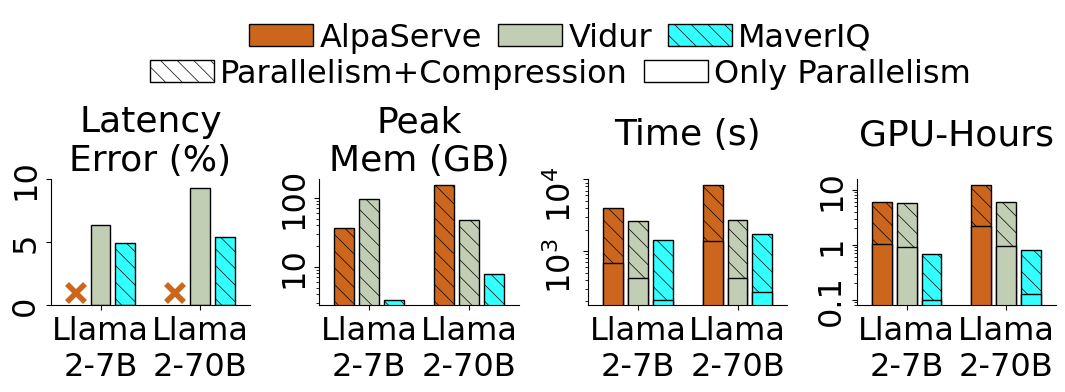

In [95]:
# Create a figure with subplots
fig = plt.figure(figsize=(11, 6))
gs = gridspec.GridSpec(5, 8, figure=fig)

# figure configs
fontsize = 22
bar_width = 0.2#0.225
t_vidur_full = prof_cost['Prof_Time']['llama-2-70b']['MaverIQ']/prof_cost['Prof_Time']['llama-2-70b']['MaverIQ-FP16']

# colorpal = {'MaverIQ': '#33FFFF', 'MaverIQ-FP16':'#1AA0A0', 'AlpaServe': '#CD661D', 'AlpaServe-full': '#E6B28E', 'Vidur': '#32CD32', 'Vidur-full': '#74E974'}
colorpal = {'MaverIQ': '#33FFFF', 'MaverIQ-FP16':'#33FFFF', 'AlpaServe': '#CD661D', 'AlpaServe-full': '#CD661D', 'Vidur': '#C2CEB3', 'Vidur-full': '#C2CEB3'}


hatches = {'MaverIQ': '\\\\', 'MaverIQ-FP16': '', 'AlpaServe': '', 'AlpaServe-full': '\\\\', 'Vidur': '', 'Vidur-full':  '\\\\'}

def foramt_tick(tick):
  tick_val = float(tick)
  if tick_val.is_integer(): return str(int(tick_val))
  else: return str(tick_val)

# Subplot 1: Latency APE
ax1 = fig.add_subplot(gs[0:2, 0:2])
ax1.plot(-0.25, 1, marker='x', markersize=12.5, color=colorpal['AlpaServe'], markeredgewidth=4, zorder=3)
ax1.plot(1-0.25, 1, marker='x', markersize=12.5, color=colorpal['AlpaServe'], markeredgewidth=4, zorder=3)
bars1 = ax1.bar(np.arange(2), [np.median(APE_latency[model]['Vidur']) for model in ['llama-2-7b', 'llama-2-70b']], width=bar_width, color=[colorpal['Vidur']]*2, hatch=[hatches['Vidur']]*2, edgecolor='black', label='Vidur')
bars2 = ax1.bar(np.arange(2)+0.25, [np.median(APE_latency[model]['MaverIQ']) for model in ['llama-2-7b', 'llama-2-70b']], width=bar_width, color=[colorpal['MaverIQ']]*2, hatch=[hatches['MaverIQ']]*2, edgecolor='black', label='MaverIQ')
ax1.set_title('Latency\nError (%)', fontsize = fontsize+4)
ax1.set_ylim(0,10)
ax1.set_yticks([0, 5, 10])
ax1.set_yticklabels(['0', '5', '10'], rotation=90, va='center')
ax1.set_xticks(np.arange(2))
ax1.set_xlim(-0.5, 1.5)
ax1.set_xticklabels(['Llama\n2-7B', 'Llama\n2-70B'], )
ax1.tick_params(axis='both', labelsize = fontsize+1)

# Subplot 2: Peak Profiling Memory Consumption (2 categories, 4 bars each)
ax2 = fig.add_subplot(gs[0:2, 2:4])
bars1 = ax2.bar(np.arange(2)-0.25, [prof_cost['Prof_Mem'][model]['AlpaServe'] for model in ['llama-2-7b','llama-2-70b']], width=bar_width, color=[colorpal['AlpaServe']]*2, hatch=[hatches['AlpaServe-full']]*2, edgecolor='black', label='AlpaServe')
bars2 = ax2.bar(np.arange(2), [prof_cost['Prof_Mem'][model]['Vidur'][0] for model in ['llama-2-7b','llama-2-70b']], width=bar_width, color=[colorpal['Vidur']]*2, hatch=[hatches['Vidur-full']]*2, edgecolor='black', label='Vidur')
bars3 = ax2.bar(np.arange(2)+0.25, [prof_cost['Prof_Mem'][model]['MaverIQ'] for model in ['llama-2-7b','llama-2-70b']], width=bar_width, color=[colorpal['MaverIQ']]*2, hatch=[hatches['MaverIQ']]*2, edgecolor='black', label='MaverIQ')
ax2.set_title('Peak\nMem (GB)', fontsize = fontsize+4)
ax2.set_yscale('log')
ax2.set_yticklabels([foramt_tick(tick) for tick in ax2.get_yticks()], rotation=90, va='center')
ax2.set_xticks(np.arange(2))
ax2.set_xlim(-0.5, 1.5)
ax2.set_xticklabels(['Llama\n2-7B', 'Llama\n2-70B'])
ax2.tick_params(axis='both', labelsize = fontsize+1)

# Subplot 3: Profiling Time (2 categories, 4 bars each)
ax3 = fig.add_subplot(gs[0:2, 4:6])
bars1_all = ax3.bar(np.arange(2)-0.25, [prof_cost['Prof_Time'][model]['AlpaServe-full'] for model in ['llama-2-7b','llama-2-70b']], width=bar_width, color=[colorpal['AlpaServe-full']]*2, hatch=[hatches['AlpaServe-full']]*2, edgecolor='black', label='AlpaServe (full)')#, alpha=0.5)
bars1 = ax3.bar(np.arange(2)-0.25, [prof_cost['Prof_Time'][model]['AlpaServe'] for model in ['llama-2-7b','llama-2-70b']], width=bar_width, color=[colorpal['AlpaServe']]*2, hatch=[hatches['AlpaServe']]*2, edgecolor='black', label='AlpaServe')
bars2_all = ax3.bar(np.arange(2), [prof_cost['Prof_Time'][model]['Vidur'][0]*t_vidur_full for model in ['llama-2-7b','llama-2-70b']], width=bar_width, color=[colorpal['Vidur-full']]*2, hatch=[hatches['Vidur-full']]*2, edgecolor='black', label='Vidur (full)')#, alpha=0.5)
bars2 = ax3.bar(np.arange(2), [prof_cost['Prof_Time'][model]['Vidur'][0] for model in ['llama-2-7b','llama-2-70b']], width=bar_width, color=[colorpal['Vidur']]*2, hatch=[hatches['Vidur']]*2, edgecolor='black', label='Vidur')
bars3_all = ax3.bar(np.arange(2)+0.25, [prof_cost['Prof_Time'][model]['MaverIQ'] for model in ['llama-2-7b','llama-2-70b']], width=bar_width, color=[colorpal['MaverIQ']]*2, hatch=[hatches['MaverIQ']]*2, edgecolor='black', label='MaverIQ')#, alpha=0.5)
bars3 = ax3.bar(np.arange(2)+0.25, [prof_cost['Prof_Time'][model]['MaverIQ-FP16'] for model in ['llama-2-7b','llama-2-70b']], width=bar_width, color=[colorpal['MaverIQ-FP16']]*2, hatch=[hatches['MaverIQ-FP16']]*2, edgecolor='black', label='MaverIQ (NoComp)')
ax3.set_title('Time (s)', fontsize = fontsize+4, pad=25)
ax3.set_yscale('log')
ax3.tick_params(axis='y', labelrotation=90)
ax3.set_xticks(np.arange(2))
ax3.set_xlim(-0.5, 1.5)
ax3.set_xticklabels(['Llama\n2-7B', 'Llama\n2-70B'])
ax3.tick_params(axis='both', labelsize = fontsize+1)

# Subplot 4: Profiling Time (2 categories, 4 bars each)
ax4 = fig.add_subplot(gs[0:2, 6:8])
bars1_all = ax4.bar(np.arange(2)-0.25, [prof_cost['Prof_GPUHr'][model]['AlpaServe-full'] for model in ['llama-2-7b','llama-2-70b']], width=bar_width, color=[colorpal['AlpaServe-full']]*2, hatch=[hatches['AlpaServe-full']]*2, edgecolor='black', label='AlpaServe (full)')#, alpha=0.5)
bars1 = ax4.bar(np.arange(2)-0.25, [prof_cost['Prof_GPUHr'][model]['AlpaServe'] for model in ['llama-2-7b','llama-2-70b']], width=bar_width, color=[colorpal['AlpaServe']]*2, hatch=[hatches['AlpaServe']]*2, edgecolor='black', label='AlpaServe')
bars2_all = ax4.bar(np.arange(2), [prof_cost['Prof_GPUHr'][model]['Vidur'][0]*t_vidur_full for model in ['llama-2-7b','llama-2-70b']], width=bar_width, color=[colorpal['Vidur-full']]*2, hatch=[hatches['Vidur-full']]*2, edgecolor='black', label='Vidur (full)')#, alpha=0.5)
bars2 = ax4.bar(np.arange(2), [prof_cost['Prof_GPUHr'][model]['Vidur'][0] for model in ['llama-2-7b','llama-2-70b']], width=bar_width, color=[colorpal['Vidur']]*2, hatch=[hatches['Vidur']]*2, edgecolor='black', label='Vidur')
bars3_all = ax4.bar(np.arange(2)+0.25, [prof_cost['Prof_GPUHr'][model]['MaverIQ'] for model in ['llama-2-7b','llama-2-70b']], width=bar_width, color=[colorpal['MaverIQ']]*2, hatch=[hatches['MaverIQ']]*2, edgecolor='black', label='MaverIQ')#, alpha=0.5)
bars3 = ax4.bar(np.arange(2)+0.25, [prof_cost['Prof_GPUHr'][model]['MaverIQ-FP16'] for model in ['llama-2-7b','llama-2-70b']], width=bar_width, color=[colorpal['MaverIQ-FP16']]*2, hatch=[hatches['MaverIQ-FP16']]*2, edgecolor='black', label='MaverIQ')
ax4.set_title('GPU-Hours', fontsize = fontsize+4, pad=25)
ax4.set_yscale('log')
ax4.set_yticklabels([foramt_tick(tick) for tick in ax4.get_yticks()], rotation=90, va='center')
ax4.set_xticks(np.arange(2))
ax4.set_xlim(-0.5, 1.5)
ax4.set_xticklabels(['Llama\n2-7B', 'Llama\n2-70B'])
ax4.tick_params(axis='both', labelsize = fontsize+1)

for ax in [ax1, ax2, ax3, ax4]:
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

# Add legend
# handles, labels = ax4.get_legend_handles_labels()
# handles_1, labels_1 = handles[:2], labels[:2]
# fig.legend(handles_1, labels_1, bbox_to_anchor=(0.235, 1.15), loc='upper center', ncol=1, fontsize=fontsize+1, title_fontsize=fontsize, frameon=False, labelspacing=0.01, handletextpad=0.2, columnspacing=0.5)

# handles_2, labels_2 = handles[2:4], labels[2:4]
# fig.legend(handles_2, labels_2, bbox_to_anchor=(0.52, 1.15), loc='upper center', ncol=1, fontsize=fontsize+1, title_fontsize=fontsize, frameon=False, labelspacing=0.01, handletextpad=0.2, columnspacing=0.5)

# handles_3, labels_3 = handles[4:], labels[4:]
# fig.legend(handles_3, labels_3, bbox_to_anchor=(0.815, 1.15), loc='upper center', ncol=1, fontsize=fontsize+1, title_fontsize=fontsize, frameon=False, labelspacing=0.01, handletextpad=0.2, columnspacing=0.5)
handles, labels = ax4.get_legend_handles_labels()
handles_1, labels_1 = handles[1], labels[1]
handles_2, labels_2 = handles[3], labels[3]
handles_3, labels_3 = handles[4], labels[4]
fig.legend([handles_1, handles_2, handles_3], [labels_1, labels_2, labels_3], bbox_to_anchor=(0.525, 1.14), loc='upper center', ncol=3, fontsize=fontsize+1, title_fontsize=fontsize, frameon=False, labelspacing=0.01, handletextpad=0.2, columnspacing=0.5)

legend_patch1 = Patch(facecolor='white', label='Parallelism+Compression', edgecolor='black', hatch='\\\\')
legend_patch2 = Patch(facecolor='white', label='Only Parallelism', edgecolor='black')
fig.legend(handles=[legend_patch1, legend_patch2], bbox_to_anchor=(0.525, 1.08), loc='upper center', ncol=2, fontsize=fontsize+1, title_fontsize=fontsize, frameon=False, labelspacing=0.01, handletextpad=0.2, columnspacing=0.5)

# # Adjust layout
plt.tight_layout()

# Save figure to pdf
plt.savefig('Profiling_Cost.pdf', bbox_inches='tight')

# Show the plot
plt.show()



#### Analysis

In [96]:
print(f"Vidur --> {[float(np.median(APE_latency[model]['Vidur'])) for model in ['llama-2-7b', 'llama-2-70b']]}")
print(f"MaverIQ --> {[float(np.median(APE_latency[model]['MaverIQ'])) for model in ['llama-2-7b', 'llama-2-70b']]}")
print(f"MaverIQ-FP16 --> {[float(np.median(APE_latency[model]['MaverIQ-FP16'])) for model in ['llama-2-7b', 'llama-2-70b']]}")

Vidur --> [6.362935236047592, 9.29862291223895]
MaverIQ --> [4.932802464931195, 5.381522319130855]
MaverIQ-FP16 --> [2.9148822691039724, 3.013329698037075]


In [97]:
print(f"Llama-2-7b --> {float(np.median(APE_latency['llama-2-7b']['Vidur'])/np.median(APE_latency['llama-2-7b']['MaverIQ'])):.2f} x")
print(f"Llama-2-70b --> {float(np.median(APE_latency['llama-2-70b']['Vidur'])/np.median(APE_latency['llama-2-70b']['MaverIQ'])):.2f} x")

Llama-2-7b --> 1.29 x
Llama-2-70b --> 1.73 x


In [98]:
t_vidur_full = 6.27629753430816

print('\nFP16 Version -->')
for metric in ['Prof_Mem', 'Prof_Time', 'Prof_GPUHr']:
  for baseline in ['AlpaServe', 'Vidur']:
    for model in ['llama-2-7b', 'llama-2-70b']:
      if baseline == 'Vidur': baseline_cost = prof_cost[metric][model][baseline][0]
      else: baseline_cost = prof_cost[metric][model][baseline]
      MaverIQ_cost = prof_cost[metric][model]['MaverIQ-FP16']
      print(f'{metric} w/ {baseline} - {model} --> {baseline_cost/MaverIQ_cost:.2f} x')

print('\nFull Version -->')
for metric in ['Prof_Mem', 'Prof_Time', 'Prof_GPUHr']:
  for baseline in ['AlpaServe-full', 'Vidur']:
    for model in ['llama-2-7b', 'llama-2-70b']:
      if baseline == 'Vidur':
        scaler = 1 if metric=='Prof_Mem' else t_vidur_full
        baseline_cost = prof_cost[metric][model][baseline][0]*scaler
      else: baseline_cost = prof_cost[metric][model][baseline]
      MaverIQ_cost = prof_cost[metric][model]['MaverIQ']
      print(f'{metric} w/ {baseline} - {model} --> {baseline_cost/MaverIQ_cost:.2f} x')


FP16 Version -->
Prof_Mem w/ AlpaServe - llama-2-7b --> 10.77 x
Prof_Mem w/ AlpaServe - llama-2-70b --> 19.90 x
Prof_Mem w/ Vidur - llama-2-7b --> 28.48 x
Prof_Mem w/ Vidur - llama-2-70b --> 6.13 x
Prof_Time w/ AlpaServe - llama-2-7b --> 3.28 x
Prof_Time w/ AlpaServe - llama-2-70b --> 5.07 x
Prof_Time w/ Vidur - llama-2-7b --> 1.98 x
Prof_Time w/ Vidur - llama-2-70b --> 1.57 x
Prof_GPUHr w/ AlpaServe - llama-2-7b --> 10.50 x
Prof_GPUHr w/ AlpaServe - llama-2-70b --> 17.55 x
Prof_GPUHr w/ Vidur - llama-2-7b --> 9.25 x
Prof_GPUHr w/ Vidur - llama-2-70b --> 7.52 x

Full Version -->
Prof_Mem w/ AlpaServe-full - llama-2-7b --> 10.77 x
Prof_Mem w/ AlpaServe-full - llama-2-70b --> 19.51 x
Prof_Mem w/ Vidur - llama-2-7b --> 28.48 x
Prof_Mem w/ Vidur - llama-2-70b --> 6.01 x
Prof_Time w/ AlpaServe-full - llama-2-7b --> 2.75 x
Prof_Time w/ AlpaServe-full - llama-2-70b --> 4.89 x
Prof_Time w/ Vidur - llama-2-7b --> 1.82 x
Prof_Time w/ Vidur - llama-2-70b --> 1.57 x
Prof_GPUHr w/ AlpaServe-full -